## Setup

### Import Libraries

In [1]:
%matplotlib inline

from typing import List, Tuple

import warnings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn 

from pathlib import Path
from matplotlib.ticker import ScalarFormatter

In [2]:
warnings.filterwarnings("ignore")
seaborn.set() 

matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rcParams["figure.dpi"] = 300

### Env Setup

In [3]:
ROOT_DIR = Path()
CSV_DIR = Path().joinpath("csv_generator")
CSV_RESULTS_FILE_URL = CSV_DIR.joinpath("results.csv")

assert CSV_RESULTS_FILE_URL.exists()
assert CSV_RESULTS_FILE_URL.is_file()

## CSV

In [4]:
df = pd.read_csv(CSV_RESULTS_FILE_URL)

In [5]:
# df.head(15)

## Utils Functions

In [6]:
def prepare_plot_data(dfs: List[pd.DataFrame]) -> list:
    data = []

    for df in dfs:
        assert df.shape[0] > 0 and df.shape[0] <= 40

    for df in dfs:
        x, y = list(range(0, 40)), []
        for ins_index in x:
            _rows = df[df.data_index == (ins_index + 1)]
            assert _rows.shape[0] < 2
            if _rows.shape[0] == 0:
                ### if the dataframe row is missing then we have to inject  
                ### a "fake" time value for this UNSOLVED instance.
                _time = -1
            else:
                _time = _rows.iloc[0]["stats_tot_time"]
                if _time >= 300: _time = -1
            y.append(_time)
        data.append((x, y))

    return data

In [7]:
def legacy_plot(title: str, subtitle: str, width: float, data: list, labels: List[str]) -> None:
    fig, ax = plt.subplots(1, 1, figsize=(20, 10), dpi=300)
    plt.title(title)
    fig.canvas.manager.set_window_title(subtitle)
    fig.dpi
    x_idxs = np.arange(1, 41, 1)
    for i, [_, y] in enumerate(data):
        bar = ax.bar(x_idxs+(width * i), y, width, label=labels[i], align='center')
    ax.set_xlabel("Instances")
    ax.set_ylabel("Solve Time (s)")
    ax.set_xlim(0, 41)
    ax.set_xticks(list(range(1, 41)))
    ax.set_yscale('log')
    ax.set_yticks([0.1, 1, 10, 60, 150, 300])
    ax.get_yaxis().set_major_formatter(ScalarFormatter())
    ax.grid(axis='y')
    ax.legend()
    plt.show()


def plot(title: str, subtitle: str, width: float, data: list, labels: List[str]) -> None:

    def __plot_half(x_range: Tuple[int]) -> None:
        fig, ax = plt.subplots(1, 1, figsize=(20, 10), dpi=300)
        plt.title(title)
        fig.canvas.manager.set_window_title(subtitle)
        # fig.patch.set_facecolor((0.91, 0.91, 0.945))

        x_idxs = np.arange(x_range[0], x_range[1] + 1)
        for i, [_, y] in enumerate(data):
            _y = y[(x_range[0] - 1):x_range[1]]
            bar = ax.bar(x_idxs+(width * i), _y, width, label=labels[i], align='center')

        ax.set_xlabel("Instances")
        ax.set_ylabel("Solve Time (s)")
        ax.set_xlim(x_range[0] - 1, x_range[1] + 1)
        ax.set_xticks(list(range(x_range[0], x_range[1] + 1)))
        ax.set_yscale('log')
        ax.set_yticks([0.1, 1, 10, 60, 150, 300])
        ax.get_yaxis().set_major_formatter(ScalarFormatter())
        ax.grid(axis='y')
        ax.legend(facecolor='white', framealpha=1)
    
    __plot_half((1, 20))
    __plot_half((21, 40))

    plt.show()

In [8]:
def CP_df_filter(model, solver = "Chuffed") -> pd.DataFrame:
    return df.copy()[(df.technology == "CP") & (df.model == model) & (df.solver == solver)]


def SAT_df_filter(
    model, symmetry = False, cumulative = False, search = "linear"
) -> pd.DataFrame:
    return df.copy()[
        (df.technology == "SAT") & 
        (df.model == model) & 
        (df.symmetry == symmetry) & 
        (df.cumulative == cumulative) &
        (df.search == search) 
    ]


def SMT_df_filter(
    model, symmetry = False, cumulative = False, search = "linear"
) -> pd.DataFrame:
    return df.copy()[
        (df.technology == "SMT") & 
        (df.model == model) & 
        (df.symmetry == symmetry) & 
        (df.cumulative == cumulative) &
        (df.search == search) 
    ]


def ILP_df_filter(model) -> pd.DataFrame:
    return df.copy()[(df.technology == "ILP") & (df.model == model)]

## Plots

### CP


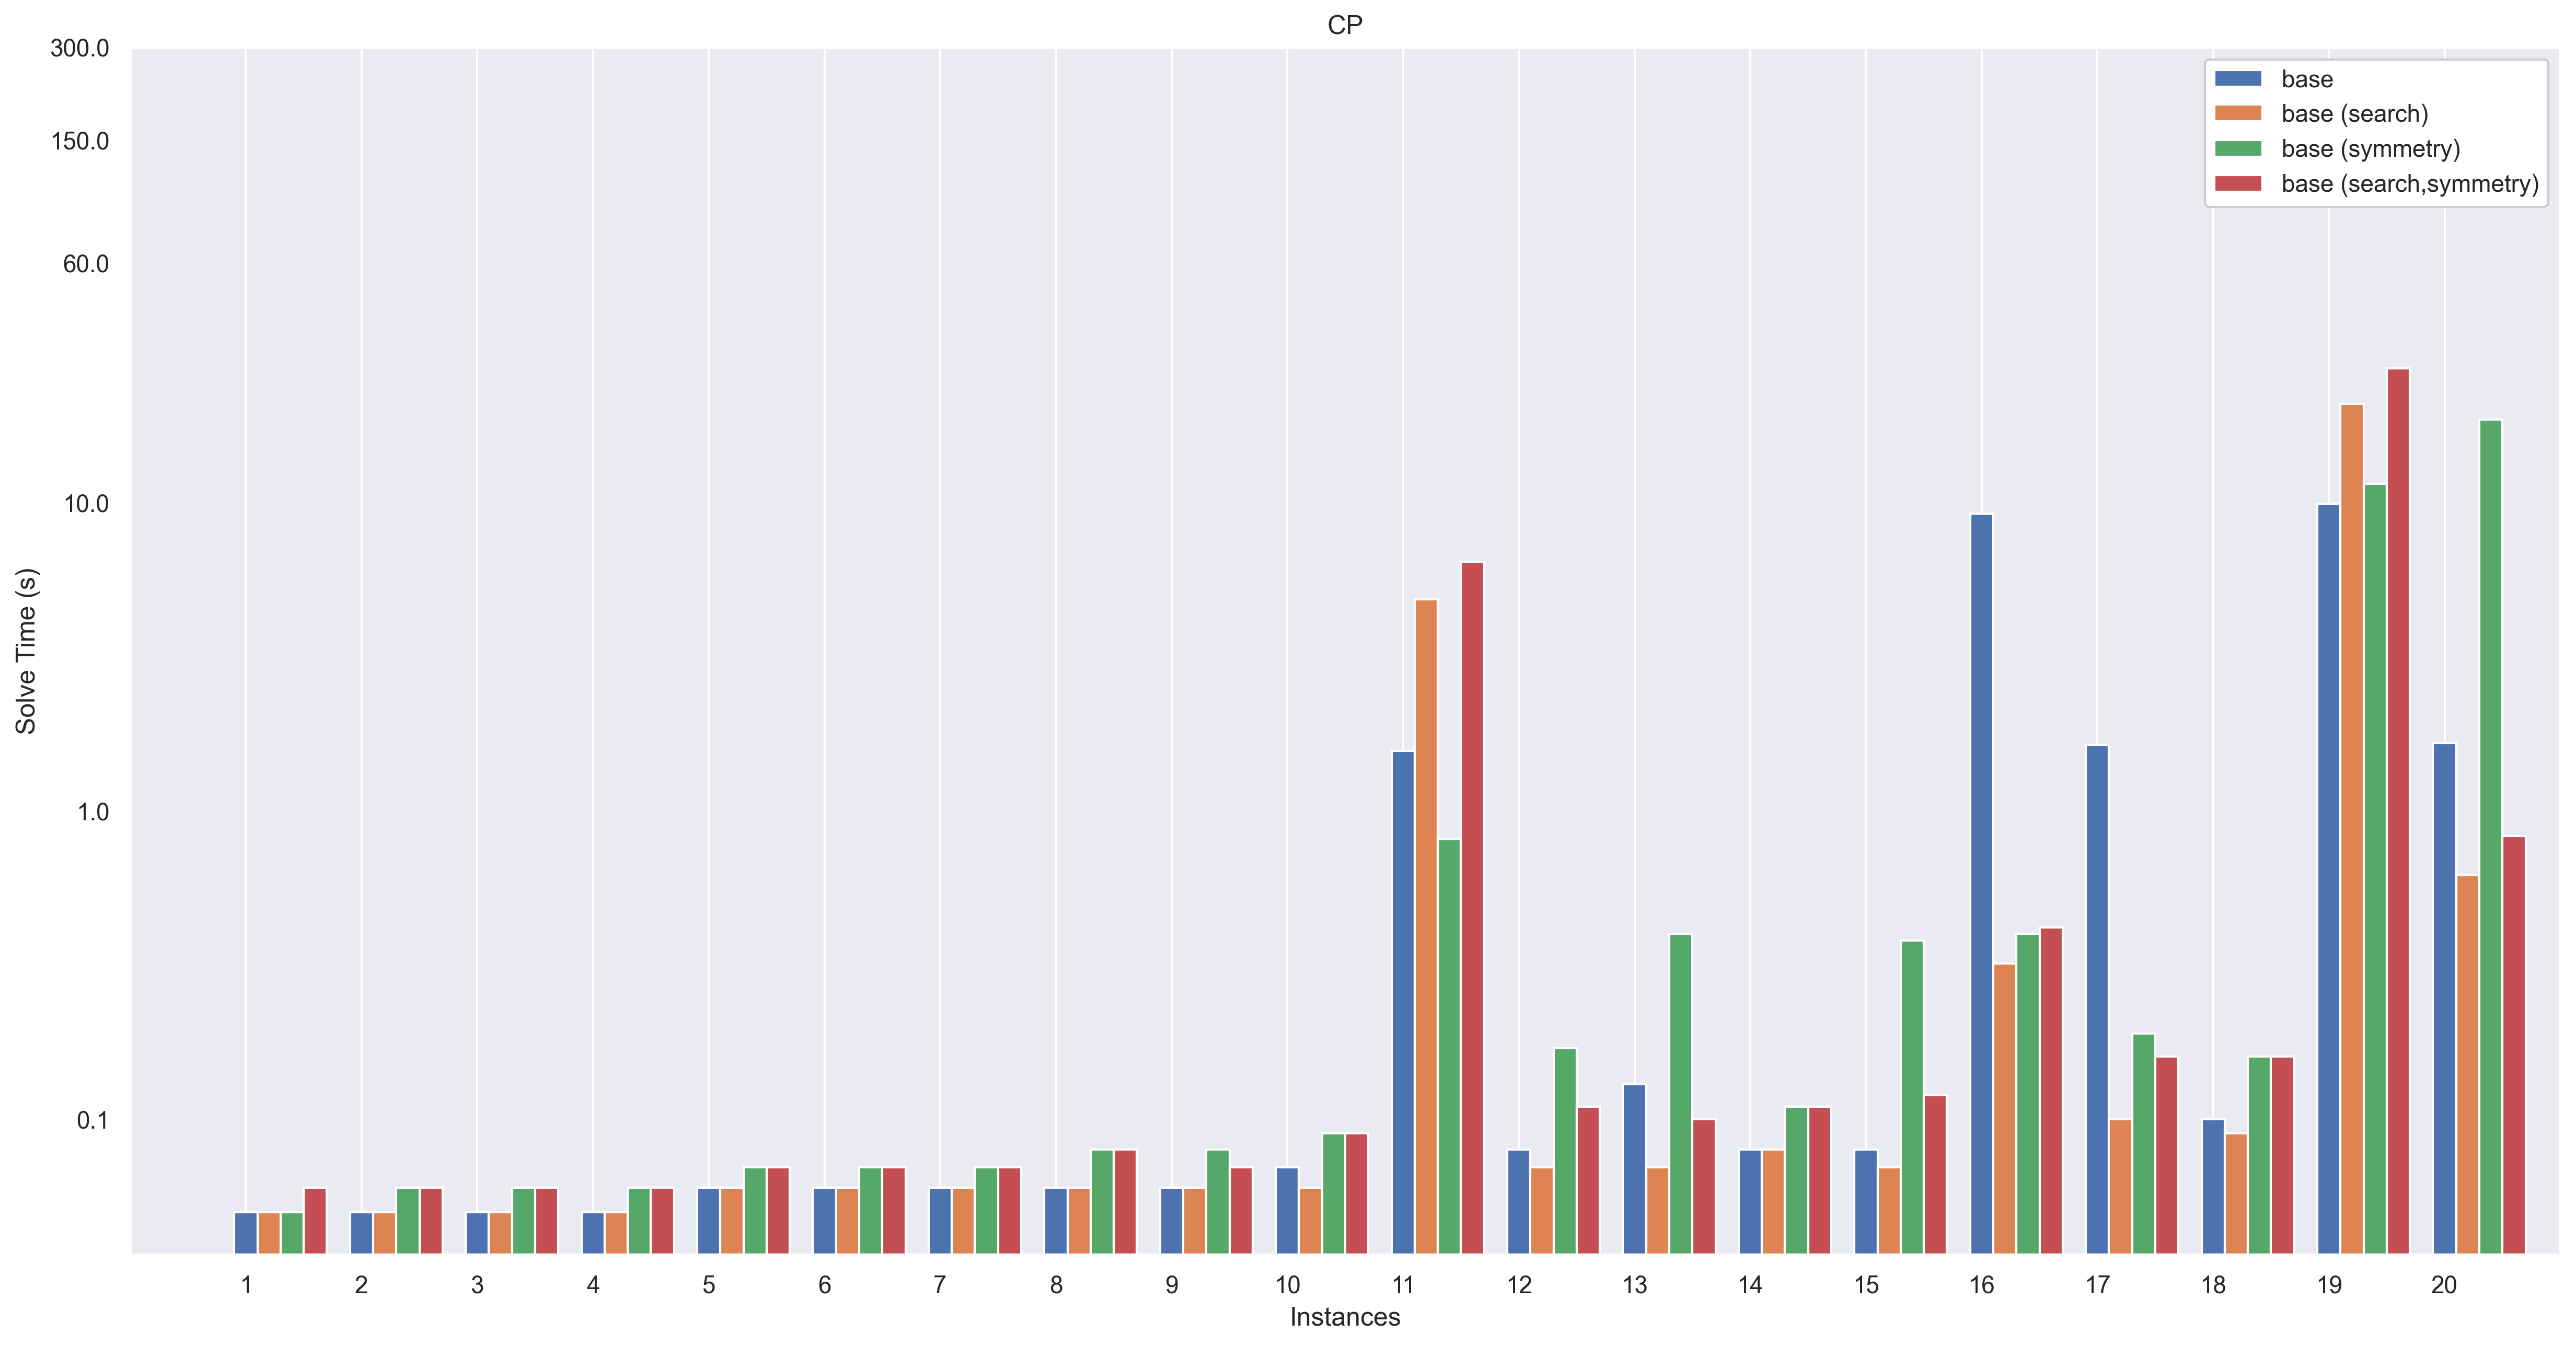

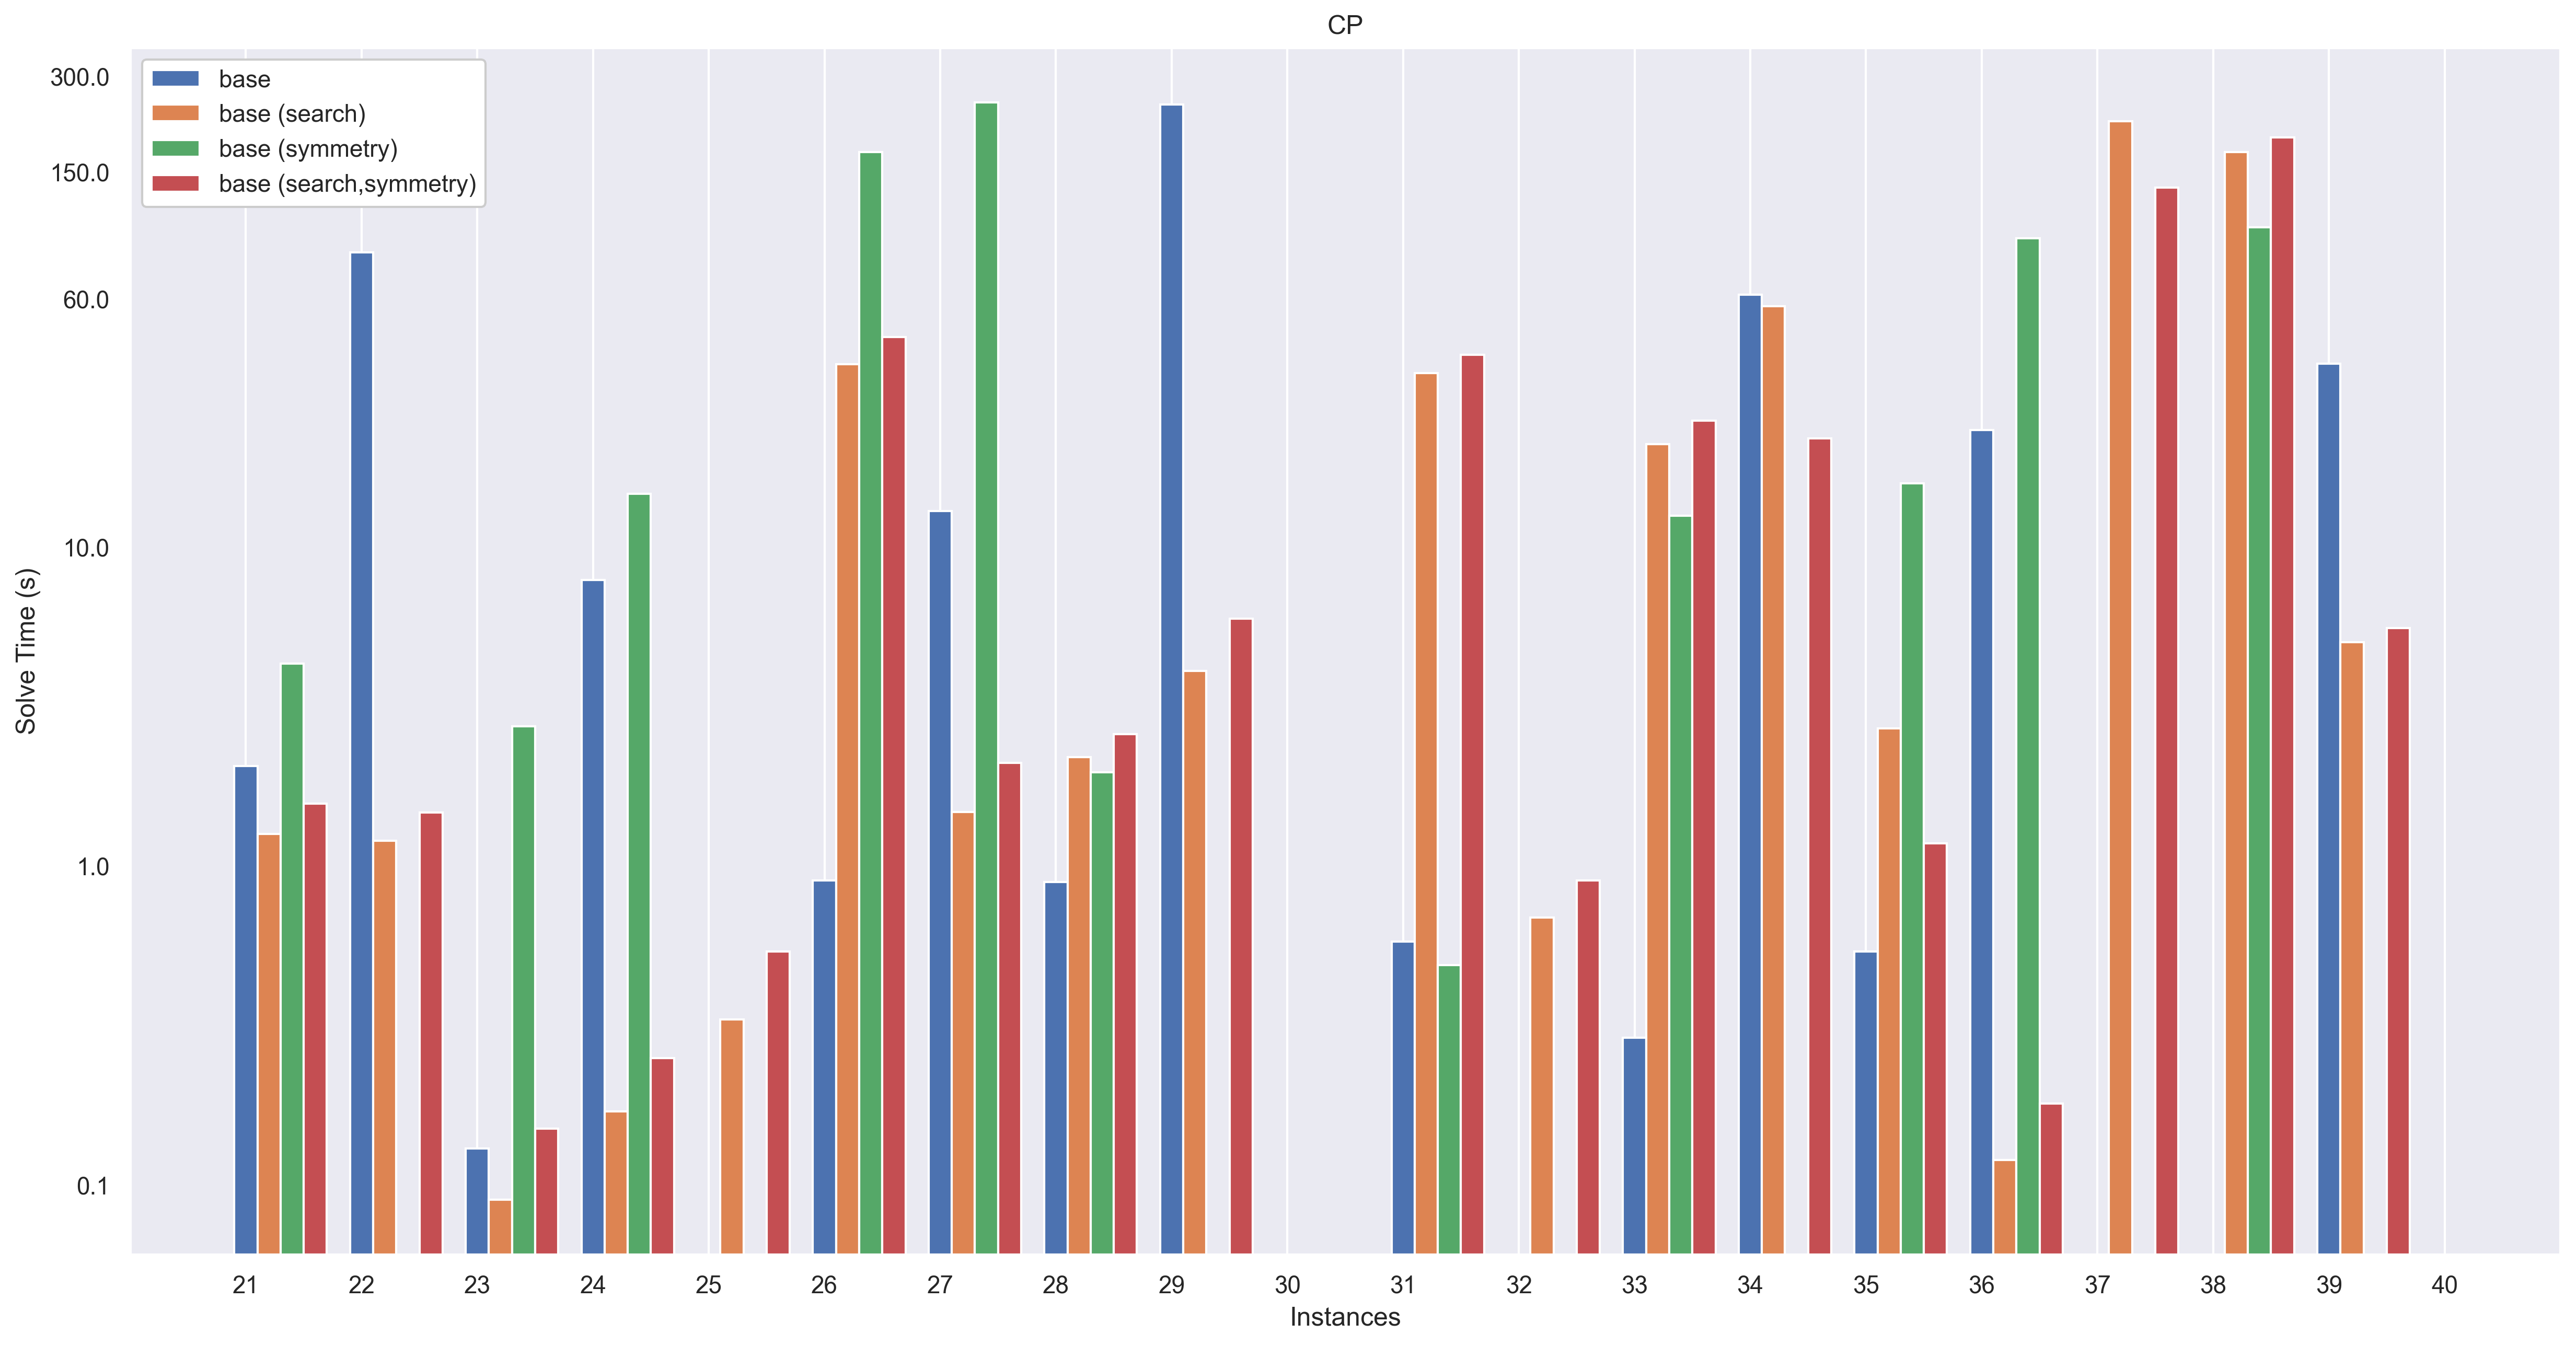

In [9]:
width = 0.2
_dfs = [
    CP_df_filter(model="base"),
    CP_df_filter(model="search"),
    CP_df_filter(model="symmetry"),
    CP_df_filter(model="search.symmetry"),
]
labels = [
    "base", 
    "base (search)", 
    "base (symmetry)", 
    "base (search,symmetry)"
]
plot("CP", "CP", width, prepare_plot_data(_dfs), labels)

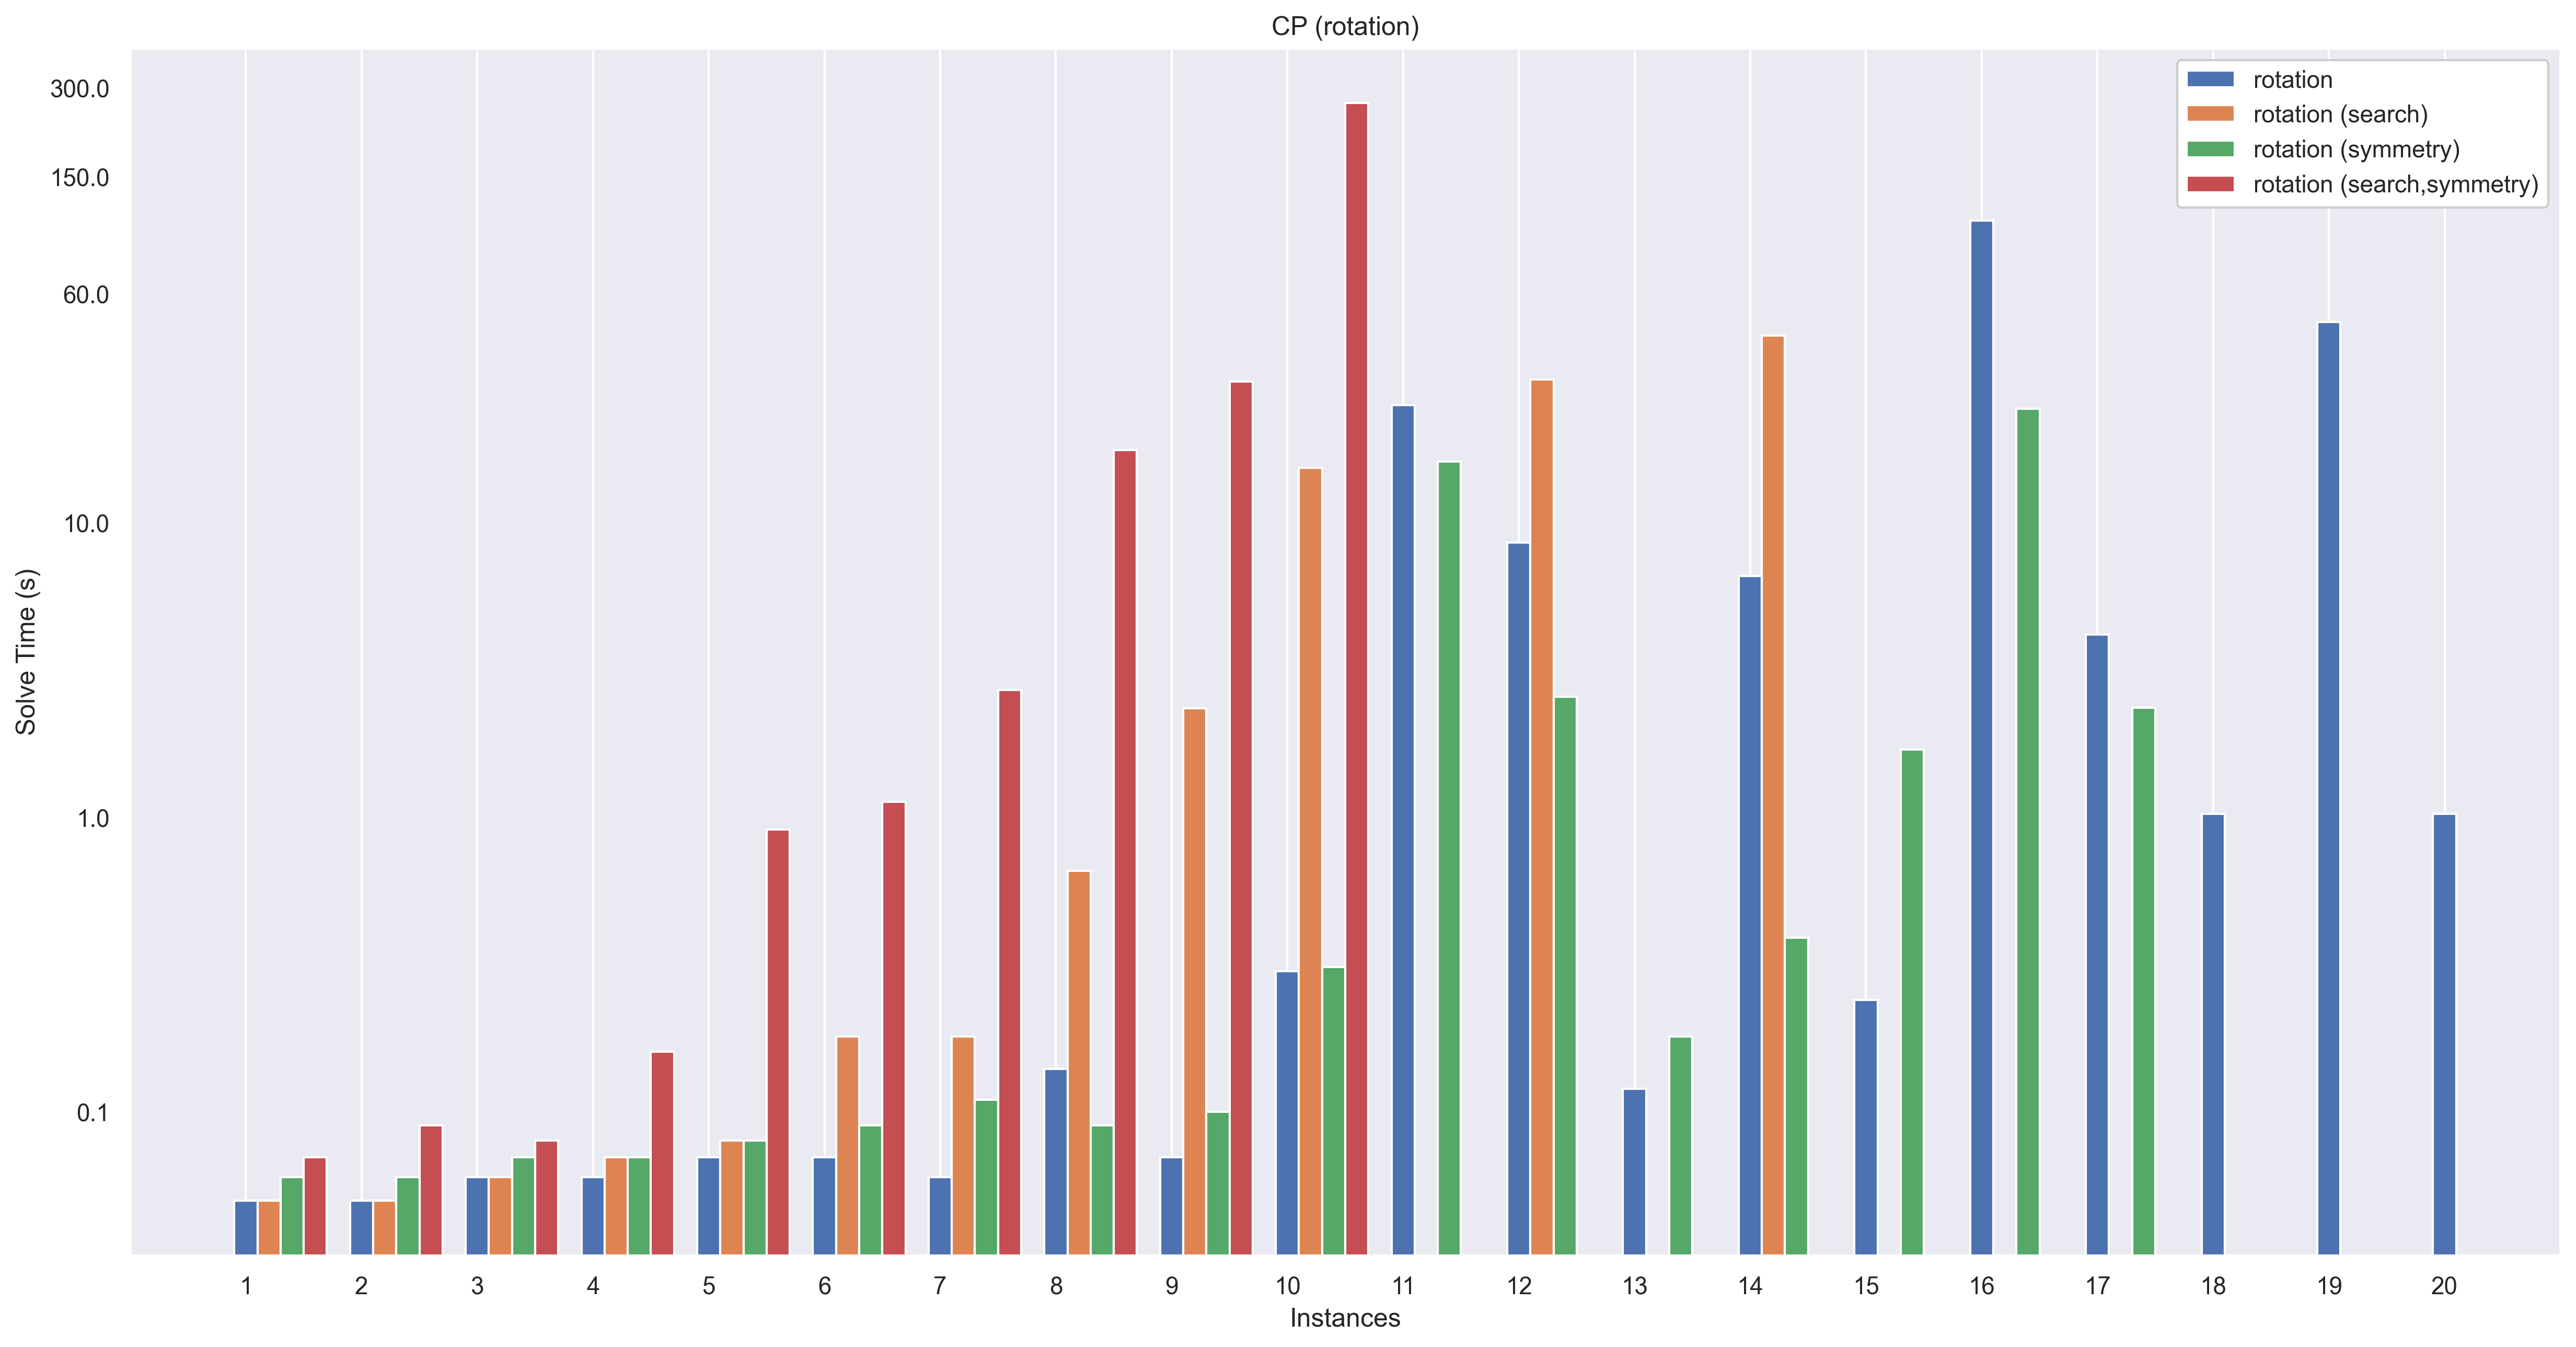

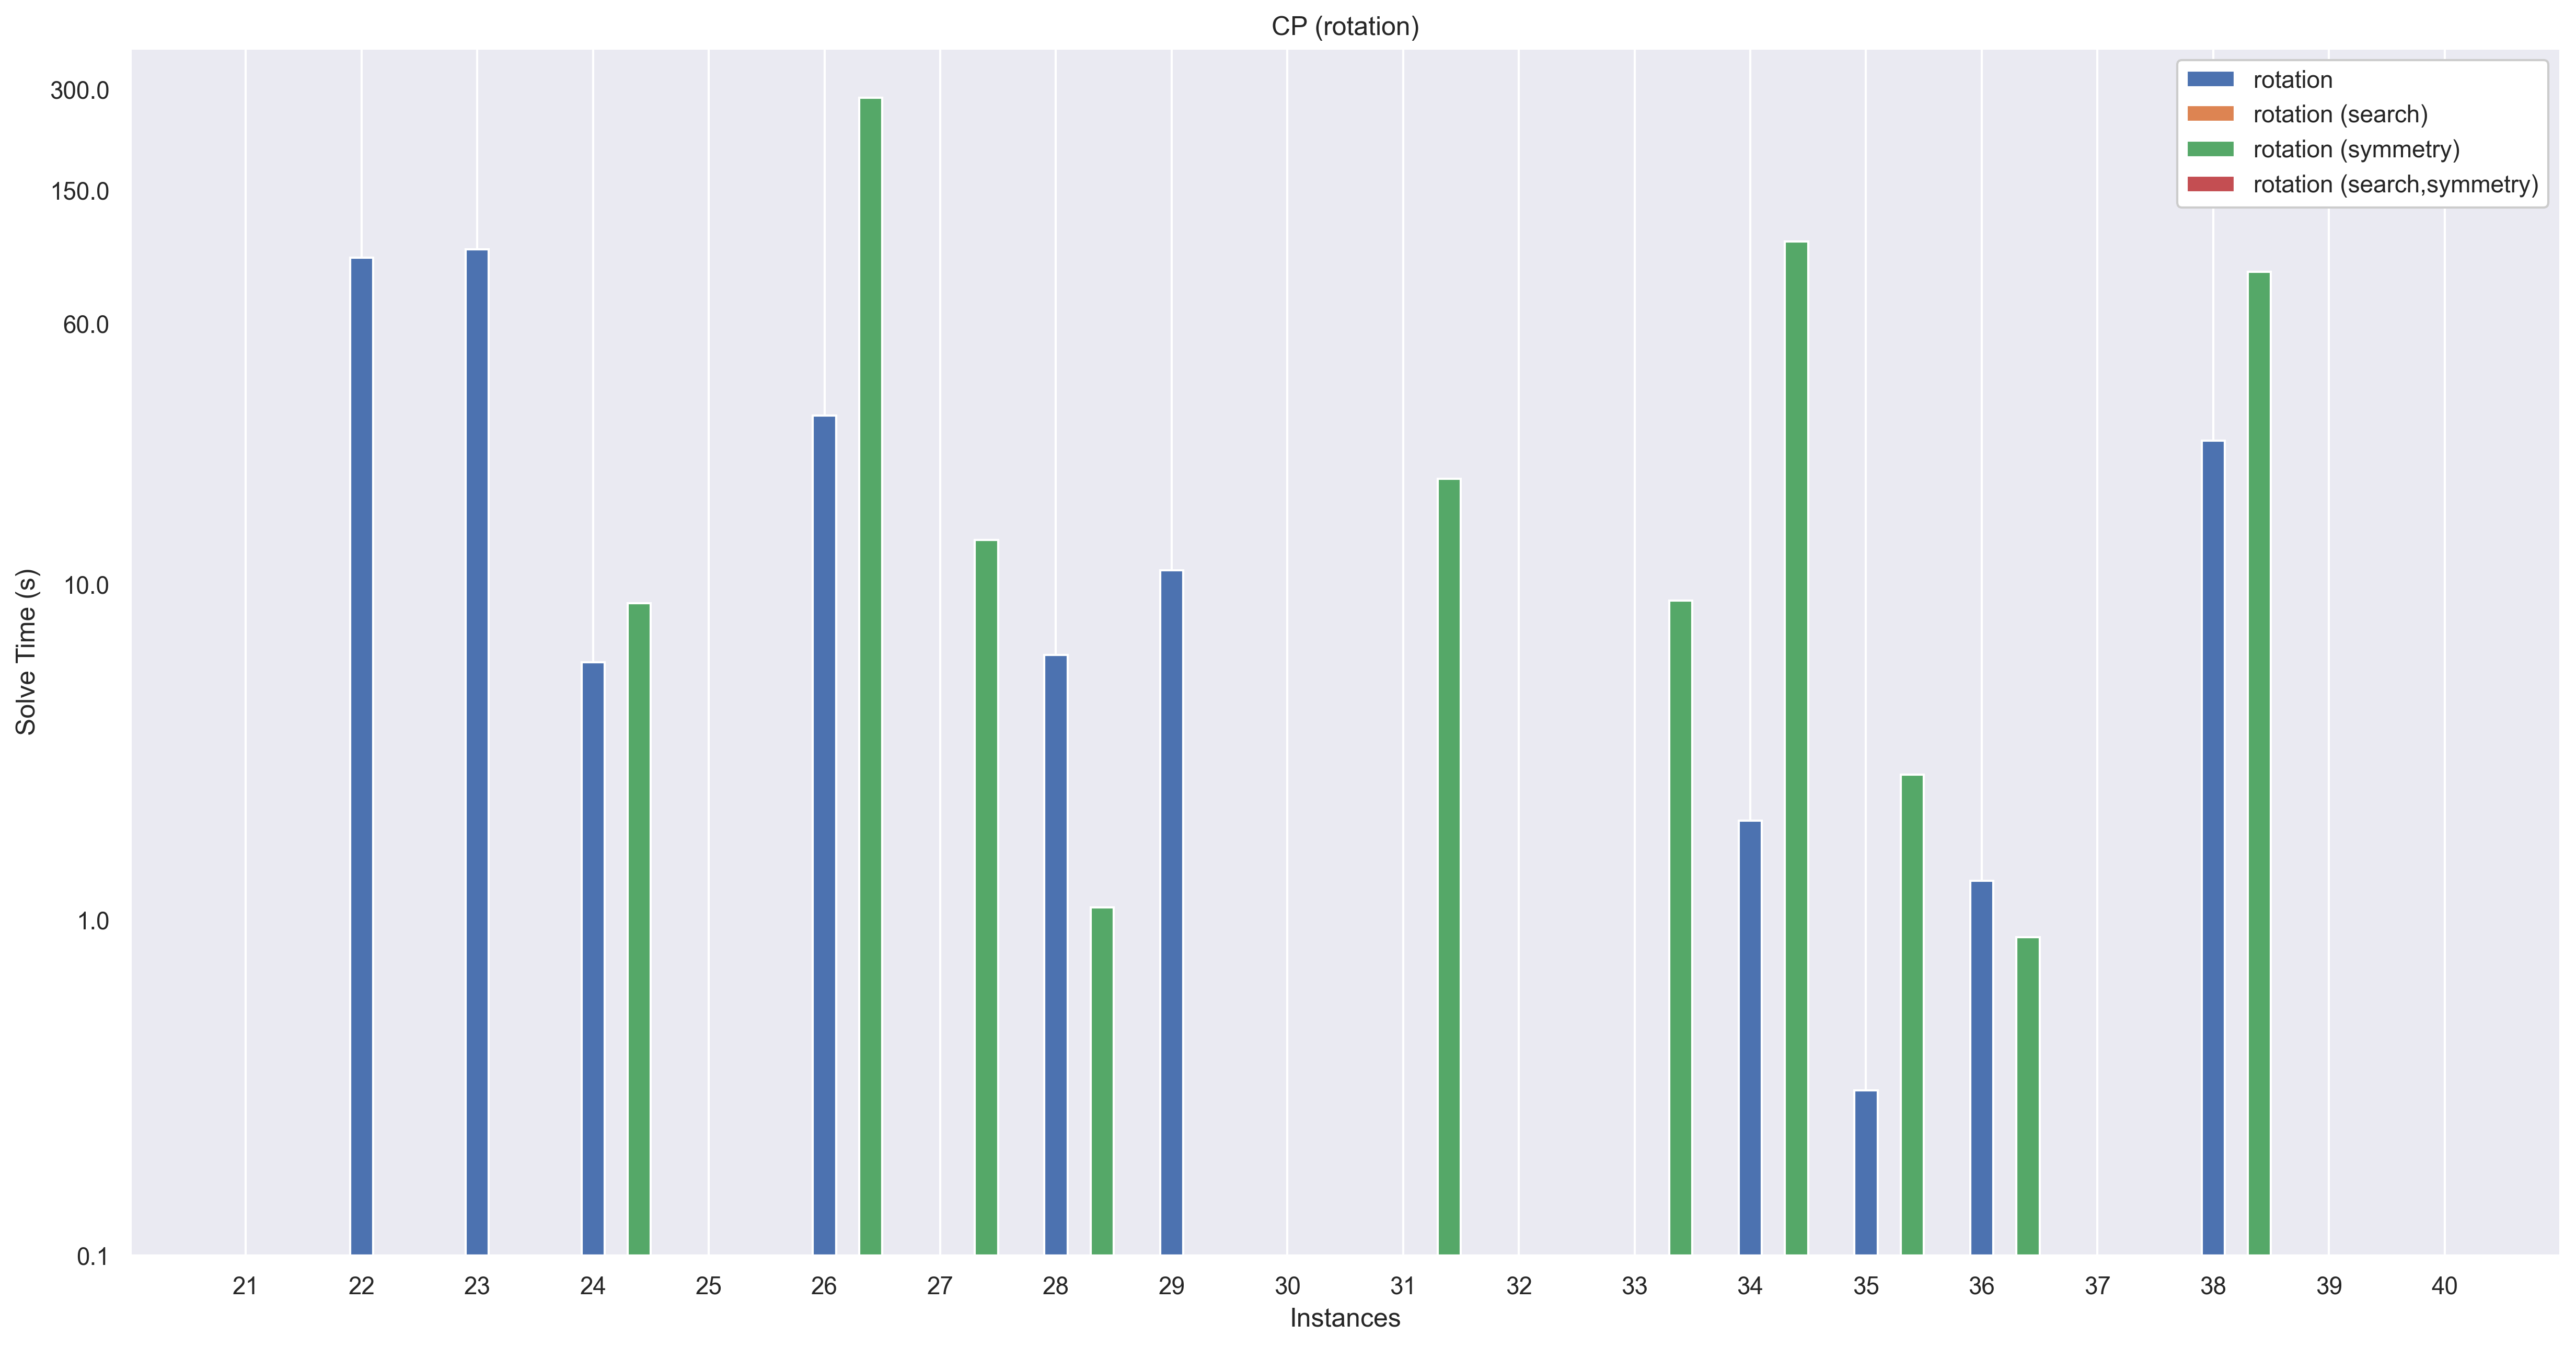

In [10]:
width = 0.2
_dfs = [
    CP_df_filter(model="rotation"),
    CP_df_filter(model="rotation.search"),
    CP_df_filter(model="rotation.symmetry"),
    CP_df_filter(model="rotation.search.symmetry"),
]
labels = [
    "rotation", 
    "rotation (search)", 
    "rotation (symmetry)", 
    "rotation (search,symmetry)"
]
plot("CP (rotation)", "CP (rotation)", width, prepare_plot_data(_dfs), labels)

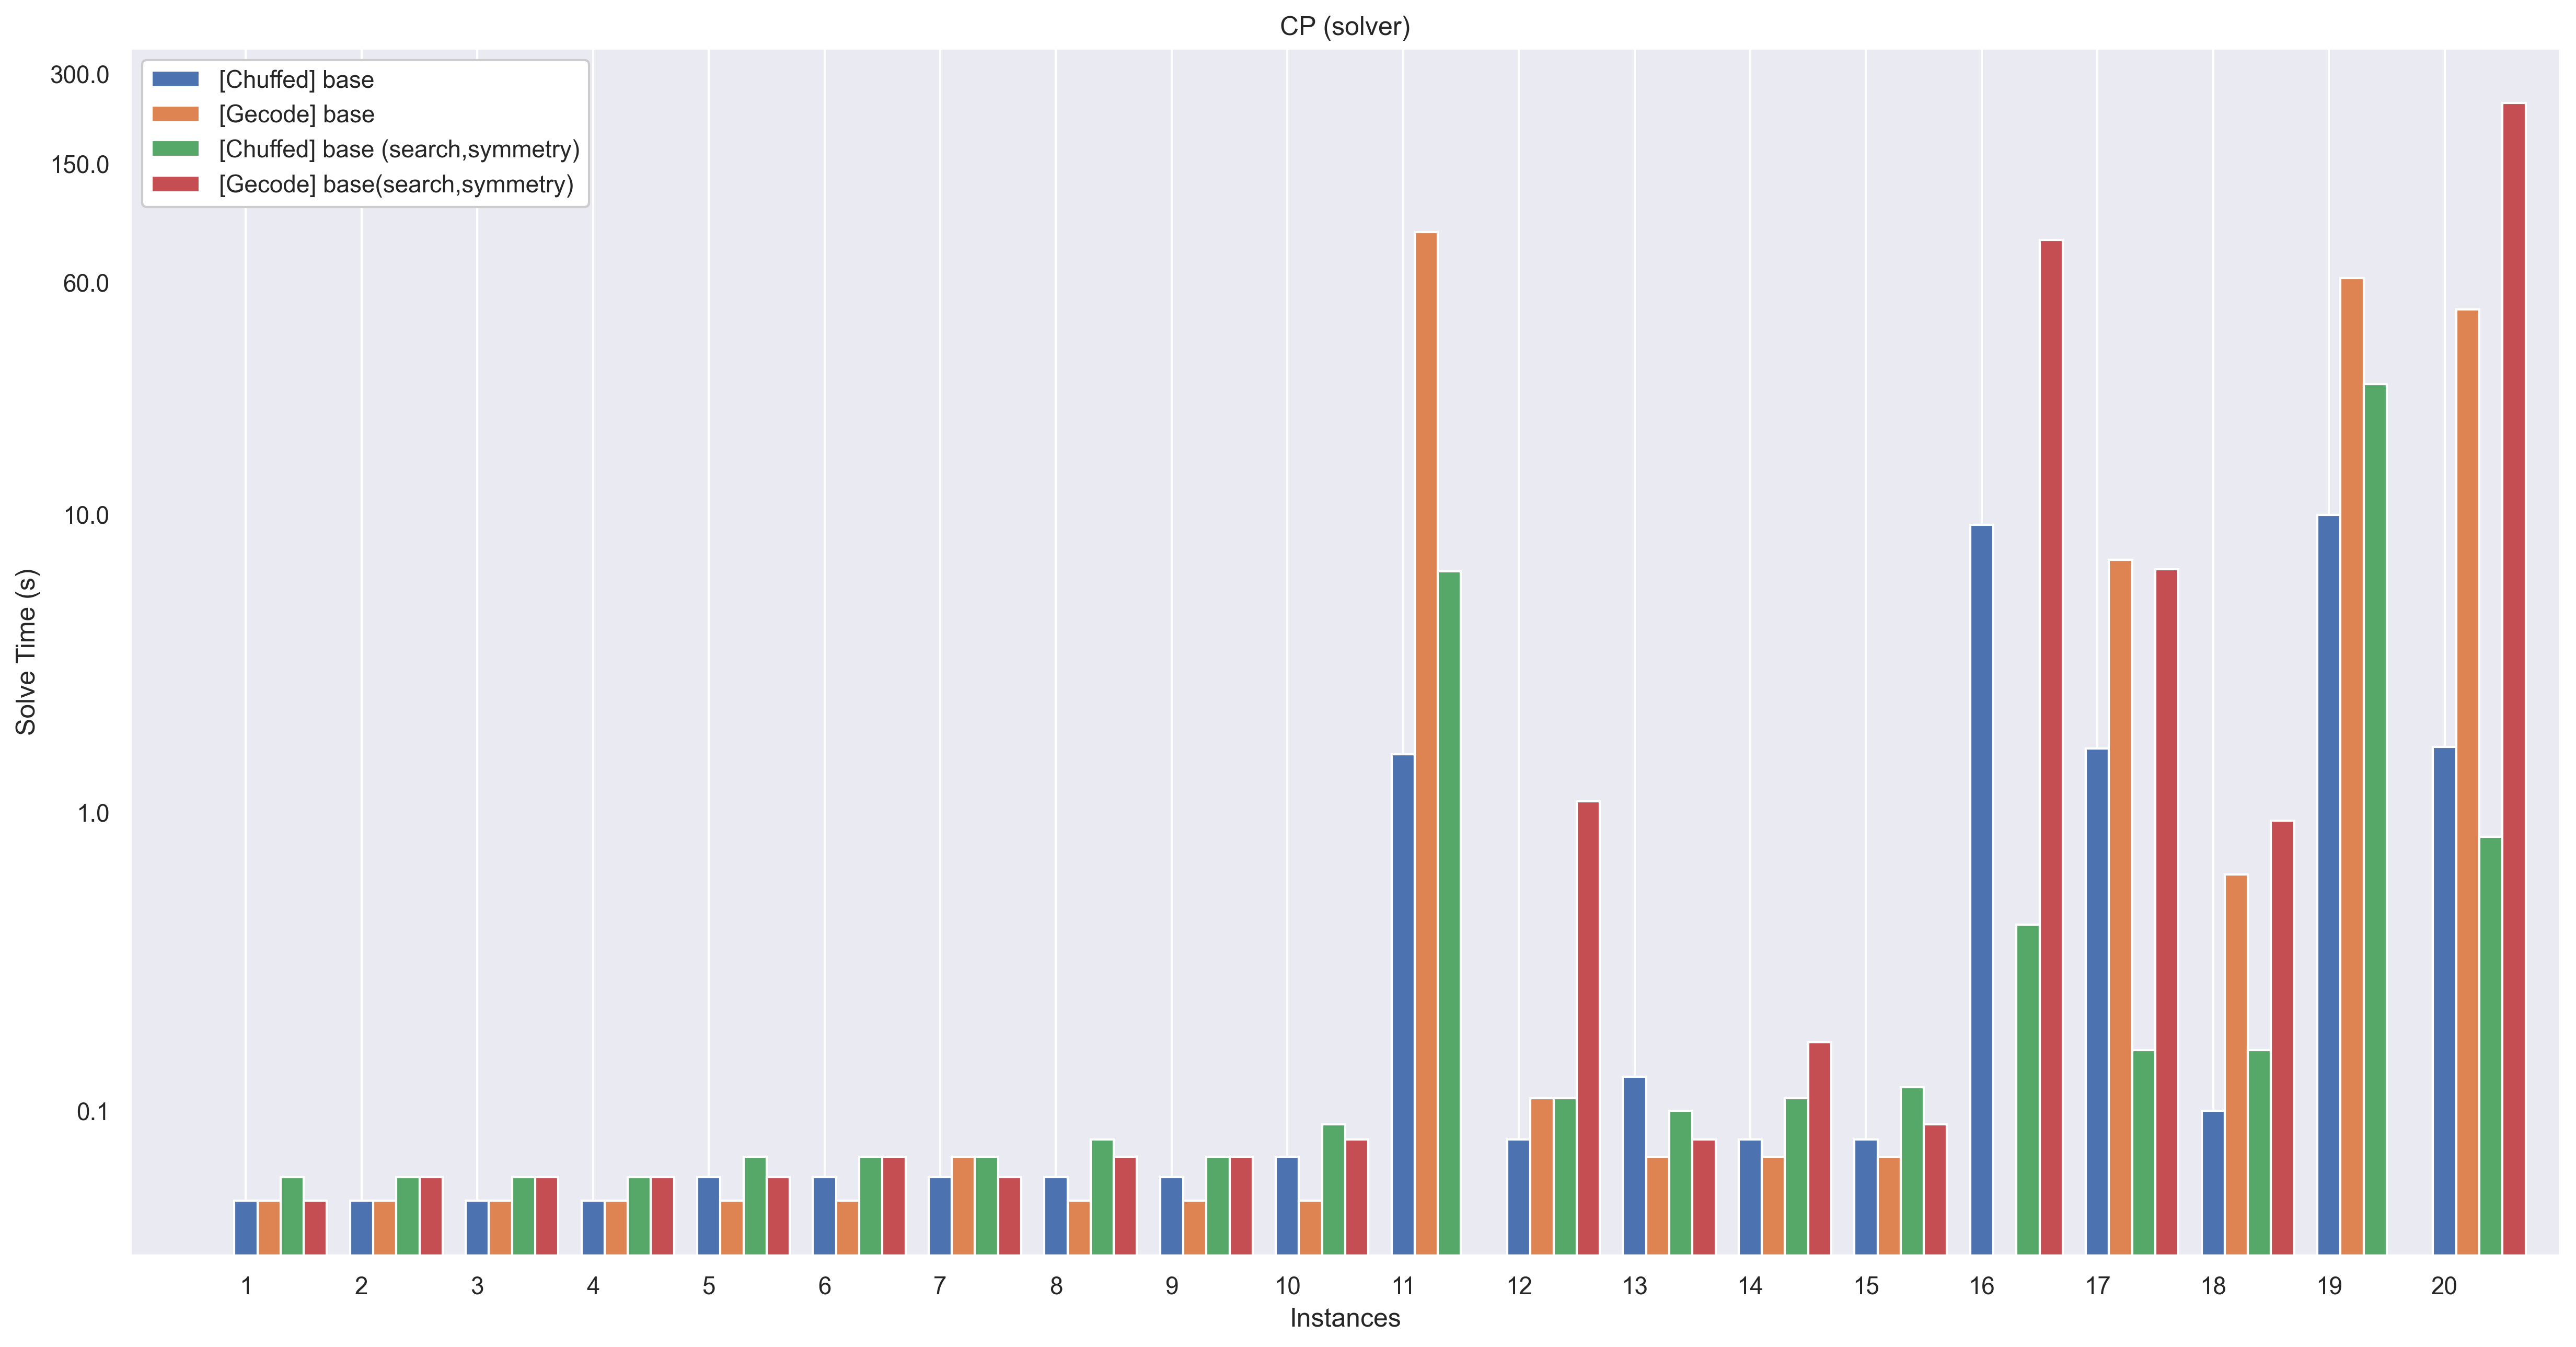

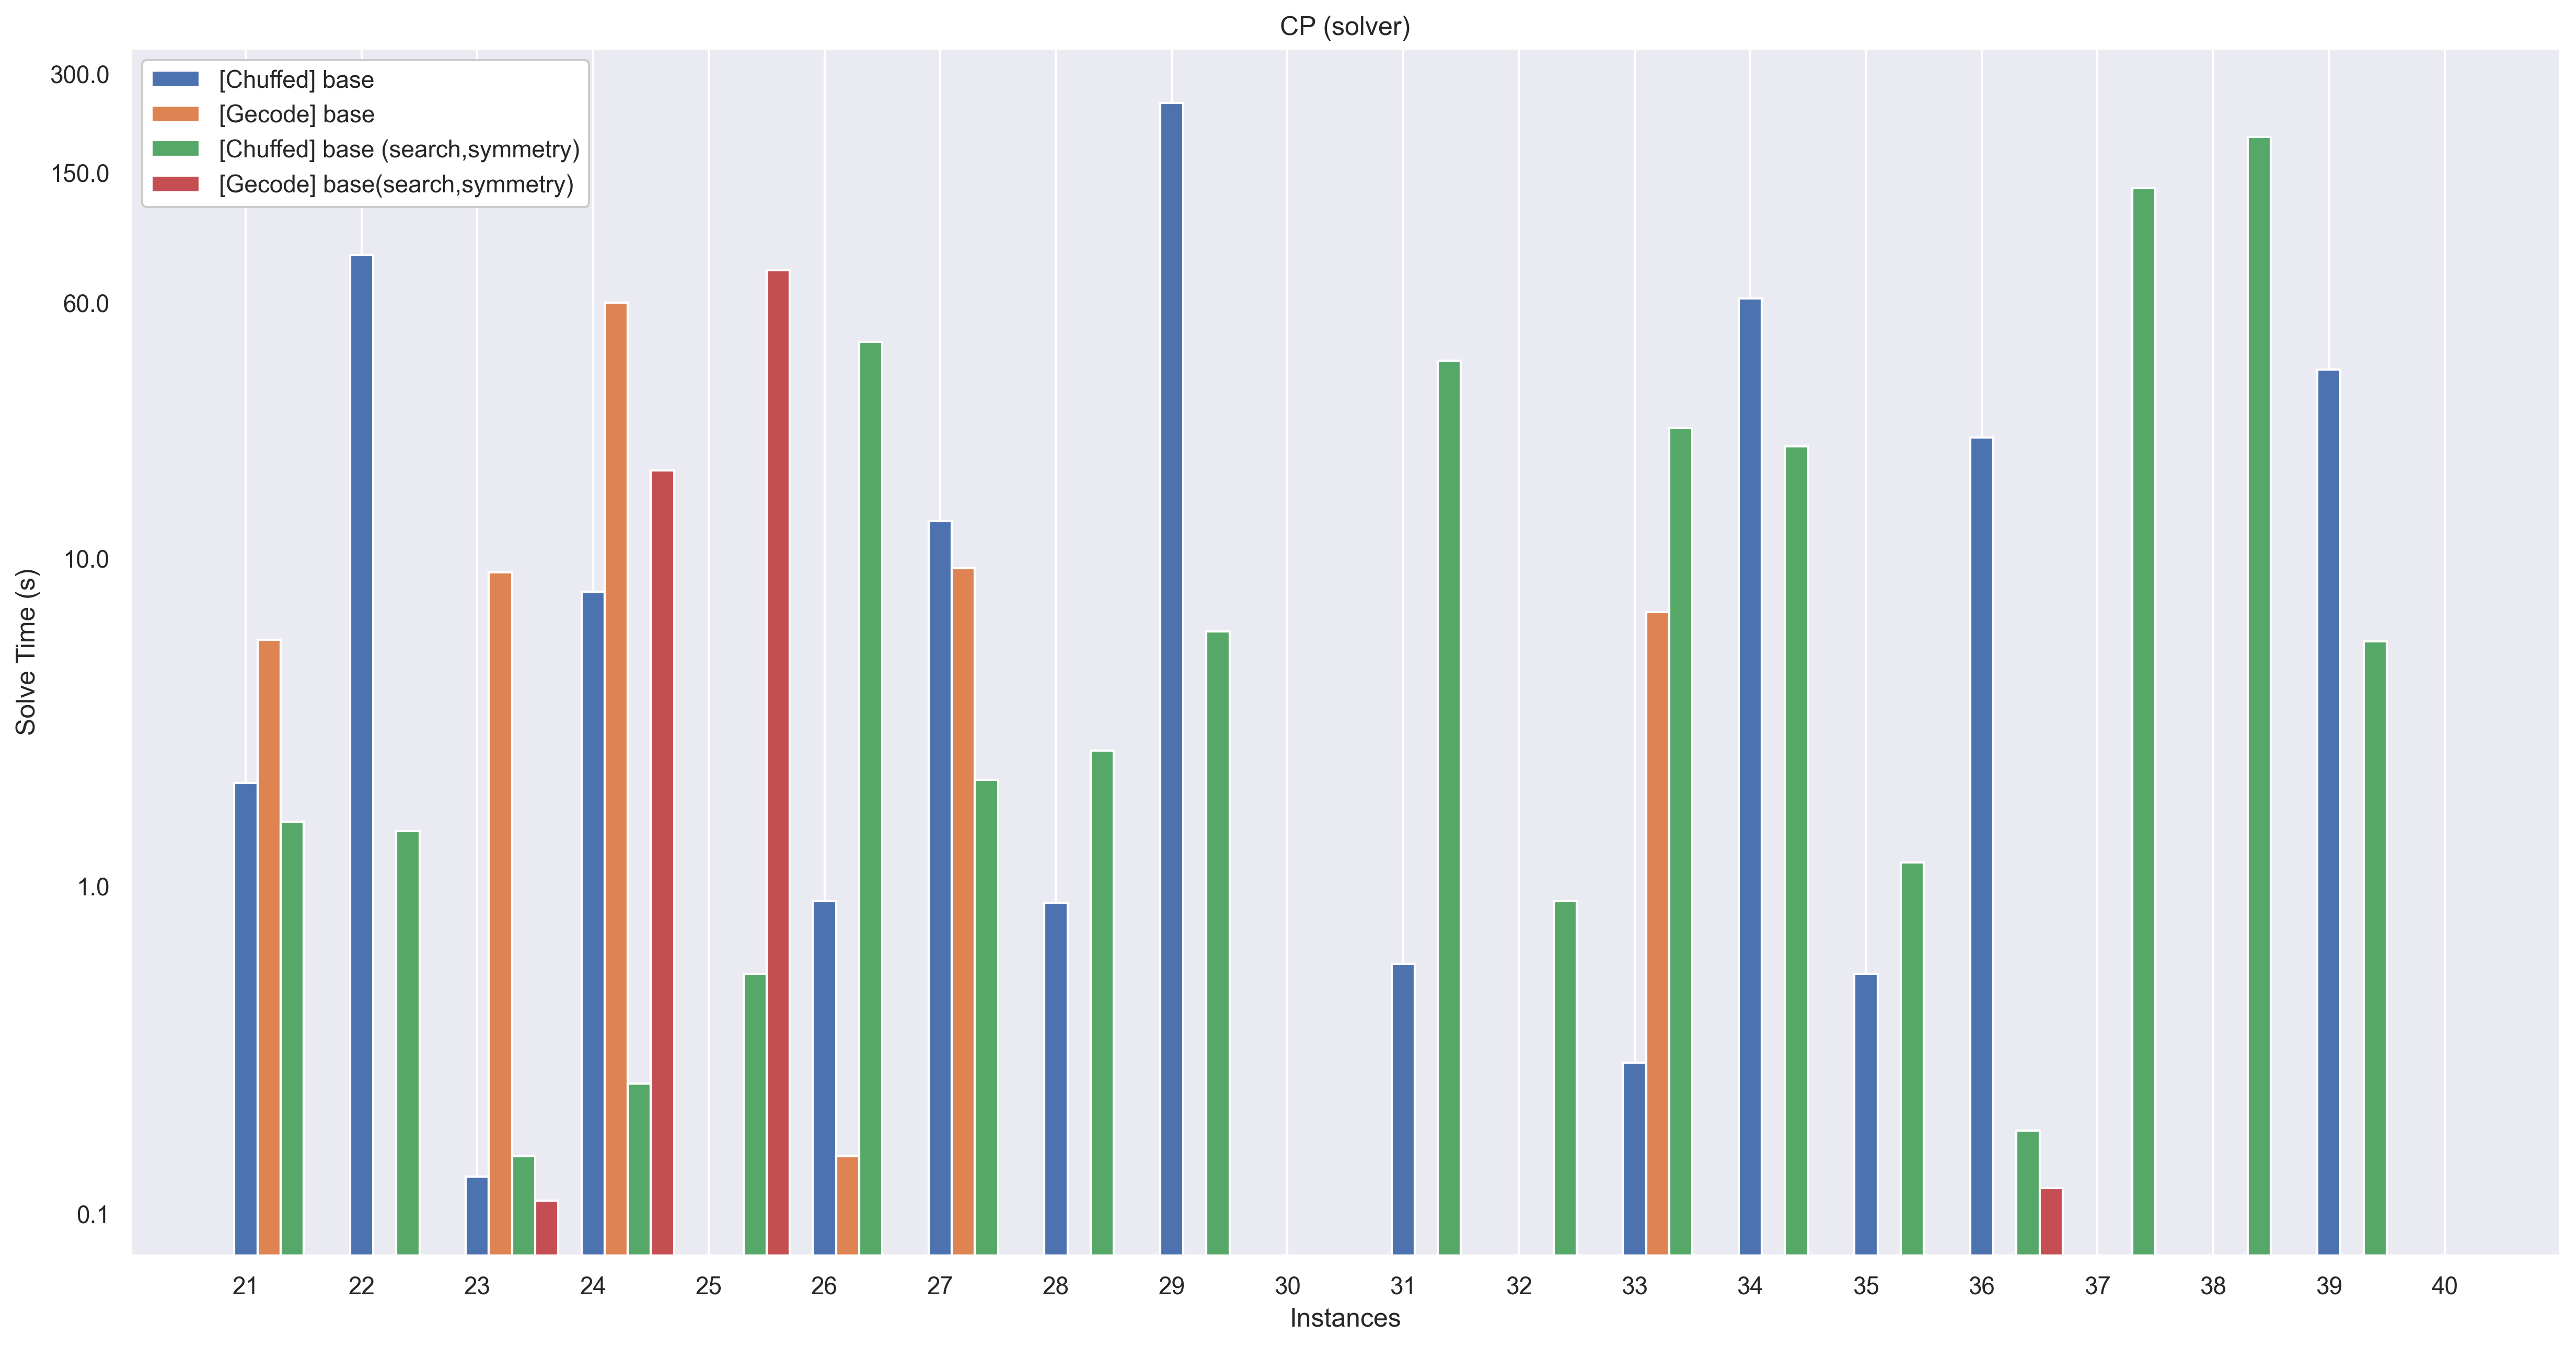

In [21]:
width = 0.2
_dfs = [
    CP_df_filter(model="base", solver="Chuffed"),
    CP_df_filter(model="base", solver="Gecode"),
    CP_df_filter(model="search.symmetry", solver="Chuffed"),
    CP_df_filter(model="search.symmetry", solver="Gecode"),
]
labels = [
    "[Chuffed] base ", 
    "[Gecode] base", 
    "[Chuffed] base (search,symmetry)",
    "[Gecode] base(search,symmetry)"
]
plot("CP (solver)", "CP (solver)", width, prepare_plot_data(_dfs), labels)

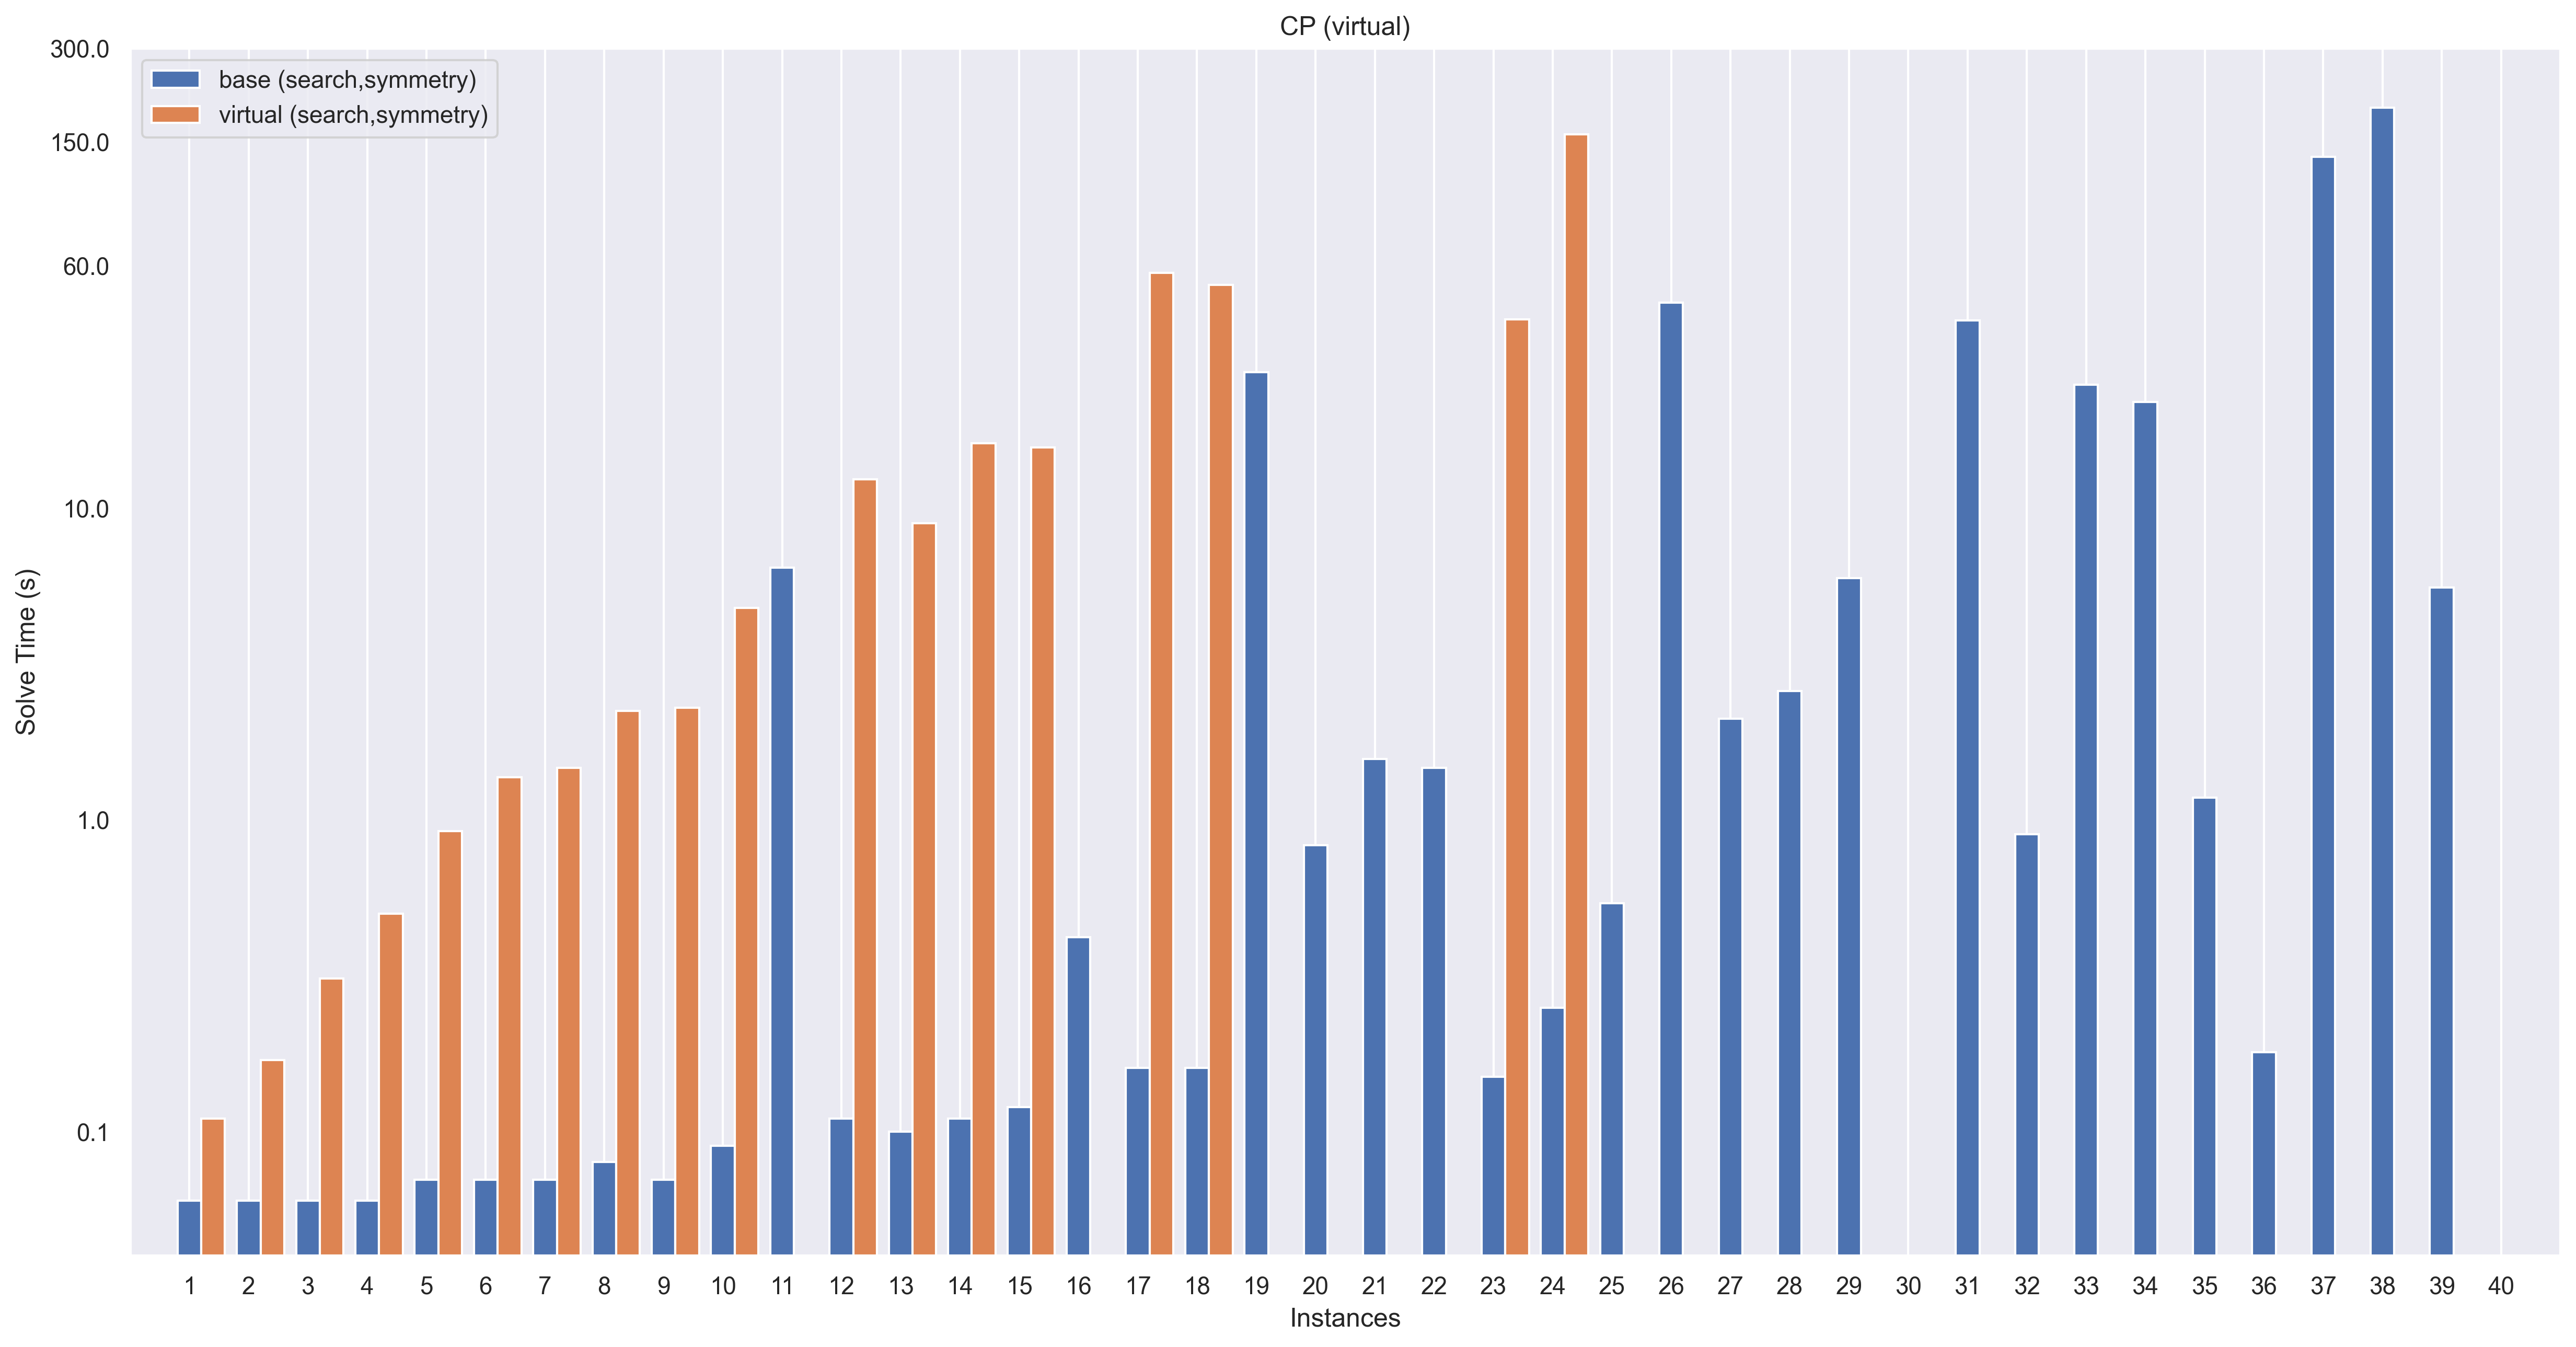

In [20]:
width = 0.4
_dfs = [
    CP_df_filter(model="search.symmetry", solver="Chuffed"),
    CP_df_filter(model="search.symmetry.virtual", solver="Chuffed"),
]
labels = [
    "base (search,symmetry)", 
    "virtual (search,symmetry)",
]
legacy_plot("CP (virtual)", "CP (virtual)", width, prepare_plot_data(_dfs), labels)

### SAT

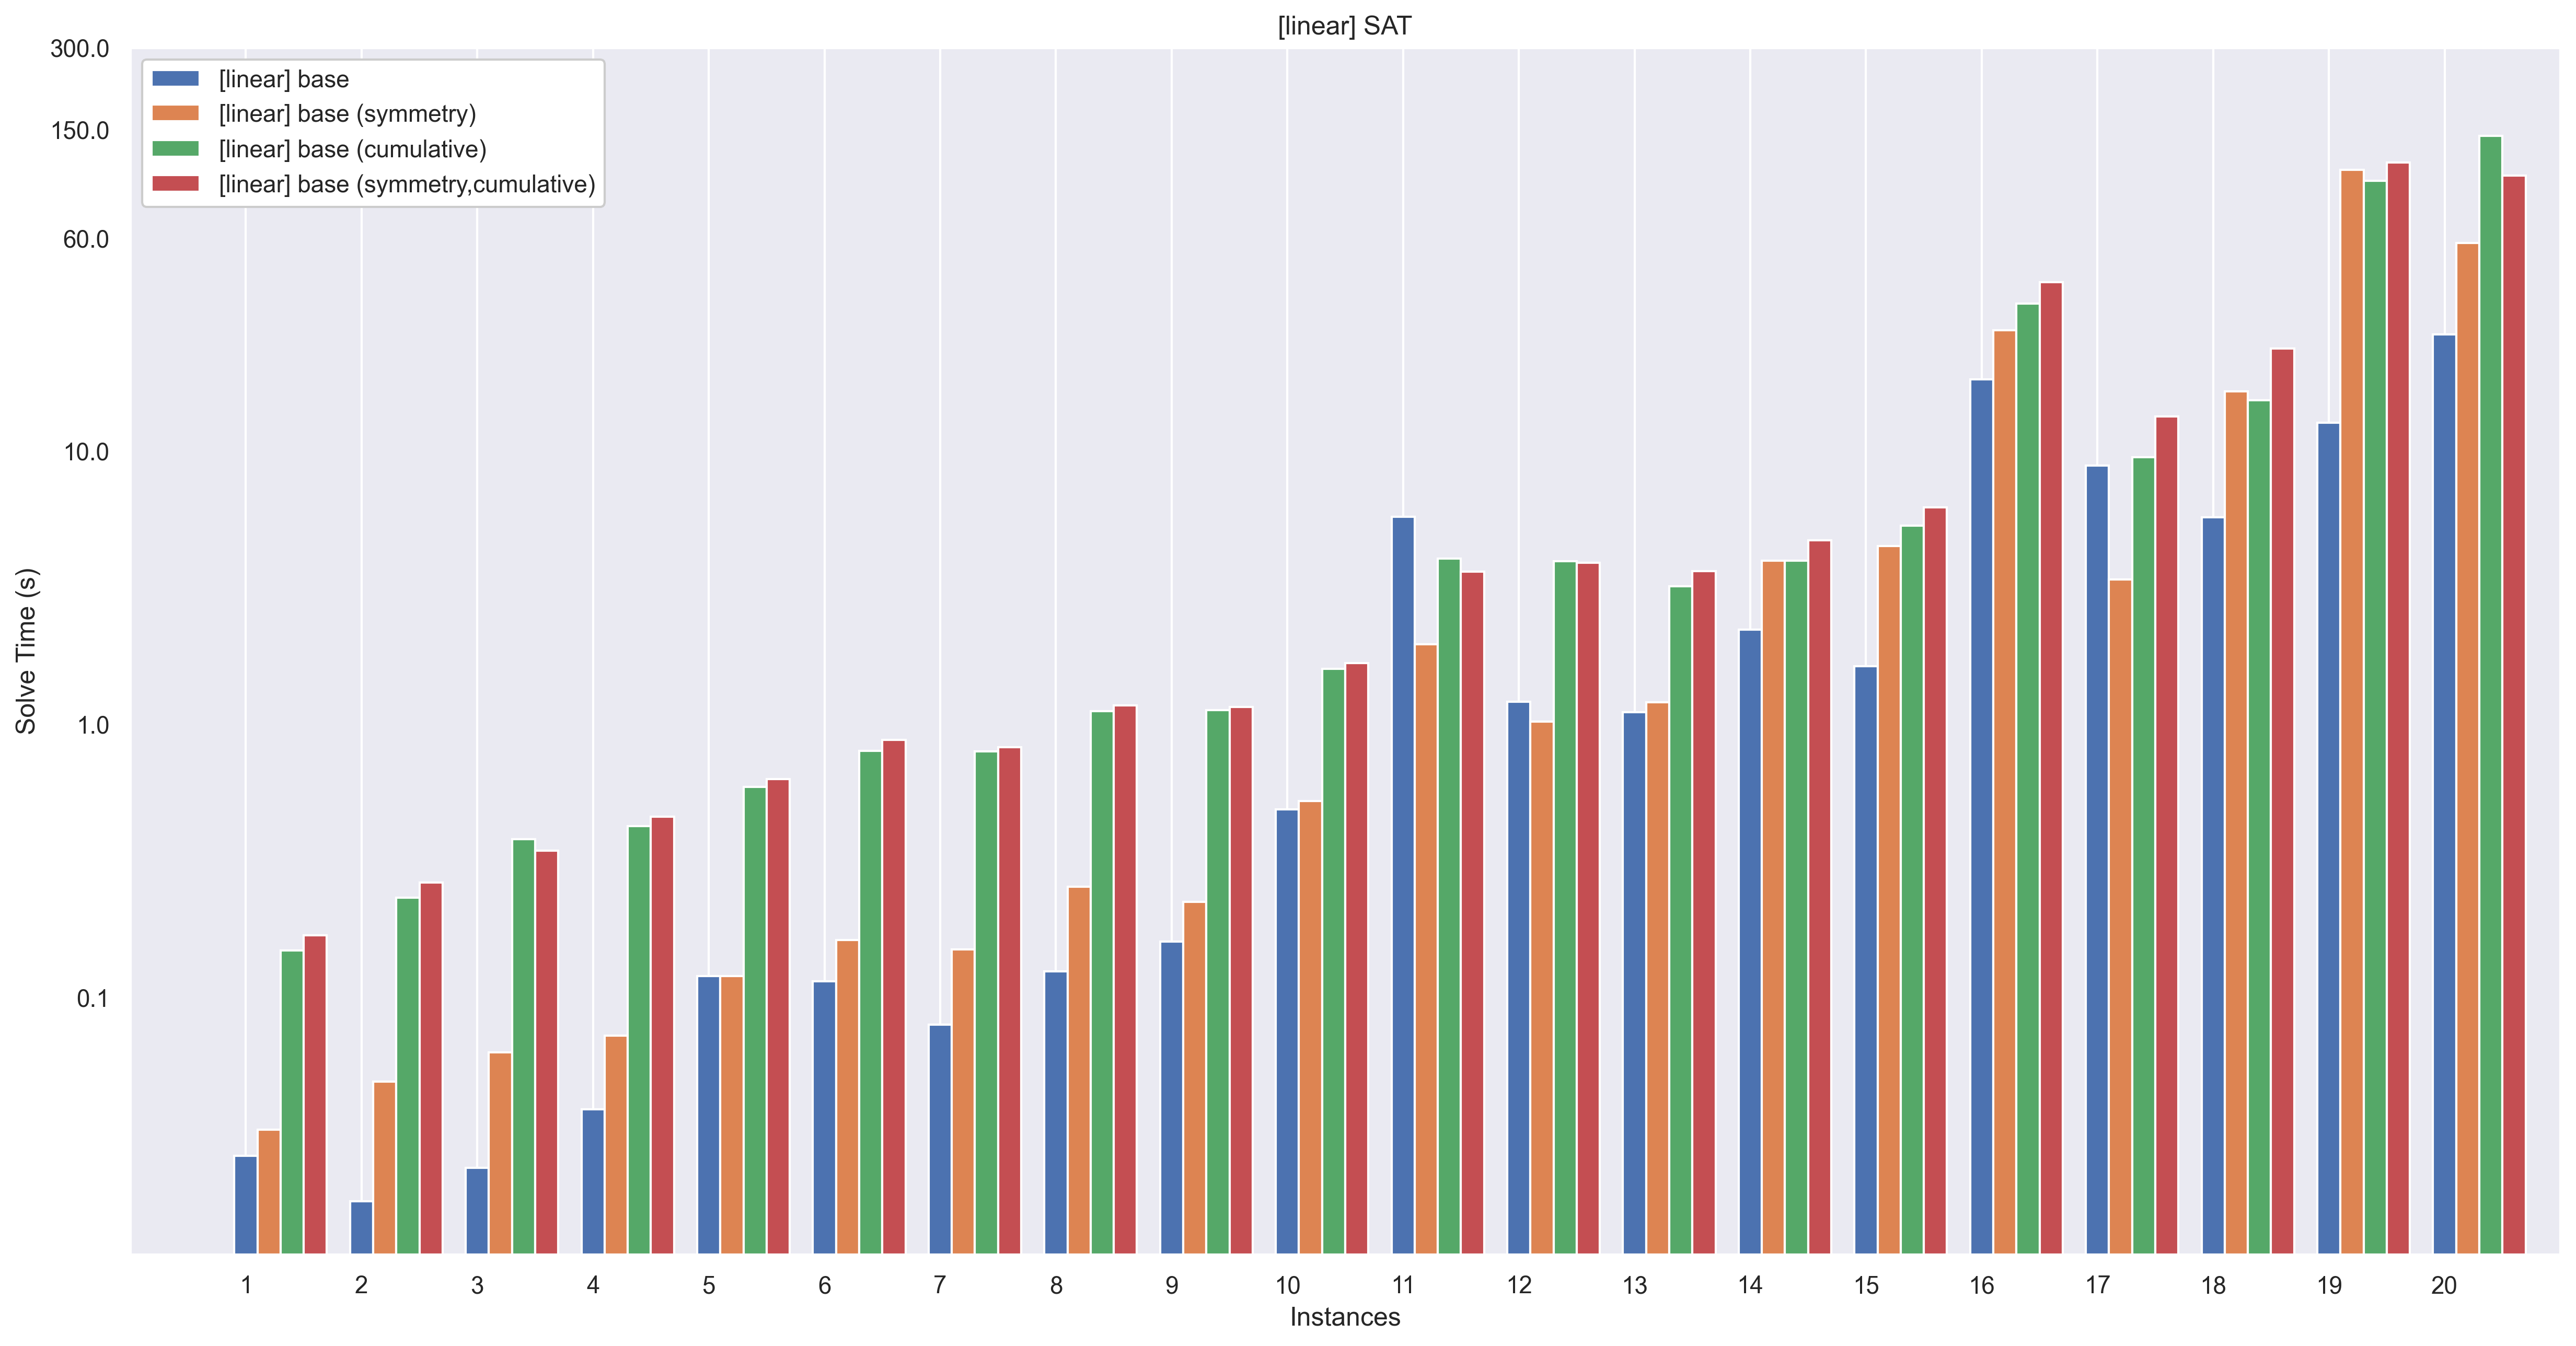

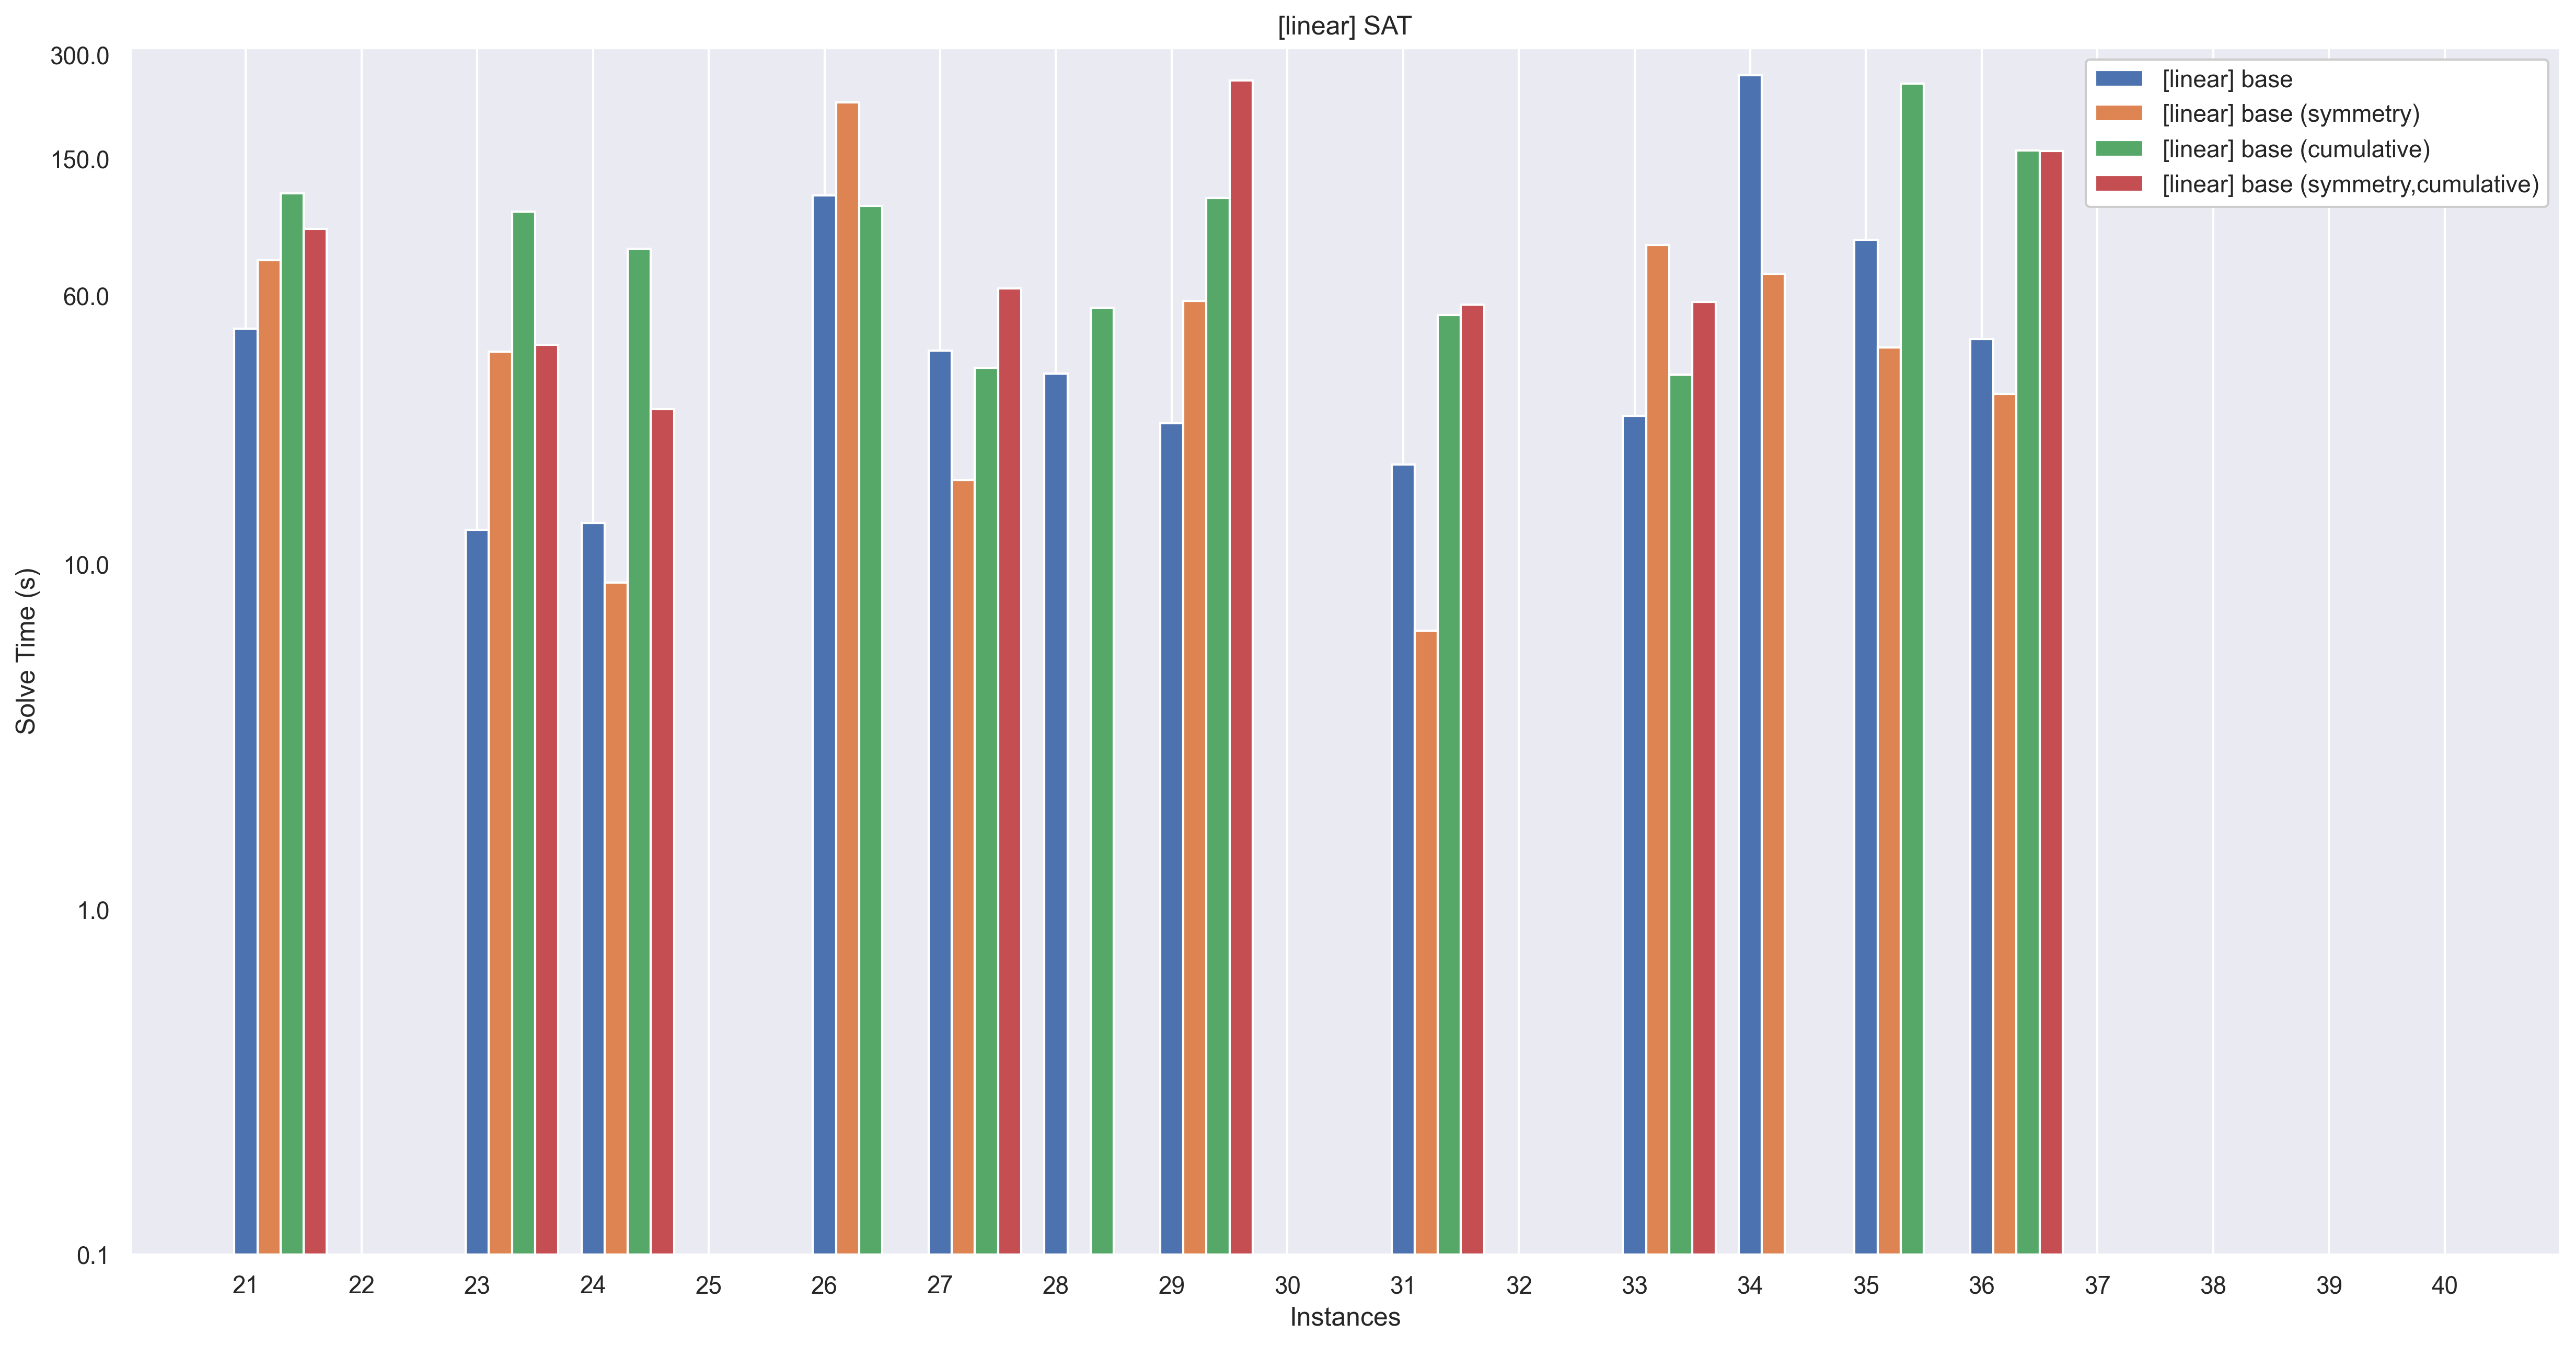

In [13]:
width = 0.2
_dfs = [
    SAT_df_filter(model="base", search="linear"),
    SAT_df_filter(model="base", search="linear", symmetry=True),
    SAT_df_filter(model="base", search="linear", cumulative=True),
    SAT_df_filter(model="base", search="linear", symmetry=True, cumulative=True),
]
labels = [
    "[linear] base", 
    "[linear] base (symmetry)", 
    "[linear] base (cumulative)", 
    "[linear] base (symmetry,cumulative)", 
]
plot("[linear] SAT", "[linear] SAT", width, prepare_plot_data(_dfs), labels)

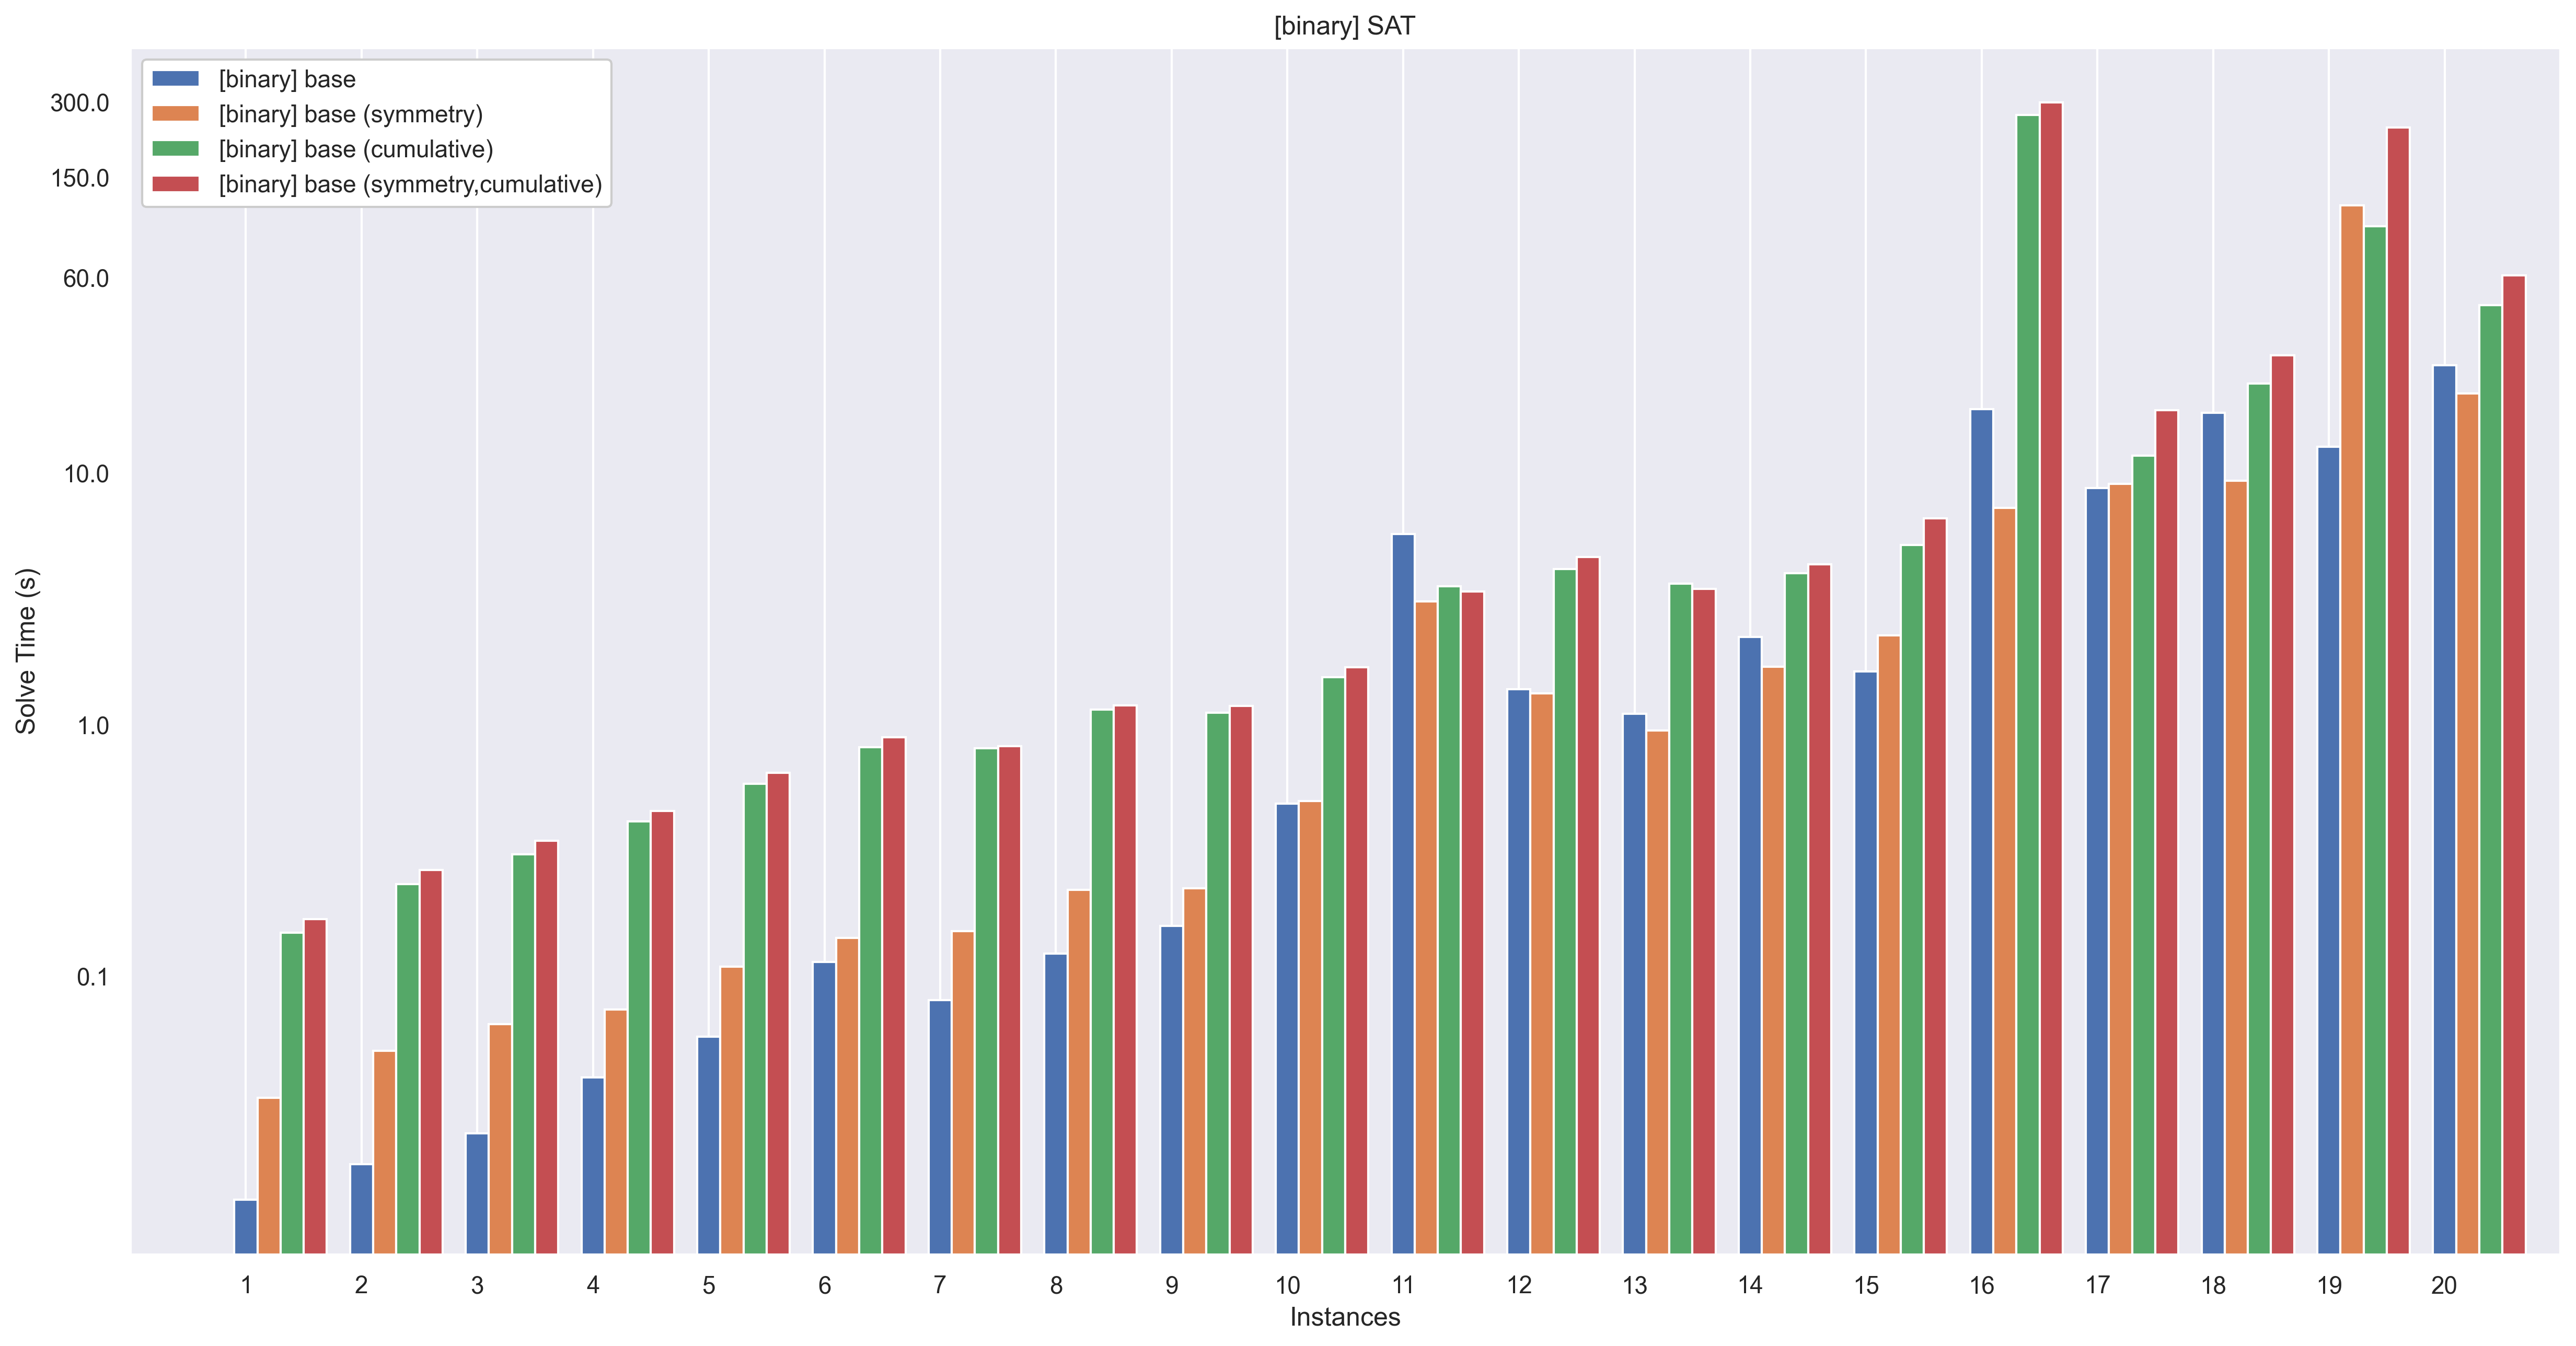

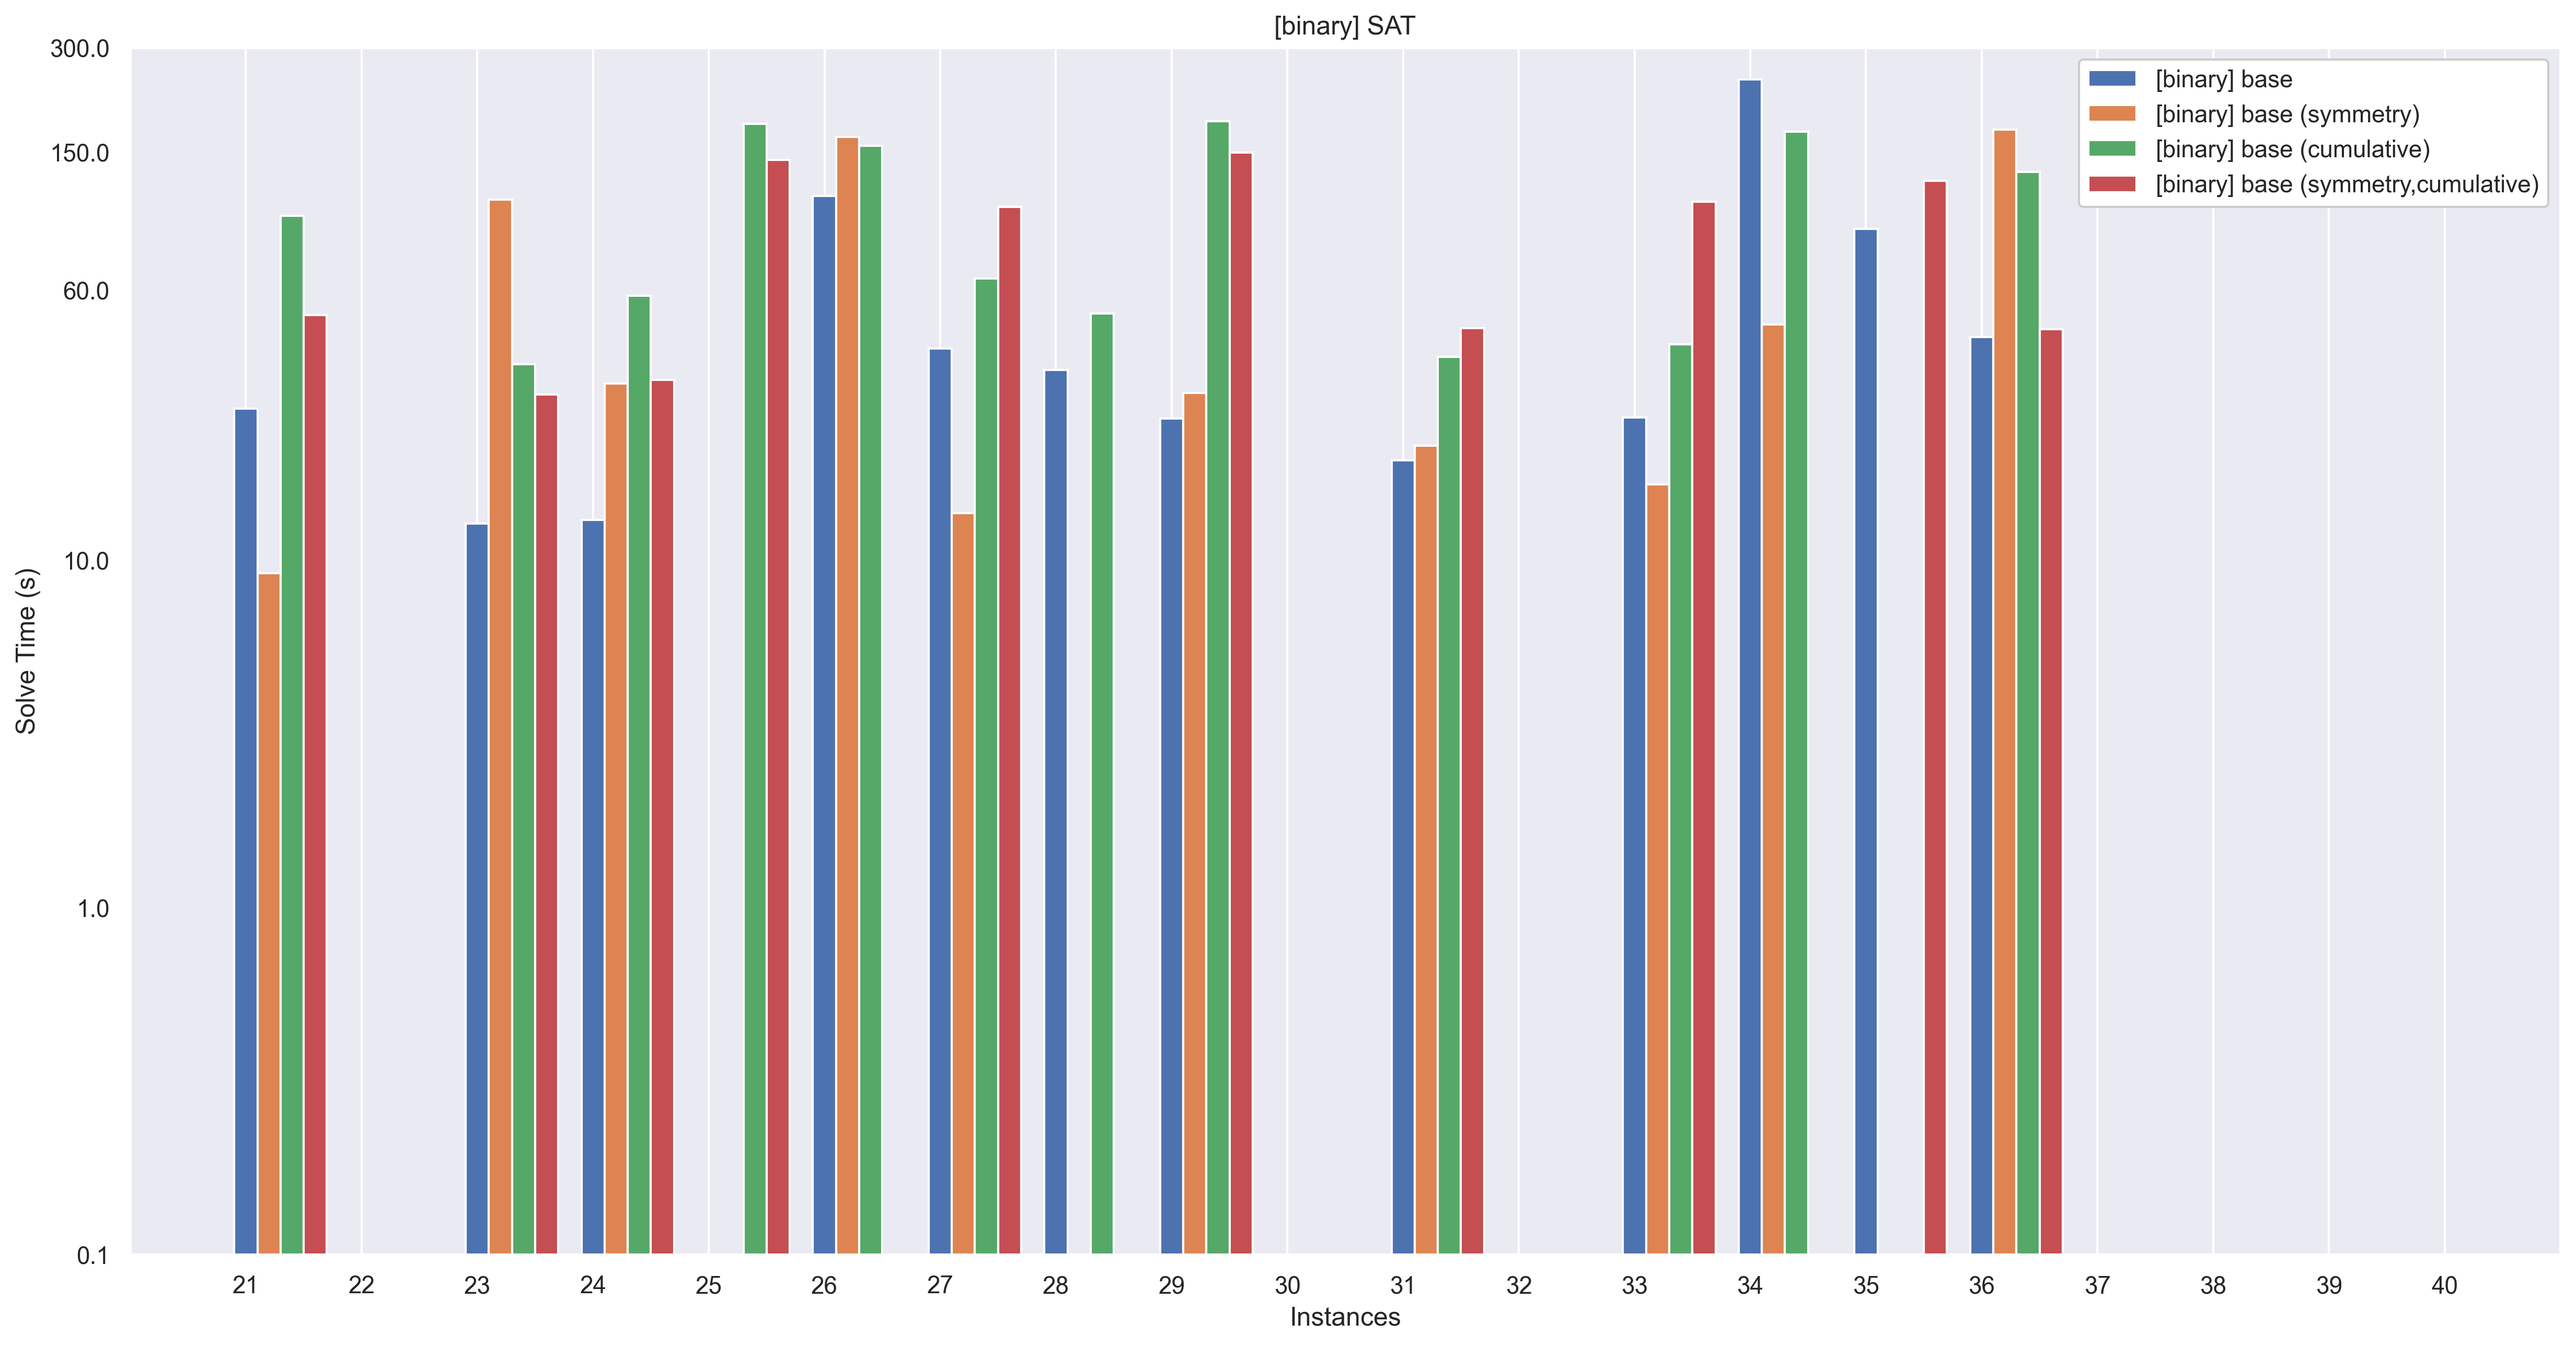

In [14]:
width = 0.2
_dfs = [
    SAT_df_filter(model="base", search="binary"),
    SAT_df_filter(model="base", search="binary", symmetry=True),
    SAT_df_filter(model="base", search="binary", cumulative=True),
    SAT_df_filter(model="base", search="binary", symmetry=True, cumulative=True),
]
labels = [
    "[binary] base", 
    "[binary] base (symmetry)", 
    "[binary] base (cumulative)", 
    "[binary] base (symmetry,cumulative)", 
]
plot("[binary] SAT", "[binary] SAT", width, prepare_plot_data(_dfs), labels)

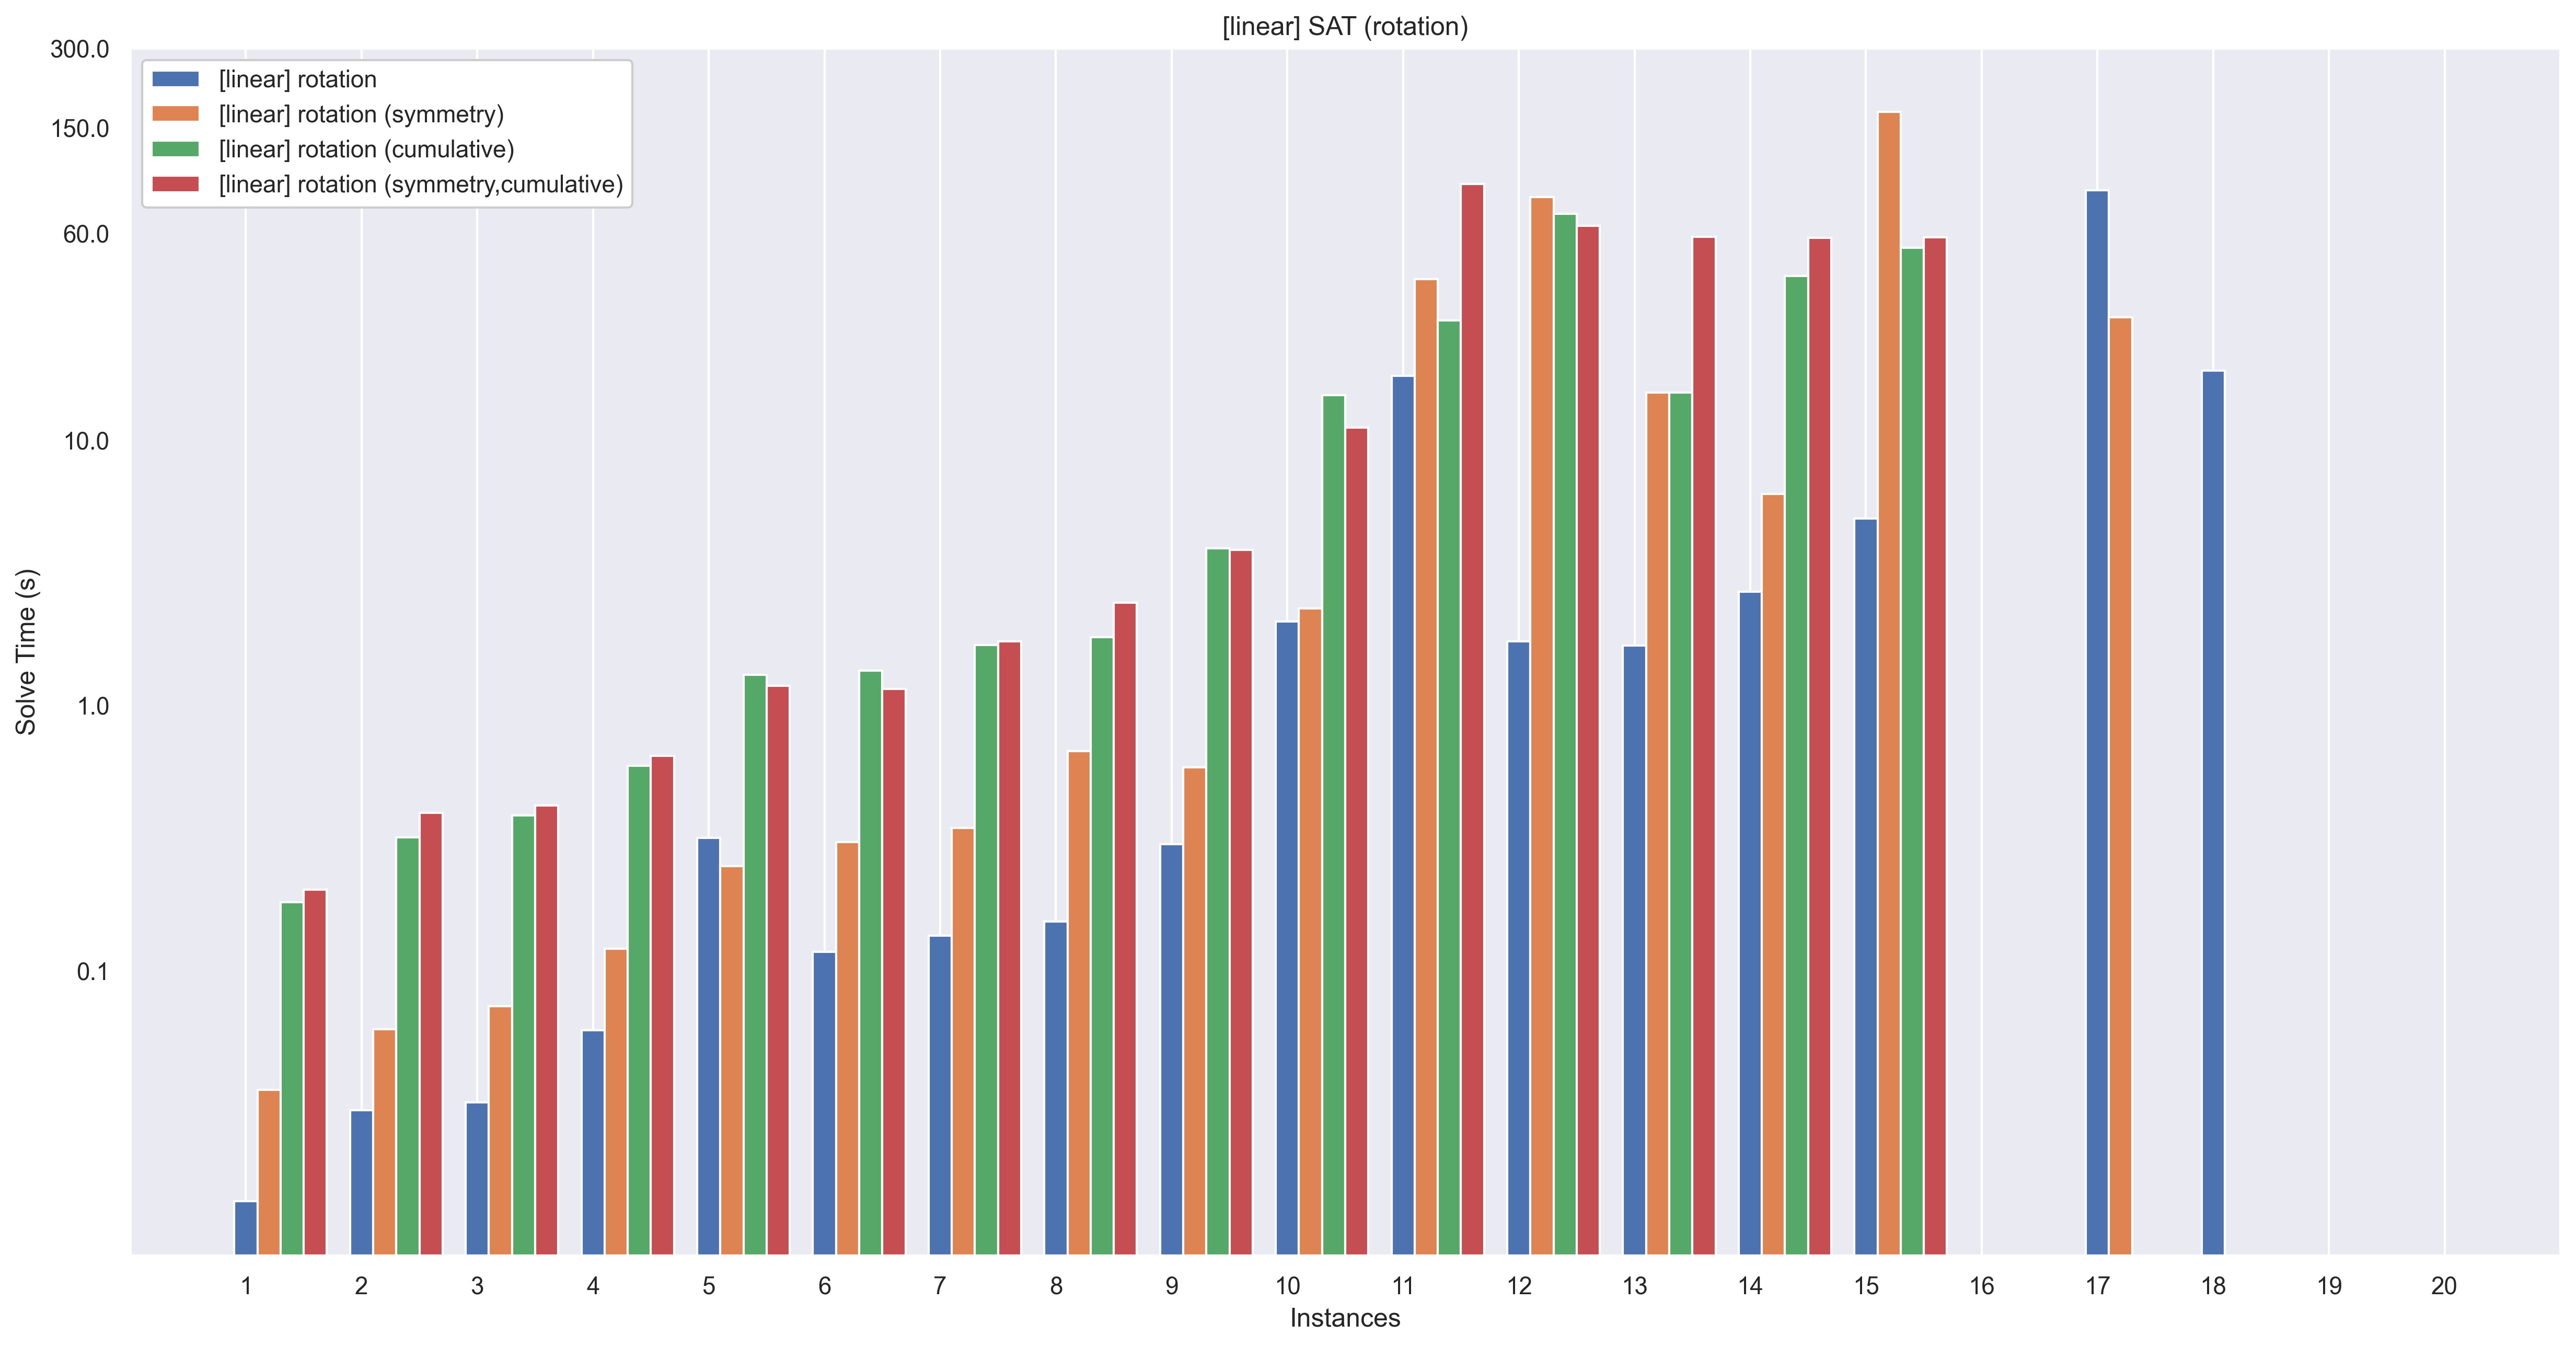

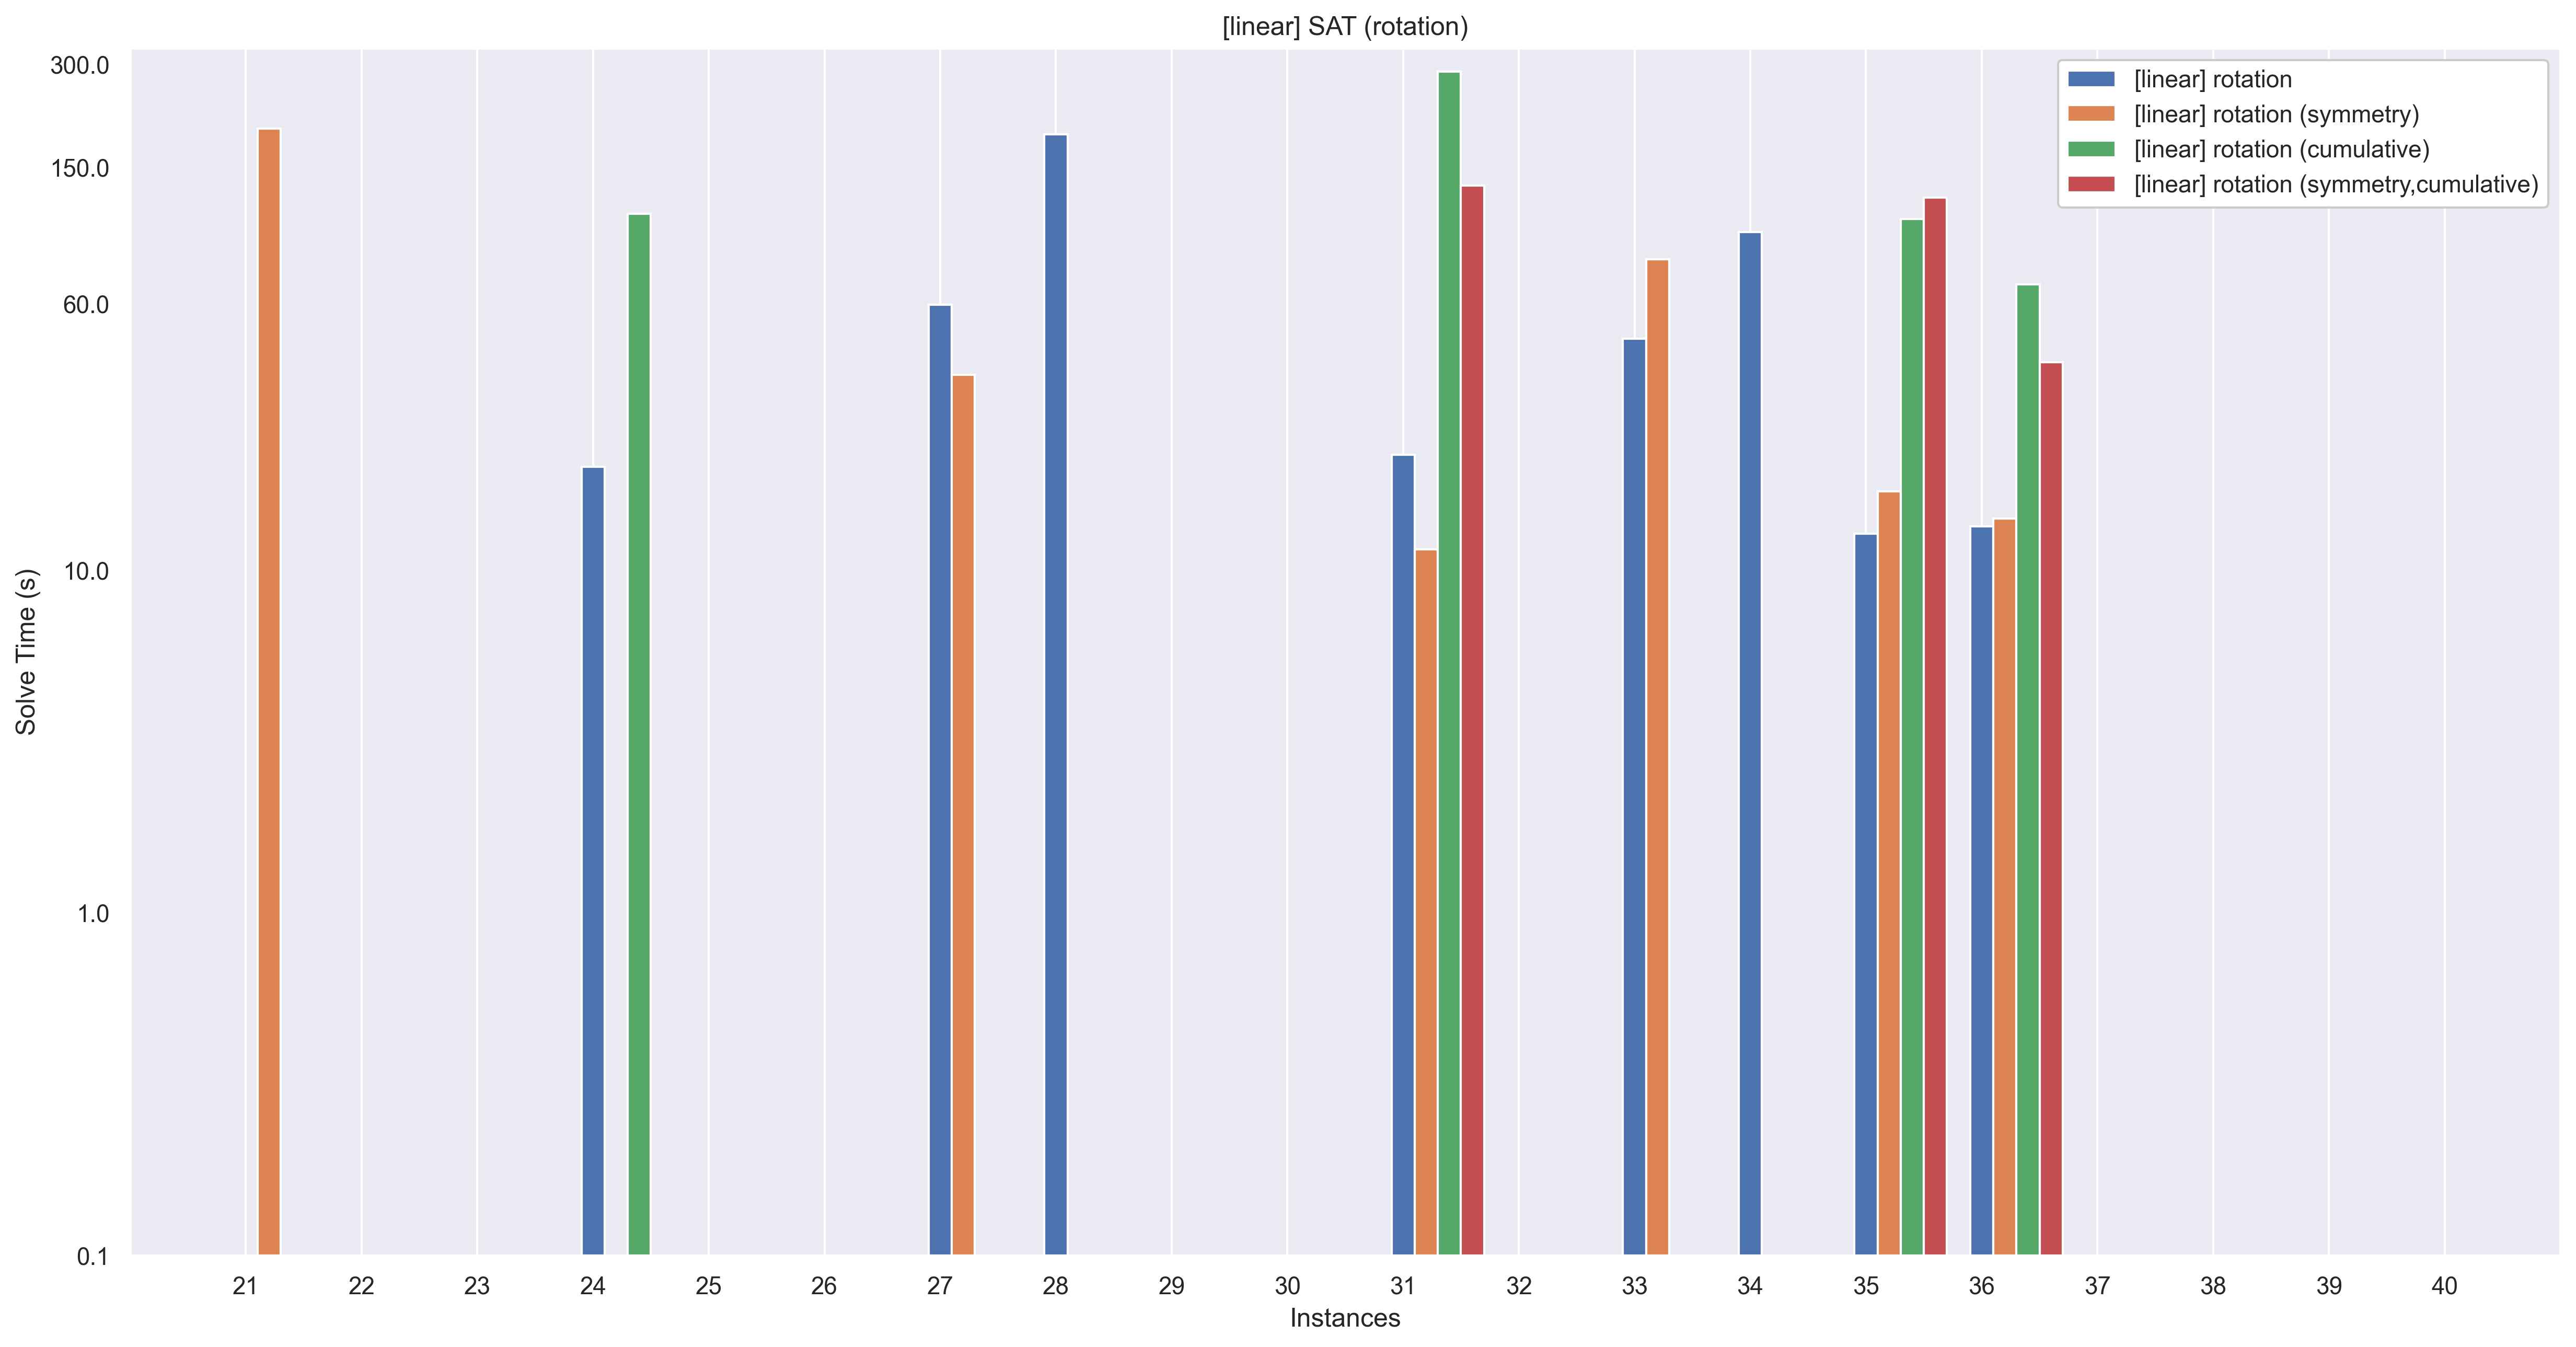

In [15]:
width = 0.2
_dfs = [
    SAT_df_filter(model="rotation", search="linear"),
    SAT_df_filter(model="rotation", search="linear", symmetry=True),
    SAT_df_filter(model="rotation", search="linear", cumulative=True),
    SAT_df_filter(model="rotation", search="linear", symmetry=True, cumulative=True),
]
labels = [
    "[linear] rotation", 
    "[linear] rotation (symmetry)", 
    "[linear] rotation (cumulative)", 
    "[linear] rotation (symmetry,cumulative)", 
]
plot("[linear] SAT (rotation)", "[linear] SAT (rotation)", width, prepare_plot_data(_dfs), labels)

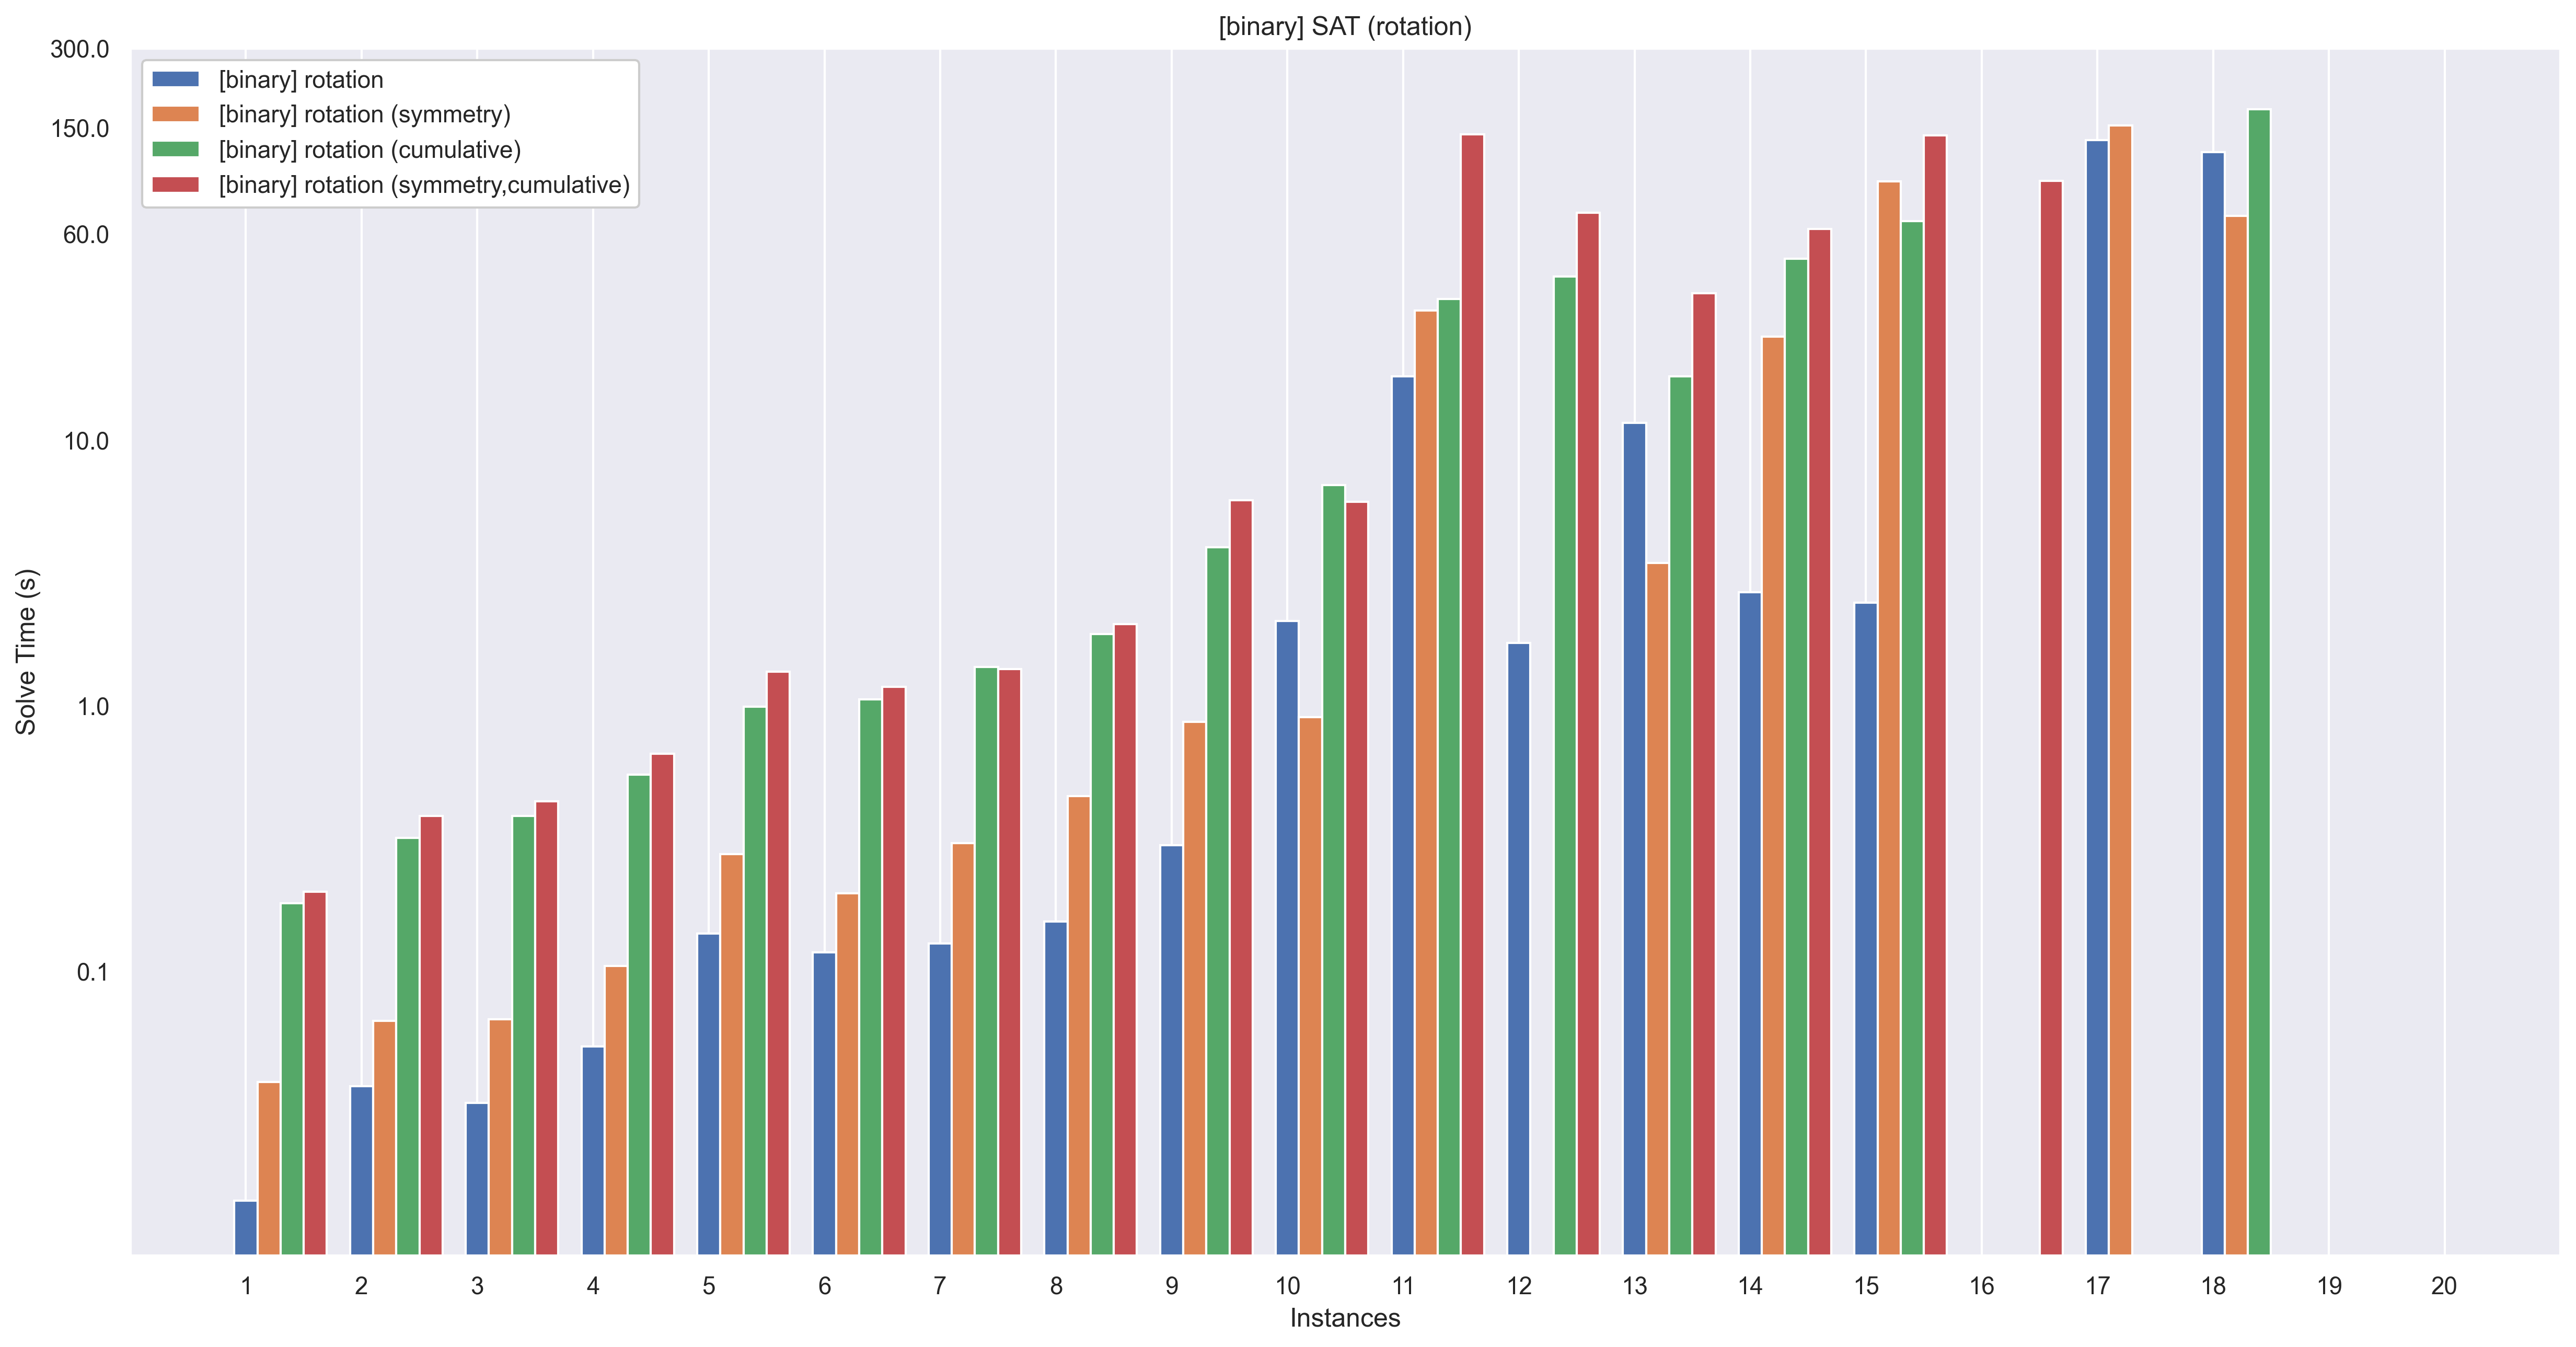

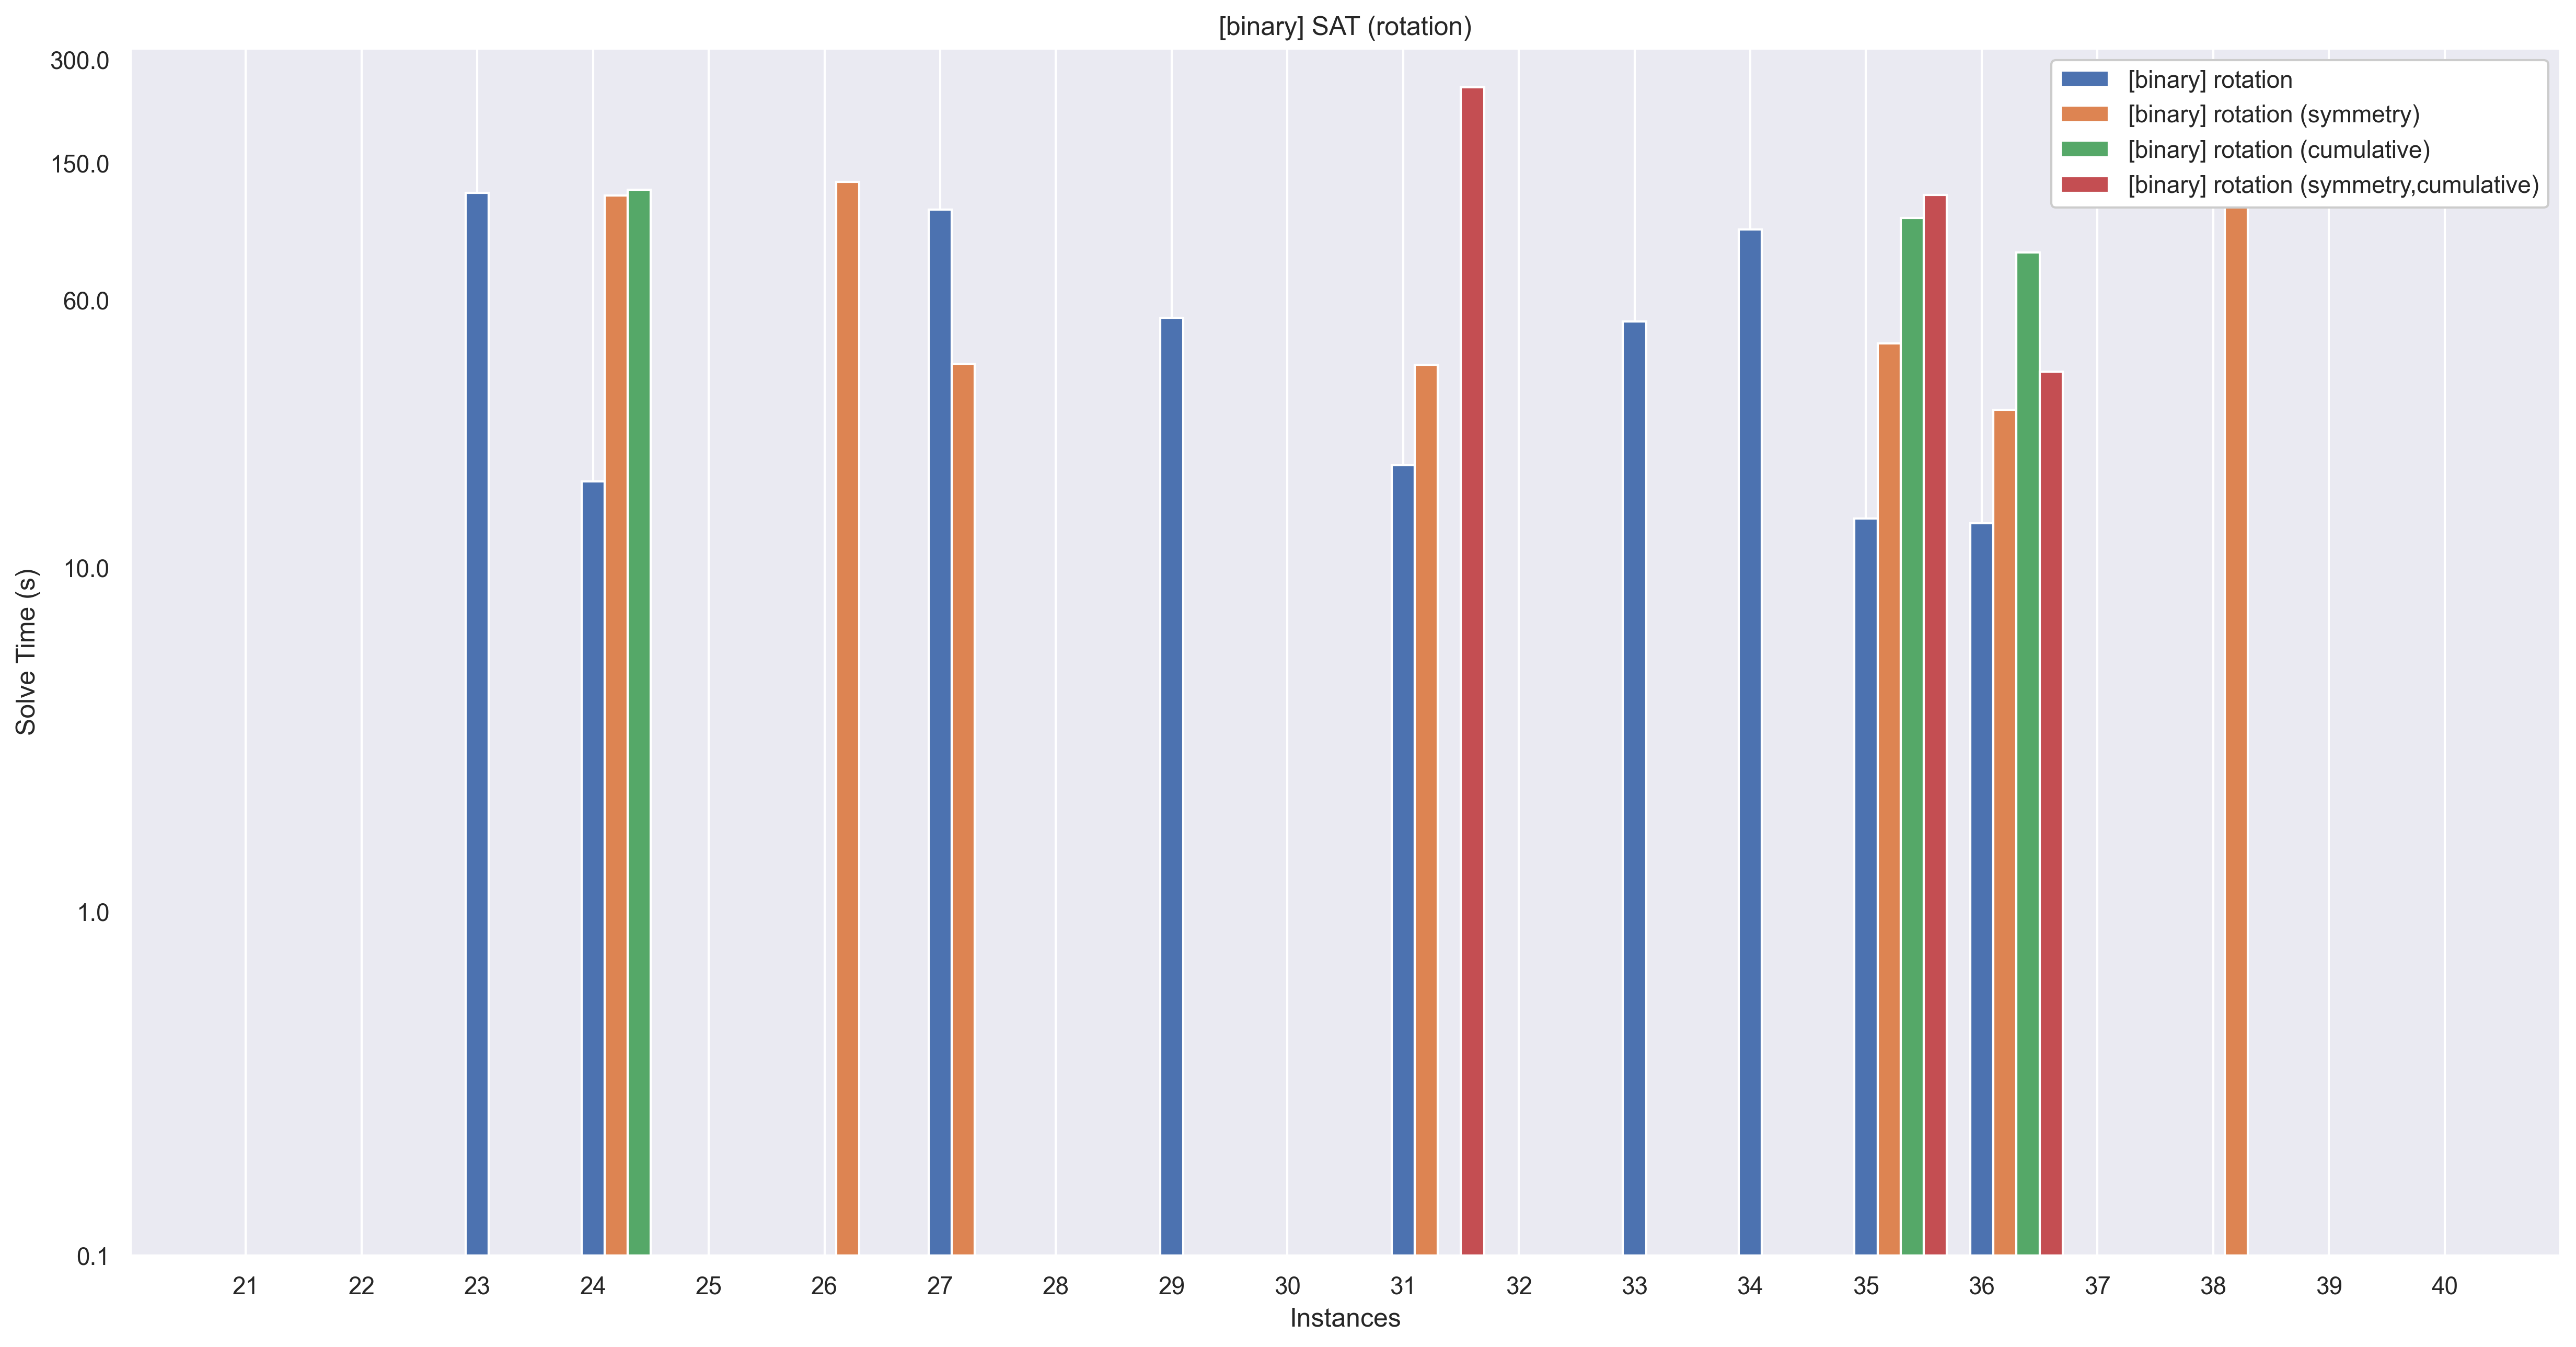

In [16]:
width = 0.2
_dfs = [
    SAT_df_filter(model="rotation", search="binary"),
    SAT_df_filter(model="rotation", search="binary", symmetry=True),
    SAT_df_filter(model="rotation", search="binary", cumulative=True),
    SAT_df_filter(model="rotation", search="binary", symmetry=True, cumulative=True),
]
labels = [
    "[binary] rotation", 
    "[binary] rotation (symmetry)", 
    "[binary] rotation (cumulative)", 
    "[binary] rotation (symmetry,cumulative)", 
]
plot("[binary] SAT (rotation)", "[binary] SAT (rotation)", width, prepare_plot_data(_dfs), labels)

### SMT

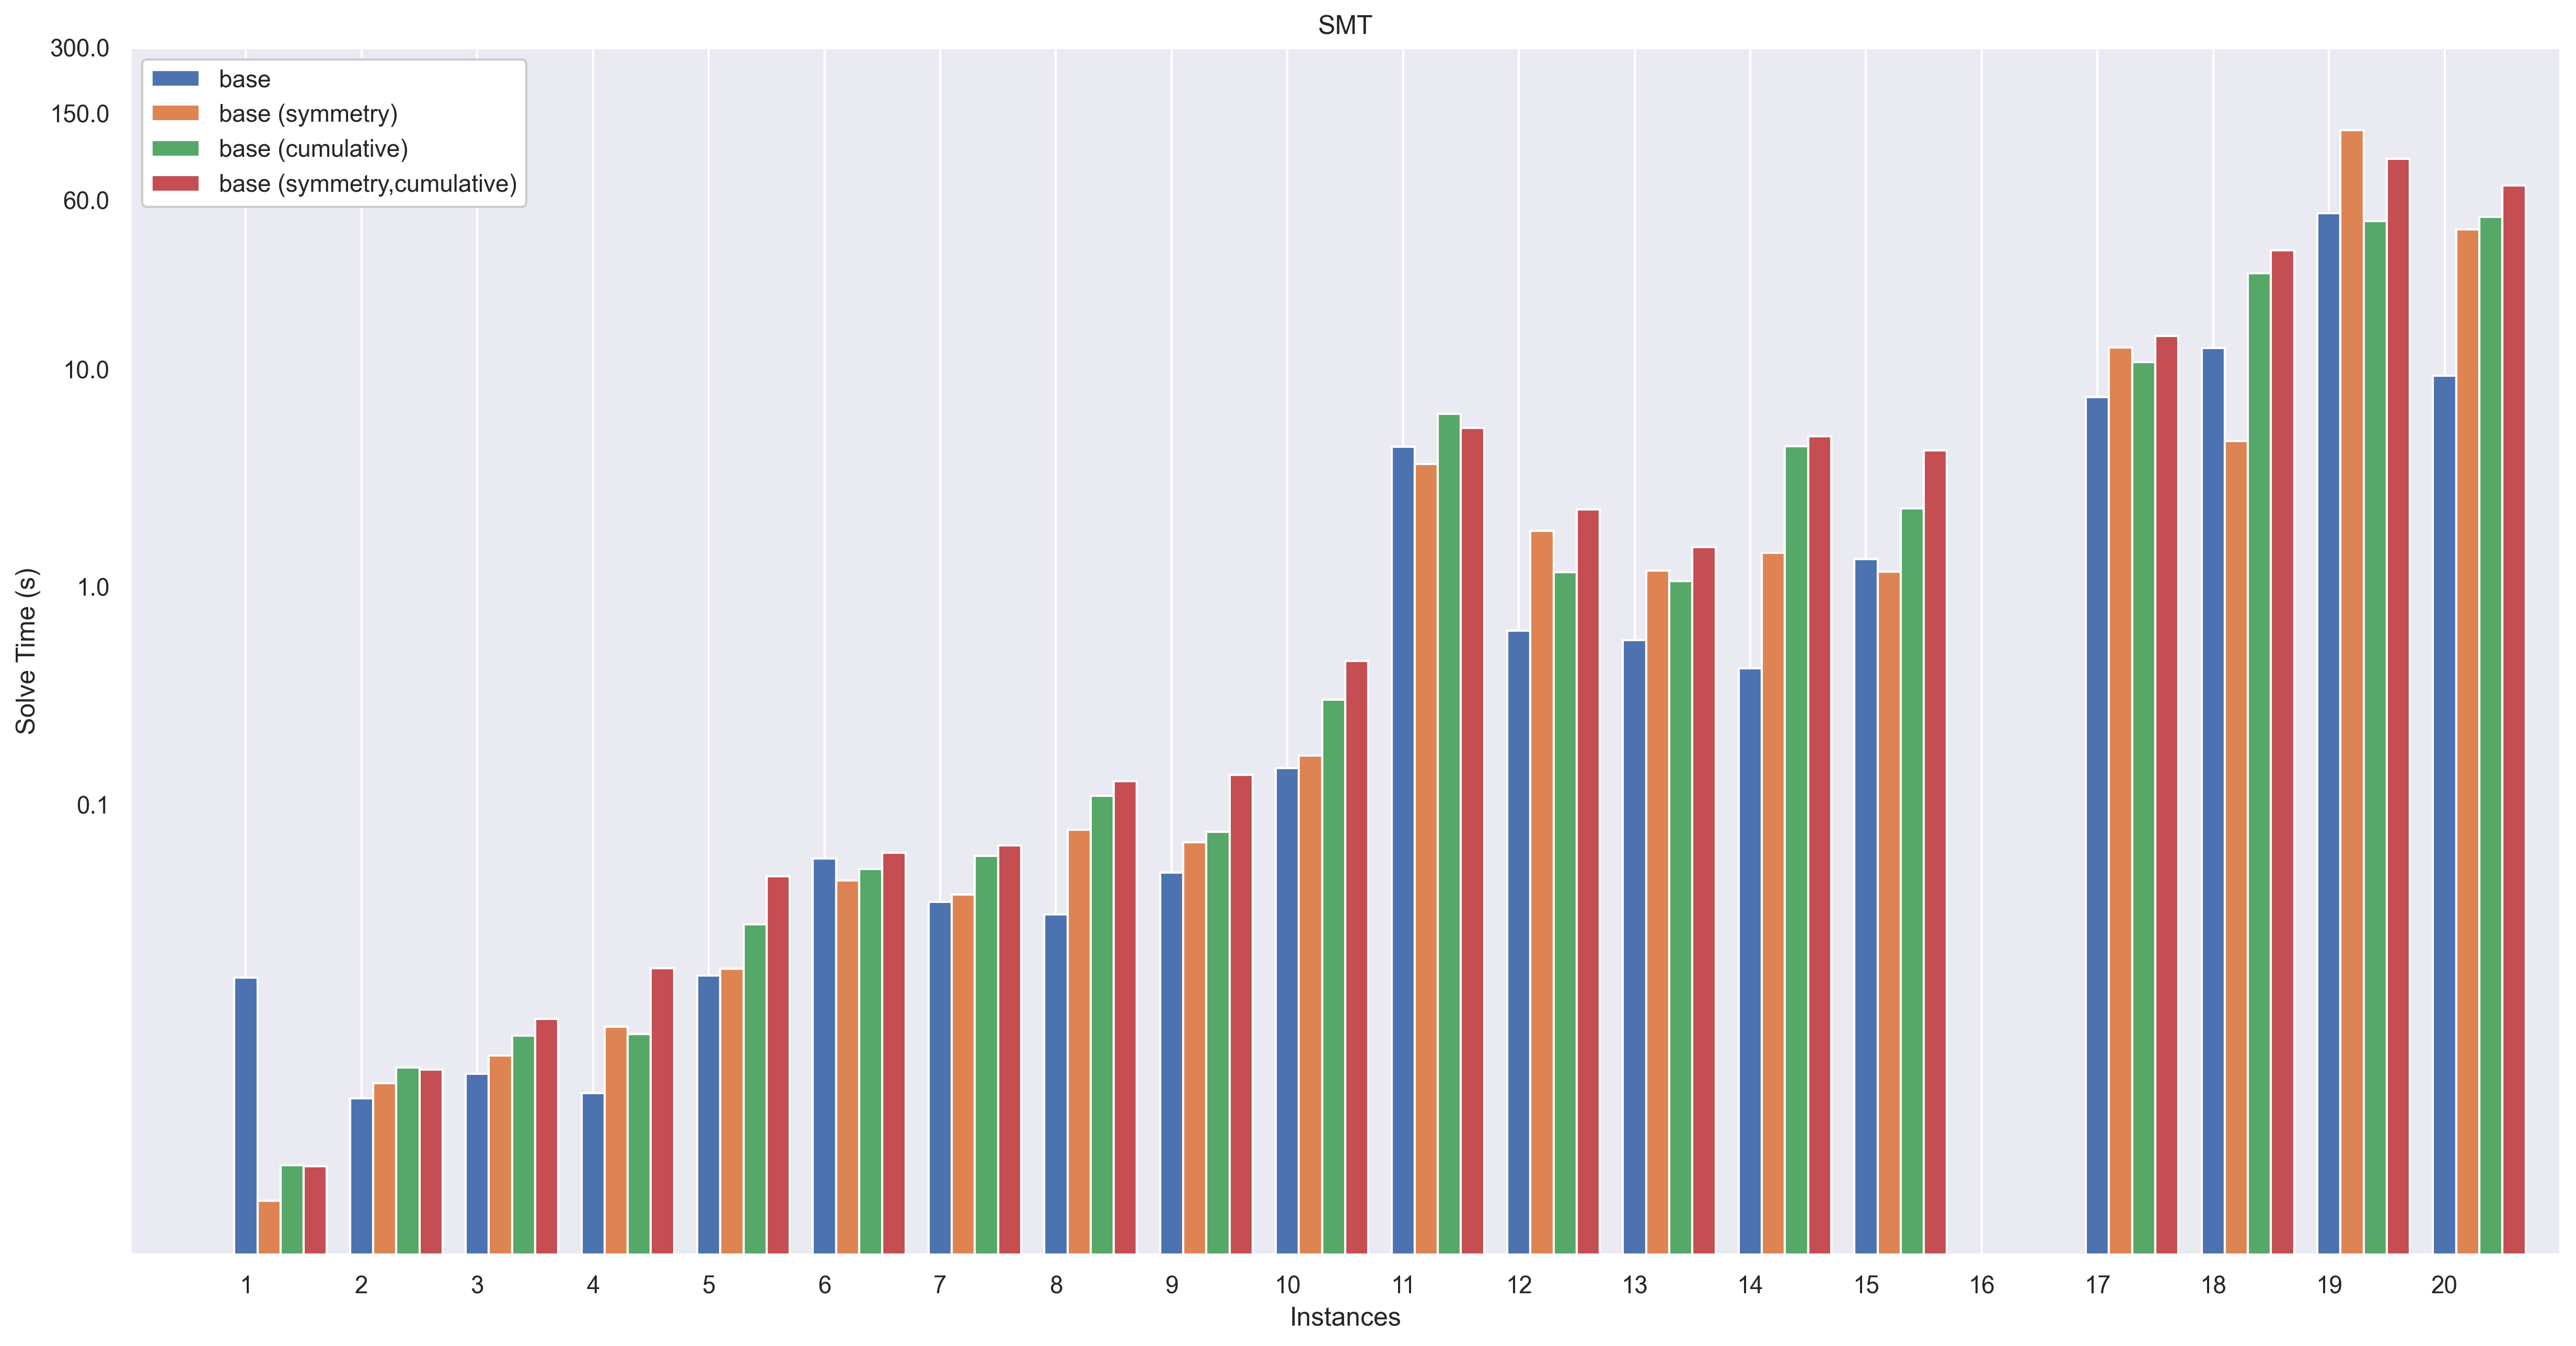

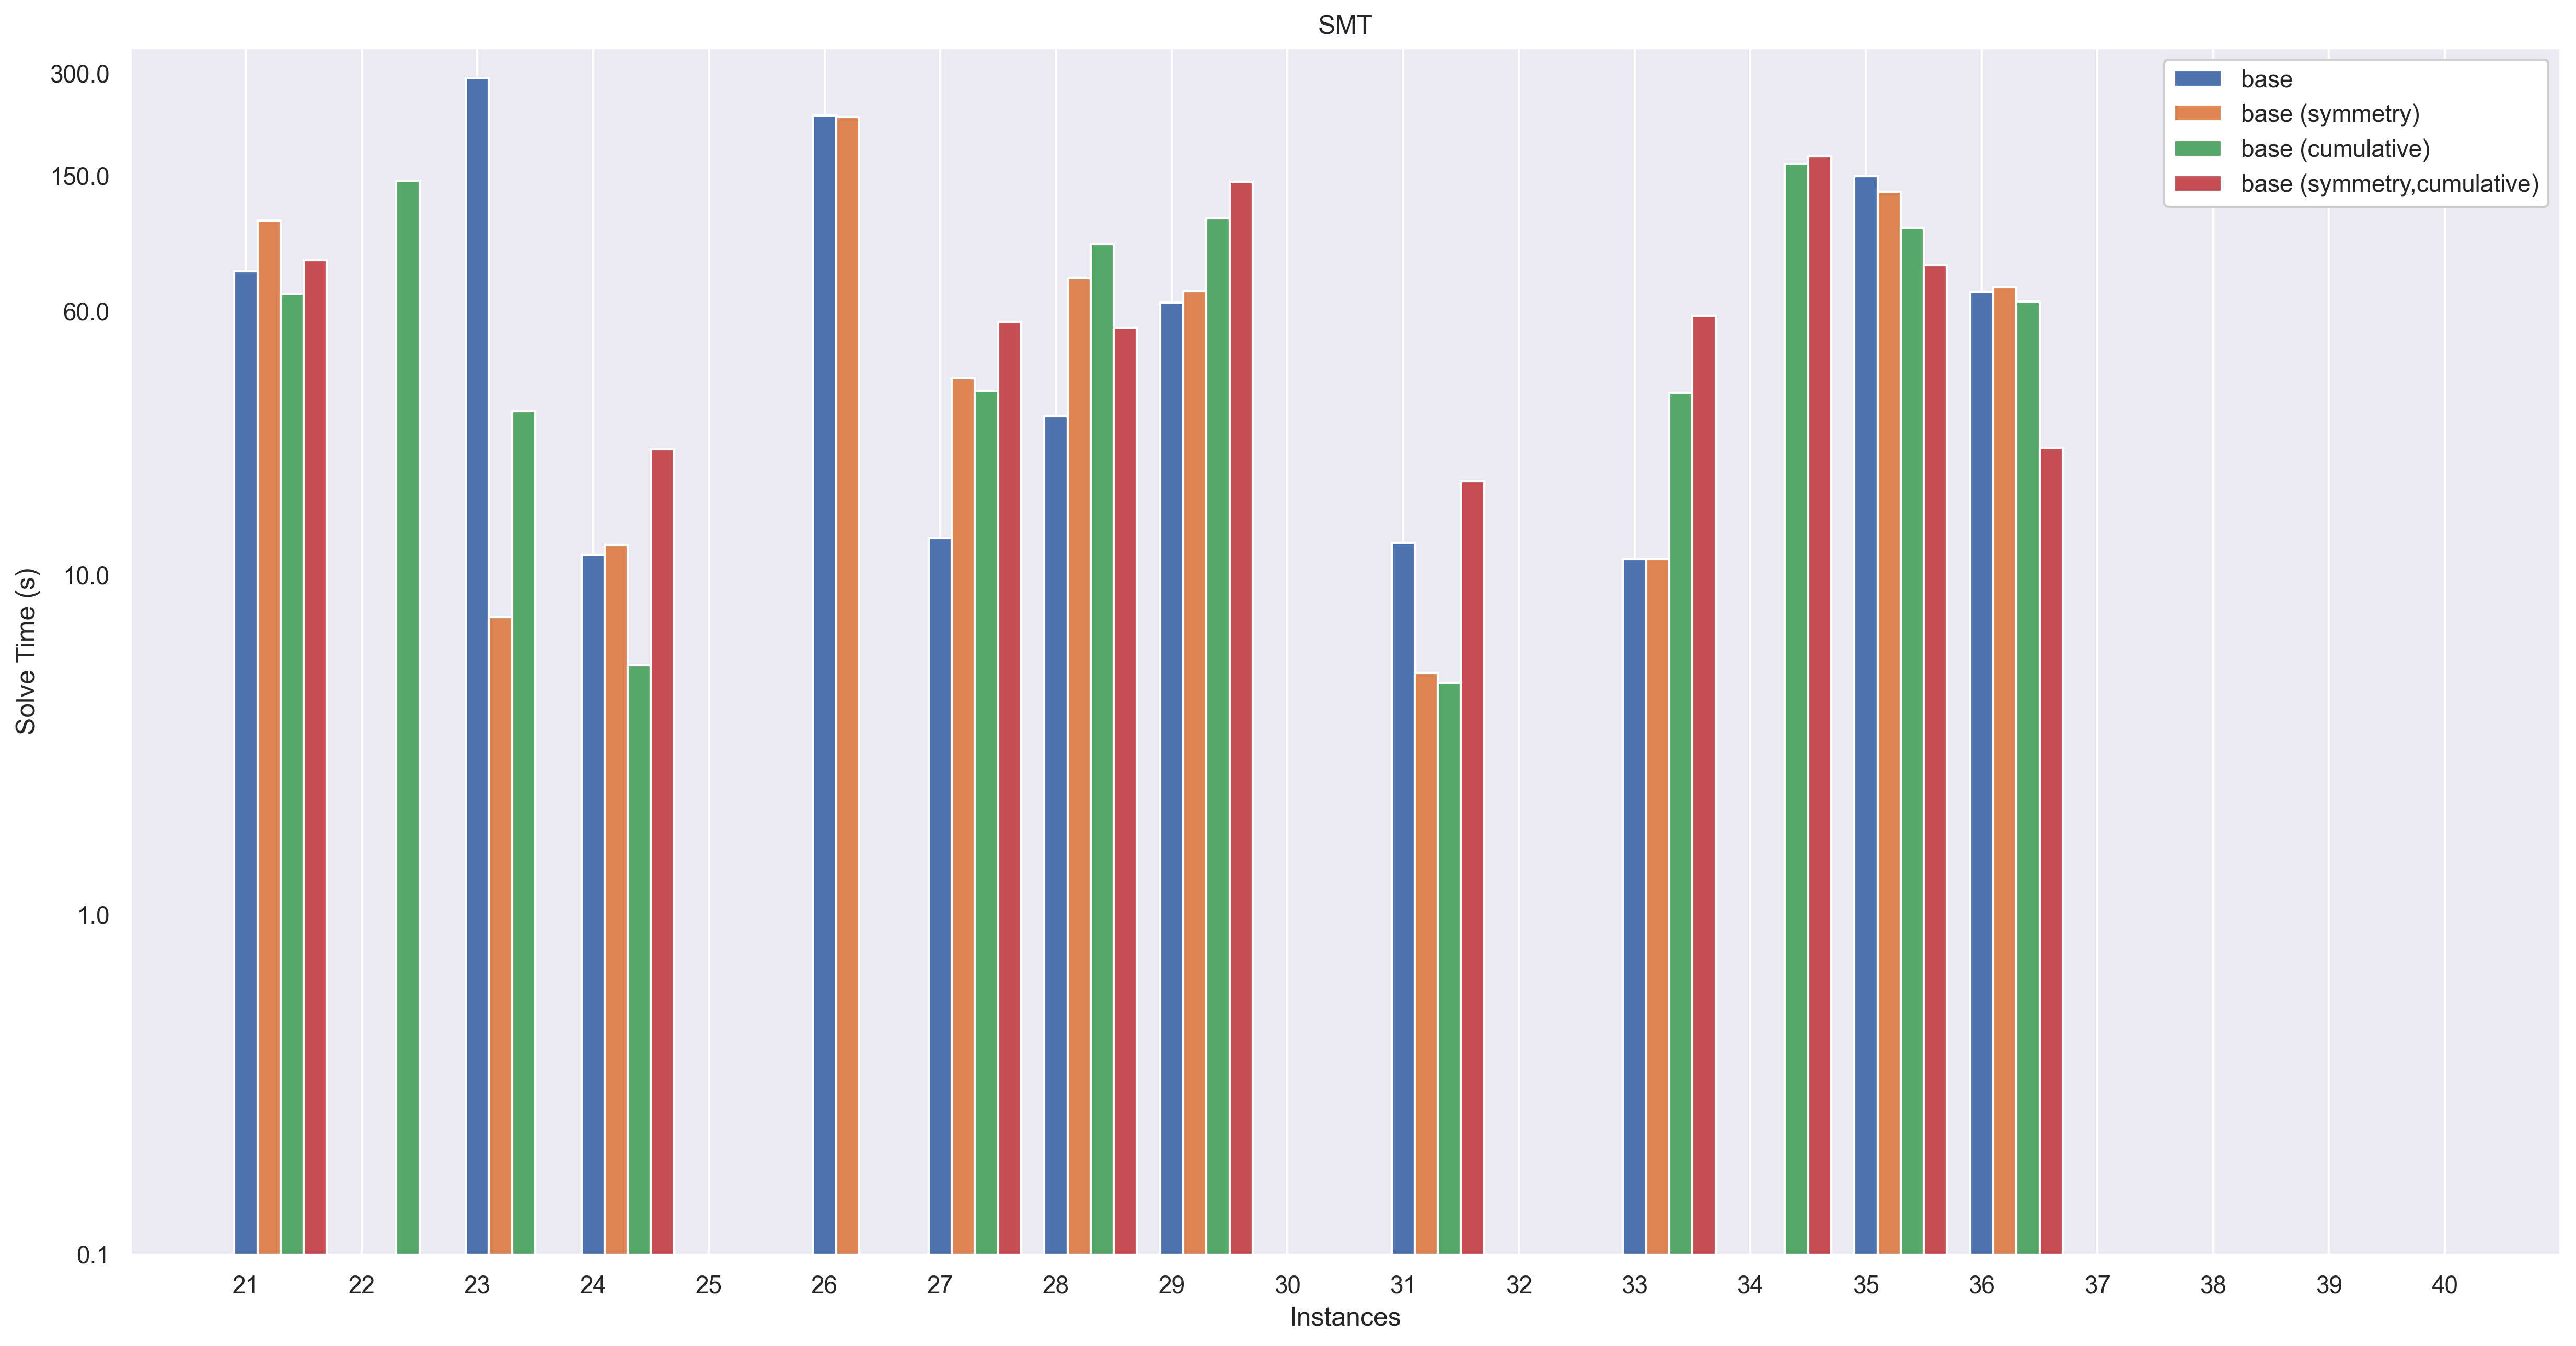

In [17]:
width = 0.2
_dfs = [
    SMT_df_filter(model="base"),
    SMT_df_filter(model="base", symmetry=True),
    SMT_df_filter(model="base", cumulative=True),
    SMT_df_filter(model="base", symmetry=True, cumulative=True),
]
labels = [
    "base", 
    "base (symmetry)", 
    "base (cumulative)",
    "base (symmetry,cumulative)"
]
plot("SMT", "SMT", width, prepare_plot_data(_dfs), labels)

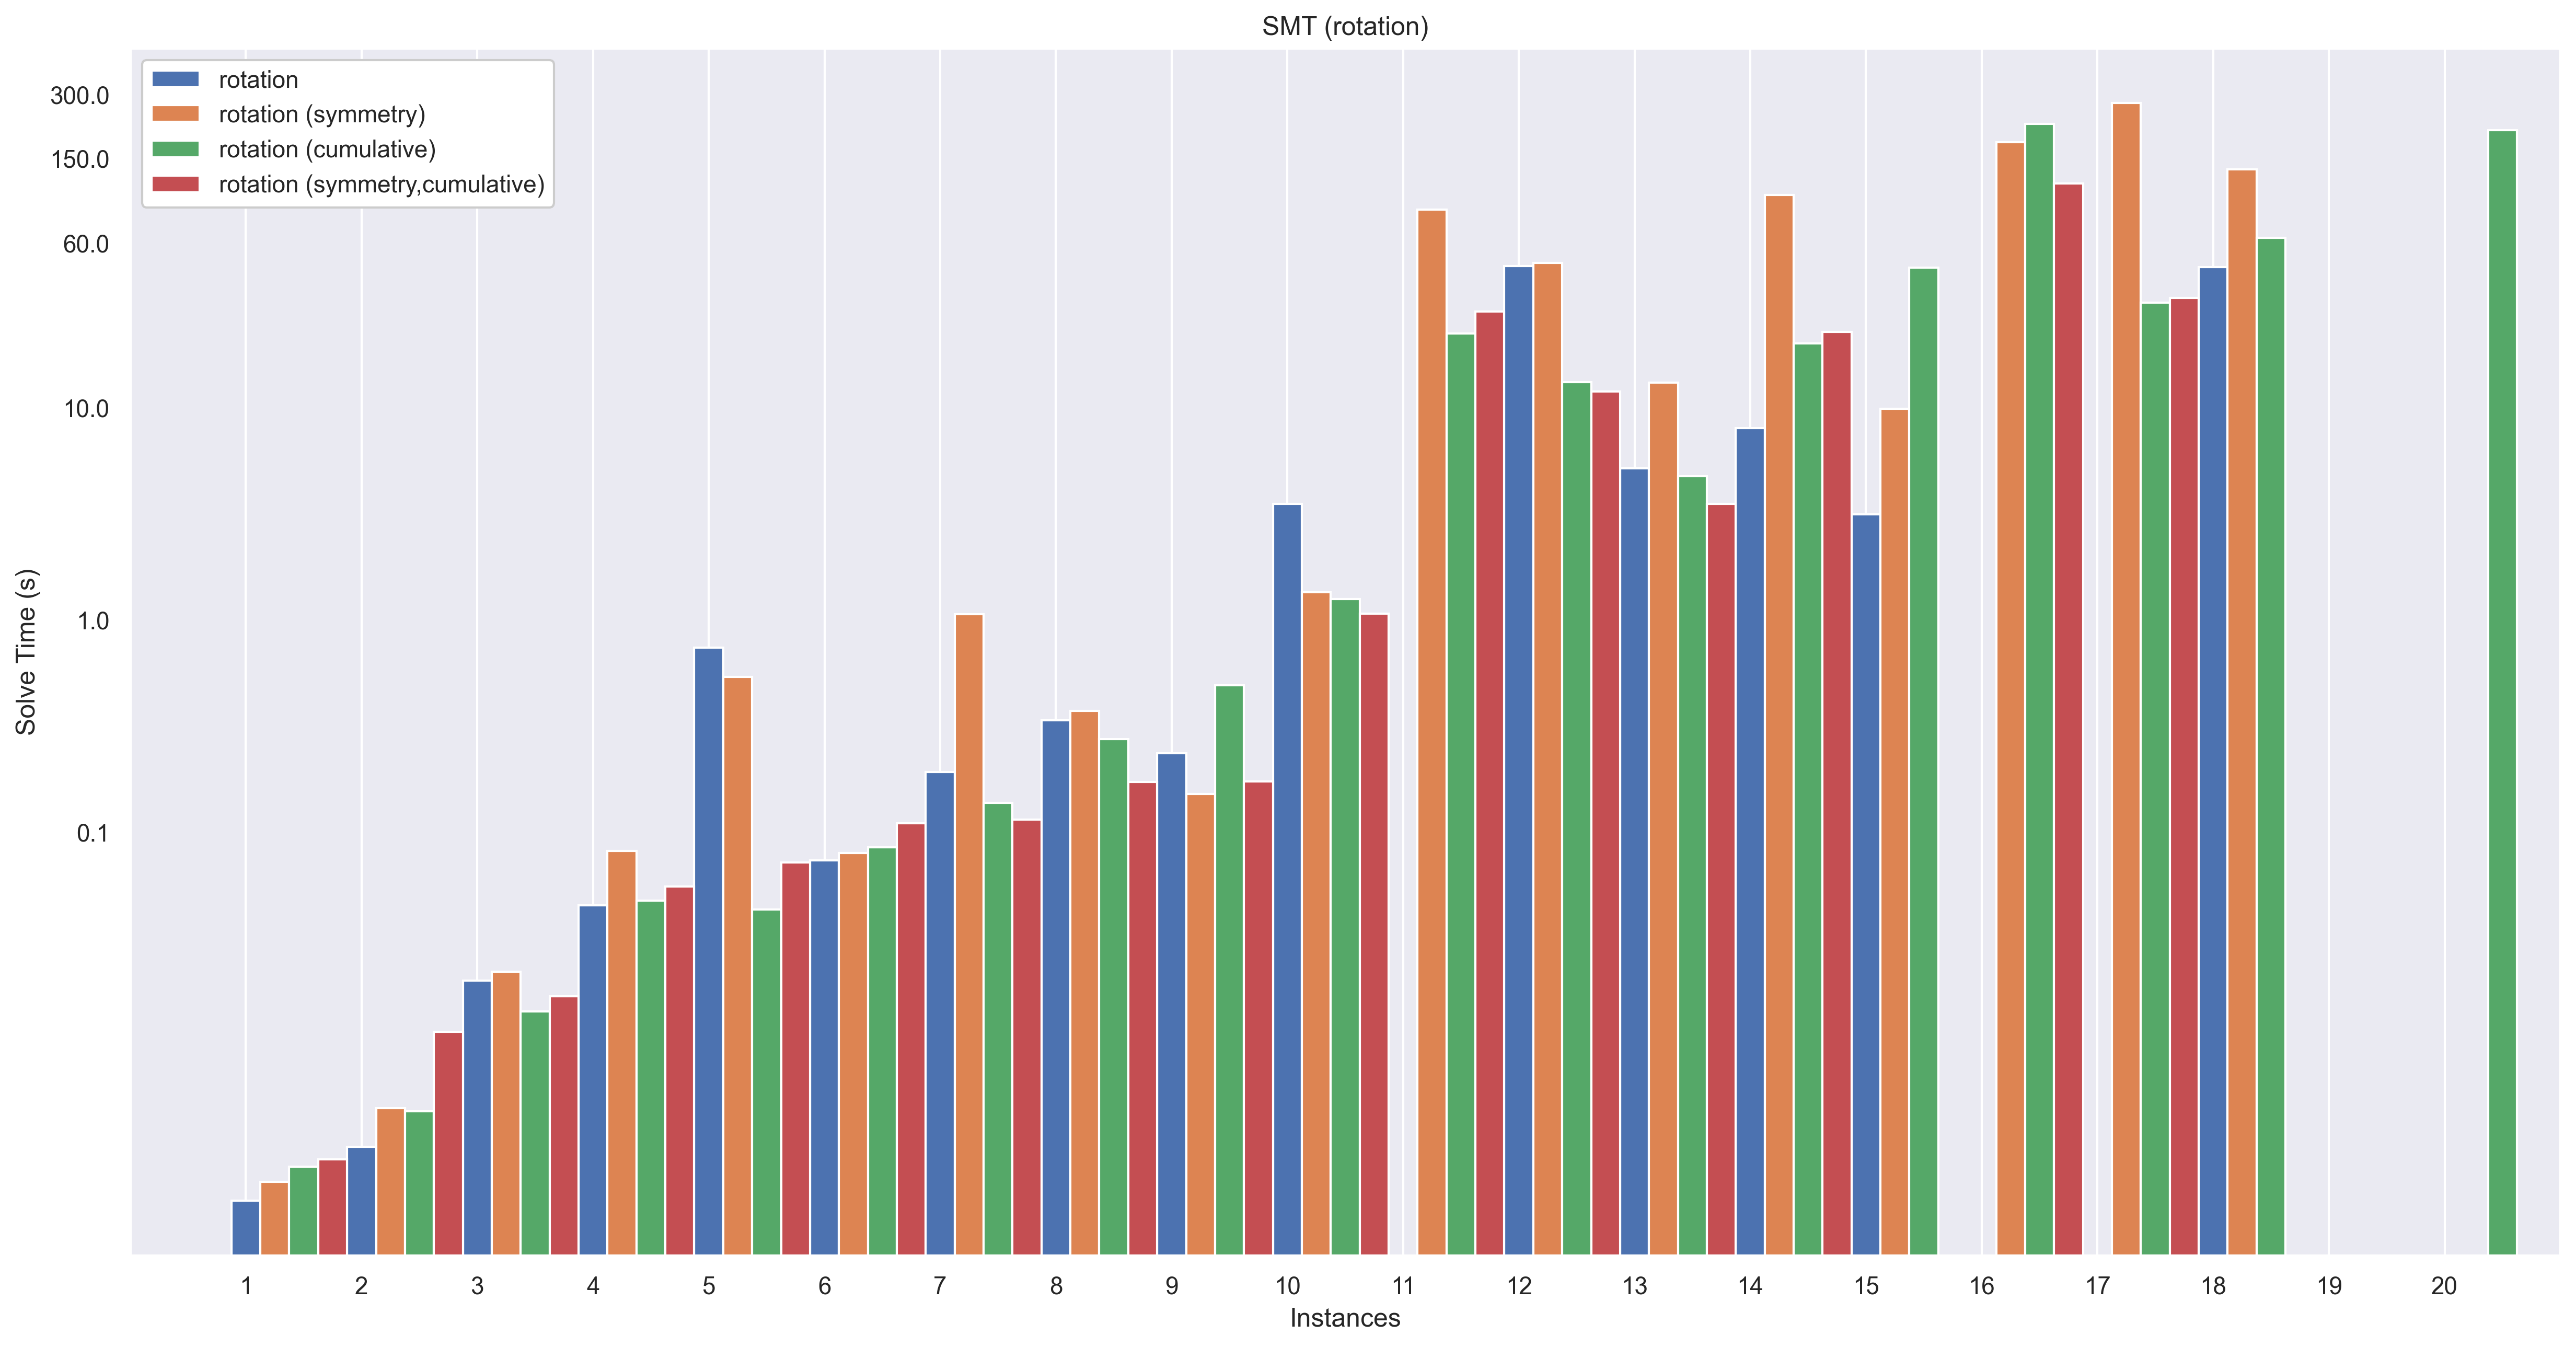

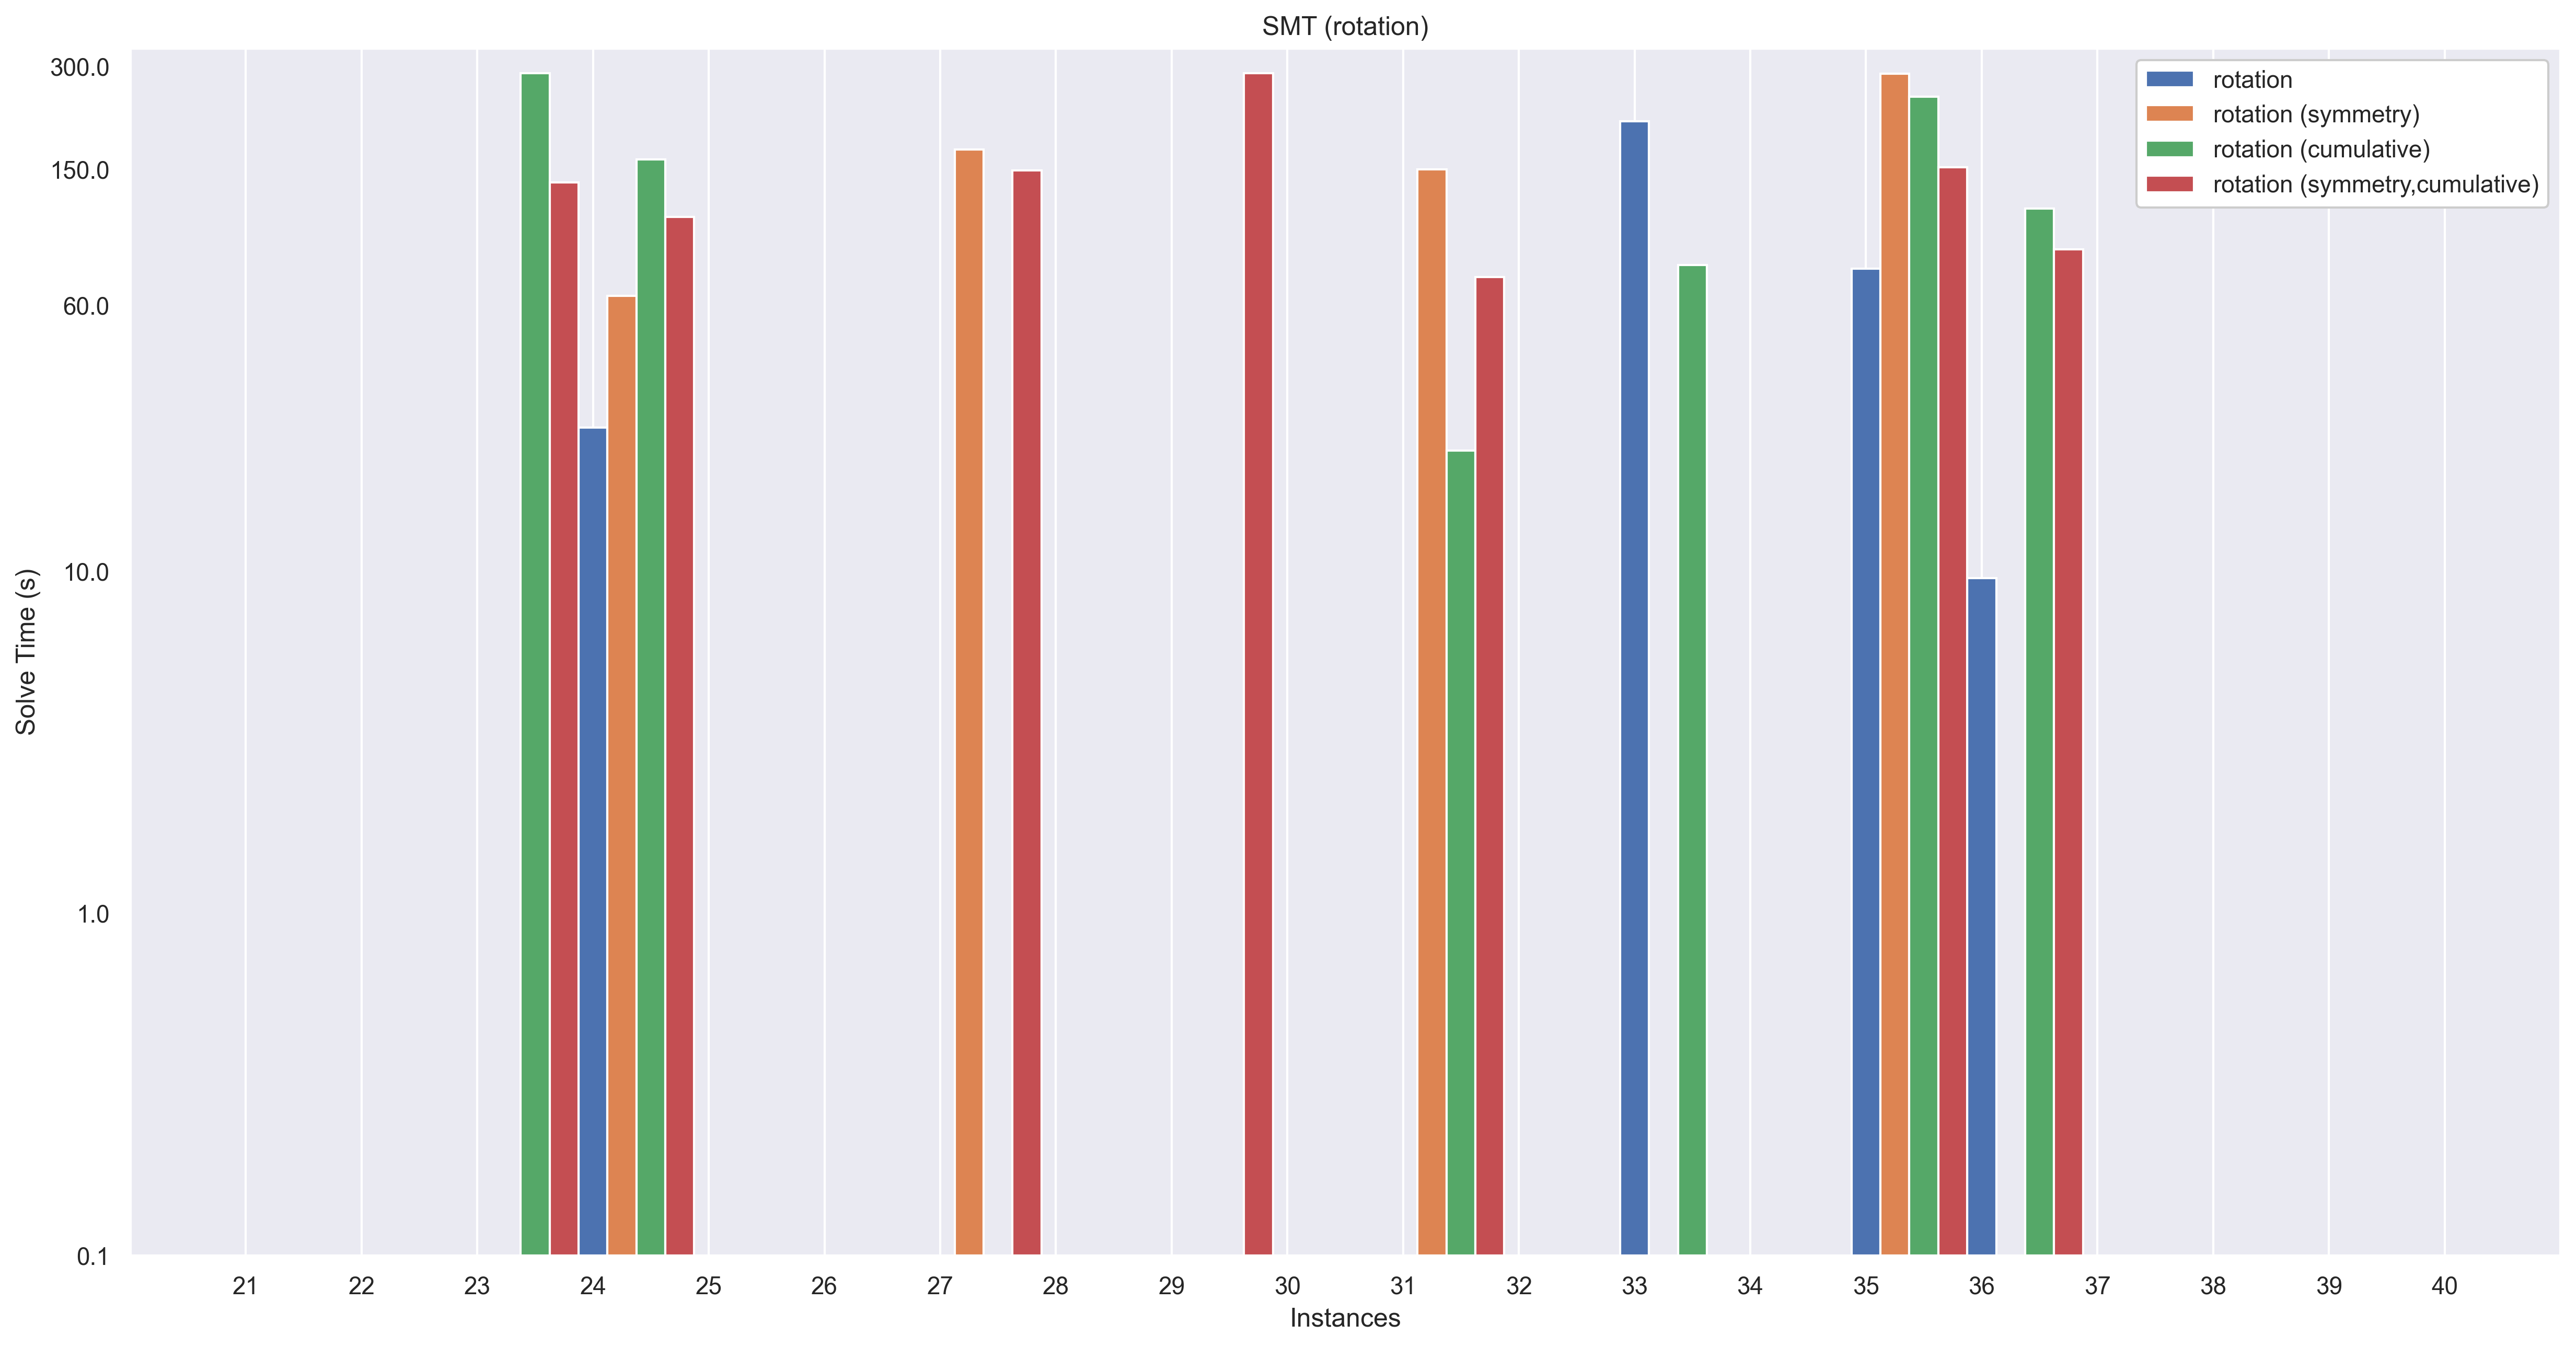

In [18]:
width = 0.25
_dfs = [
    SMT_df_filter(model="rotation"),
    SMT_df_filter(model="rotation", symmetry=True),
    SMT_df_filter(model="rotation", cumulative=True),
    SMT_df_filter(model="rotation", symmetry=True, cumulative=True),
]
labels = [
    "rotation", 
    "rotation (symmetry)", 
    "rotation (cumulative)",
    "rotation (symmetry,cumulative)"
]
plot("SMT (rotation)", "SMT (rotation)", width, prepare_plot_data(_dfs), labels)

### ILP

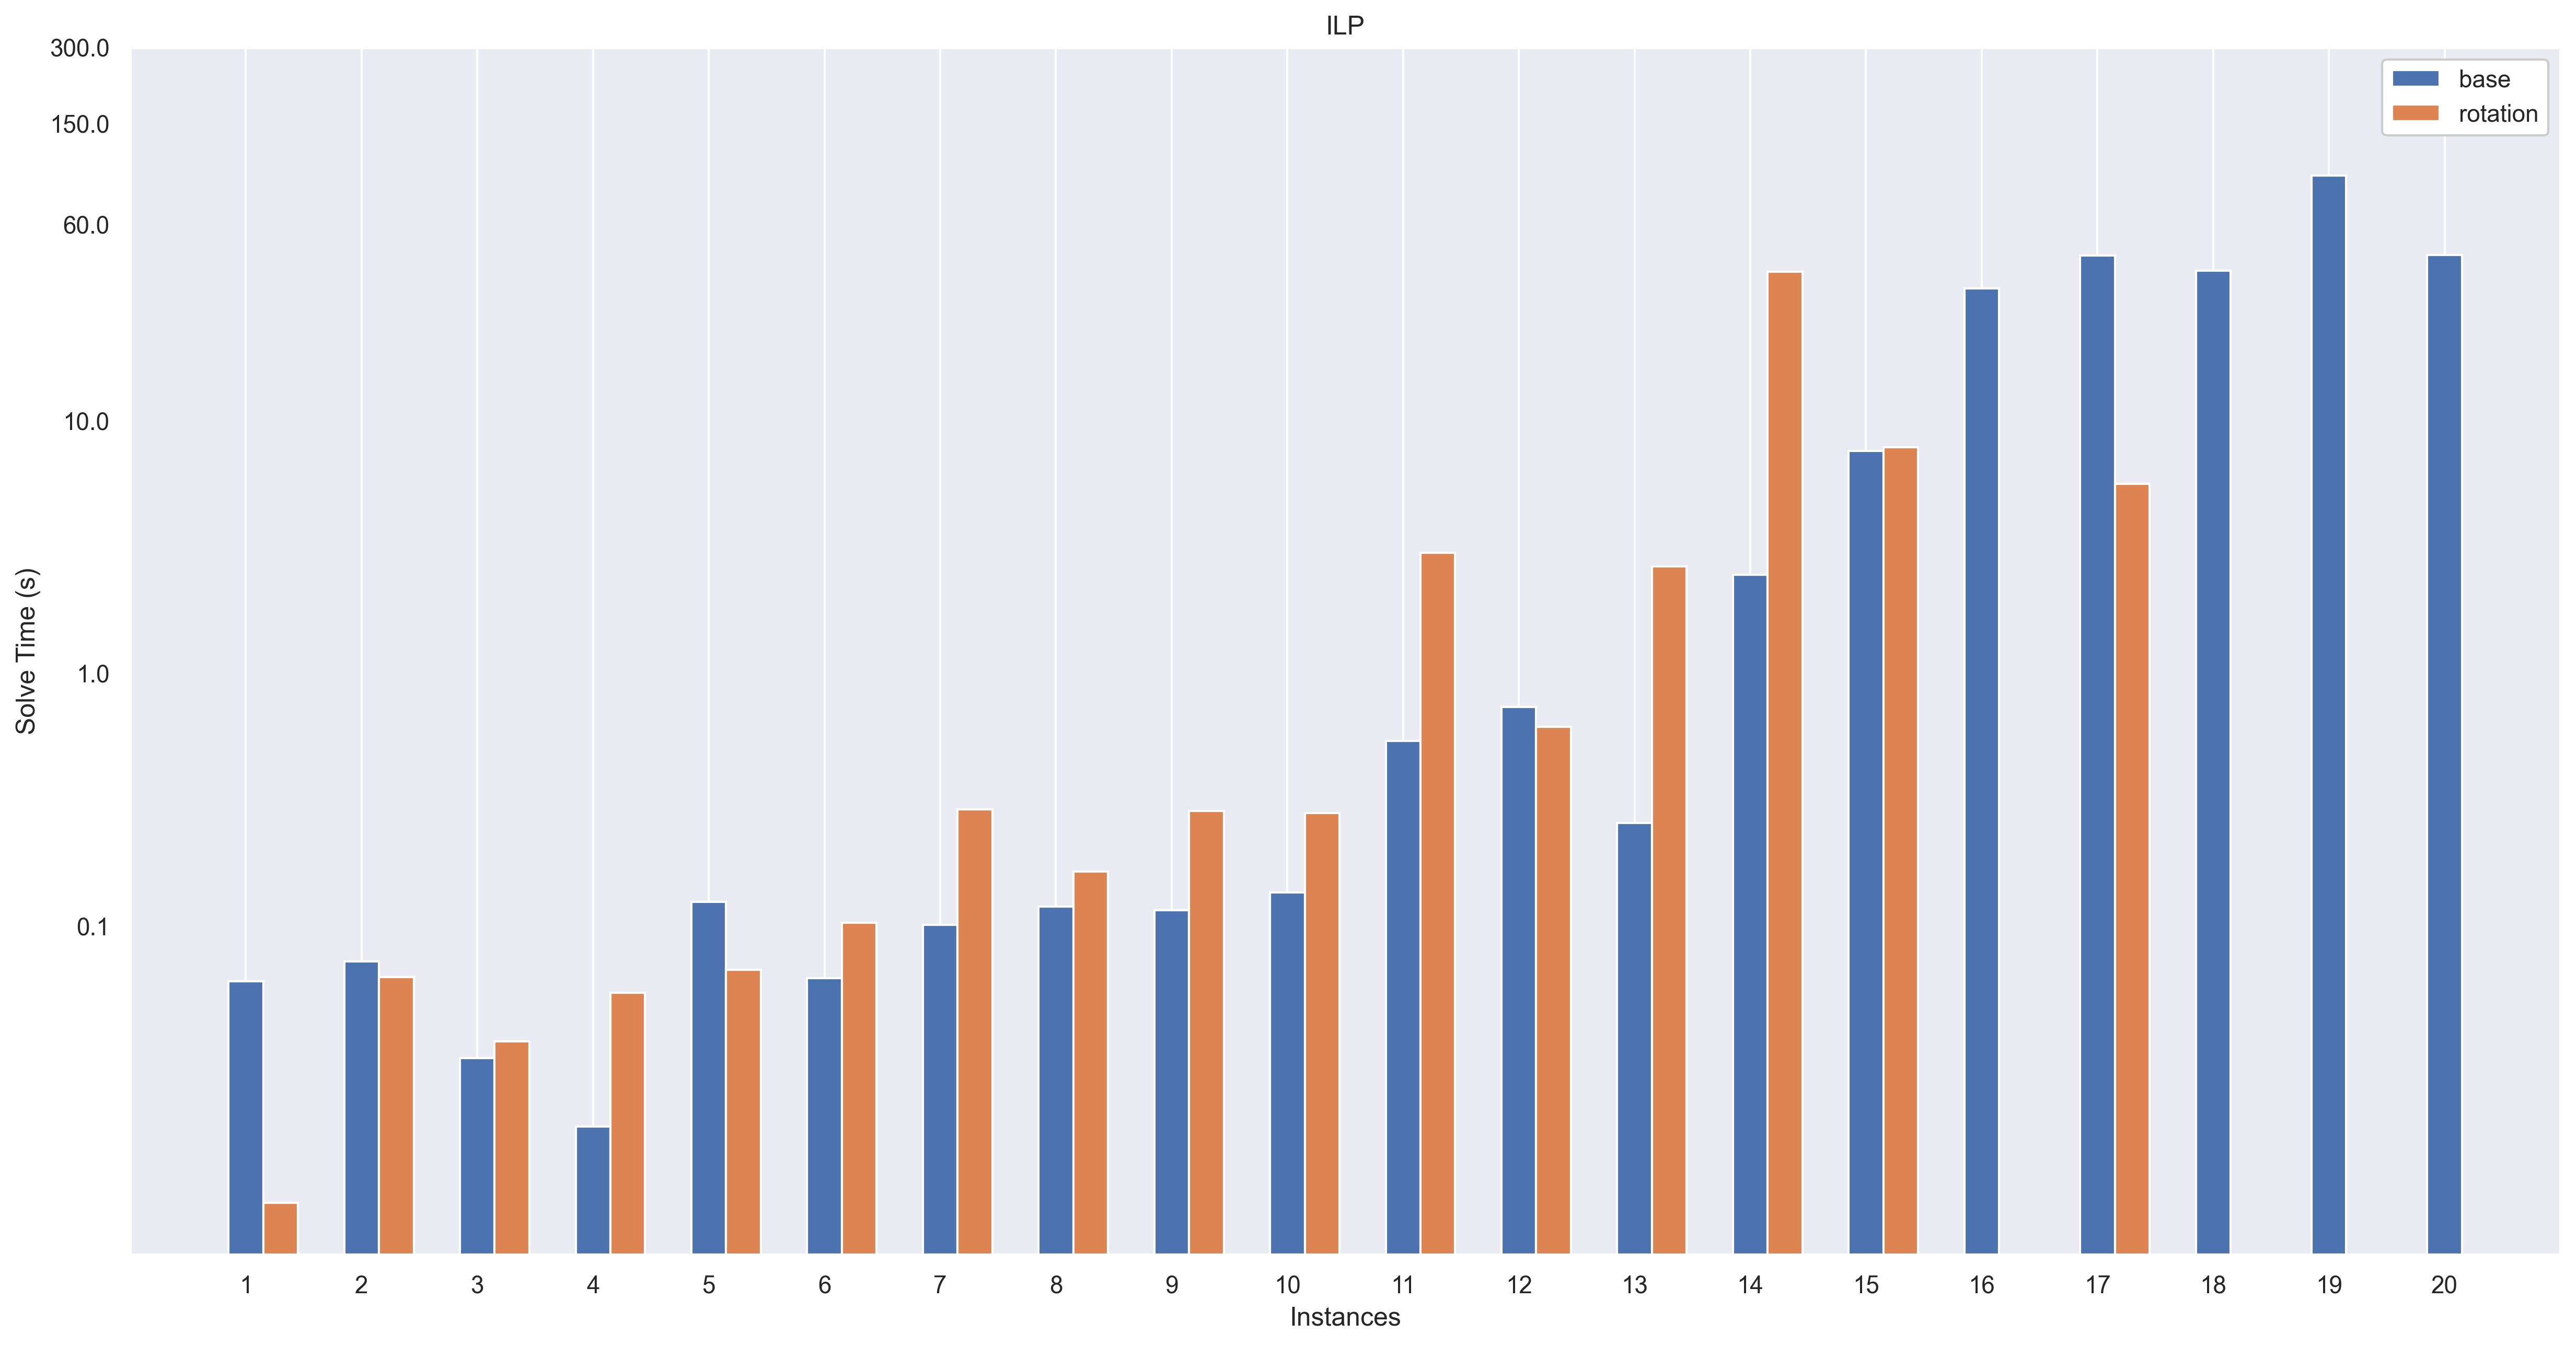

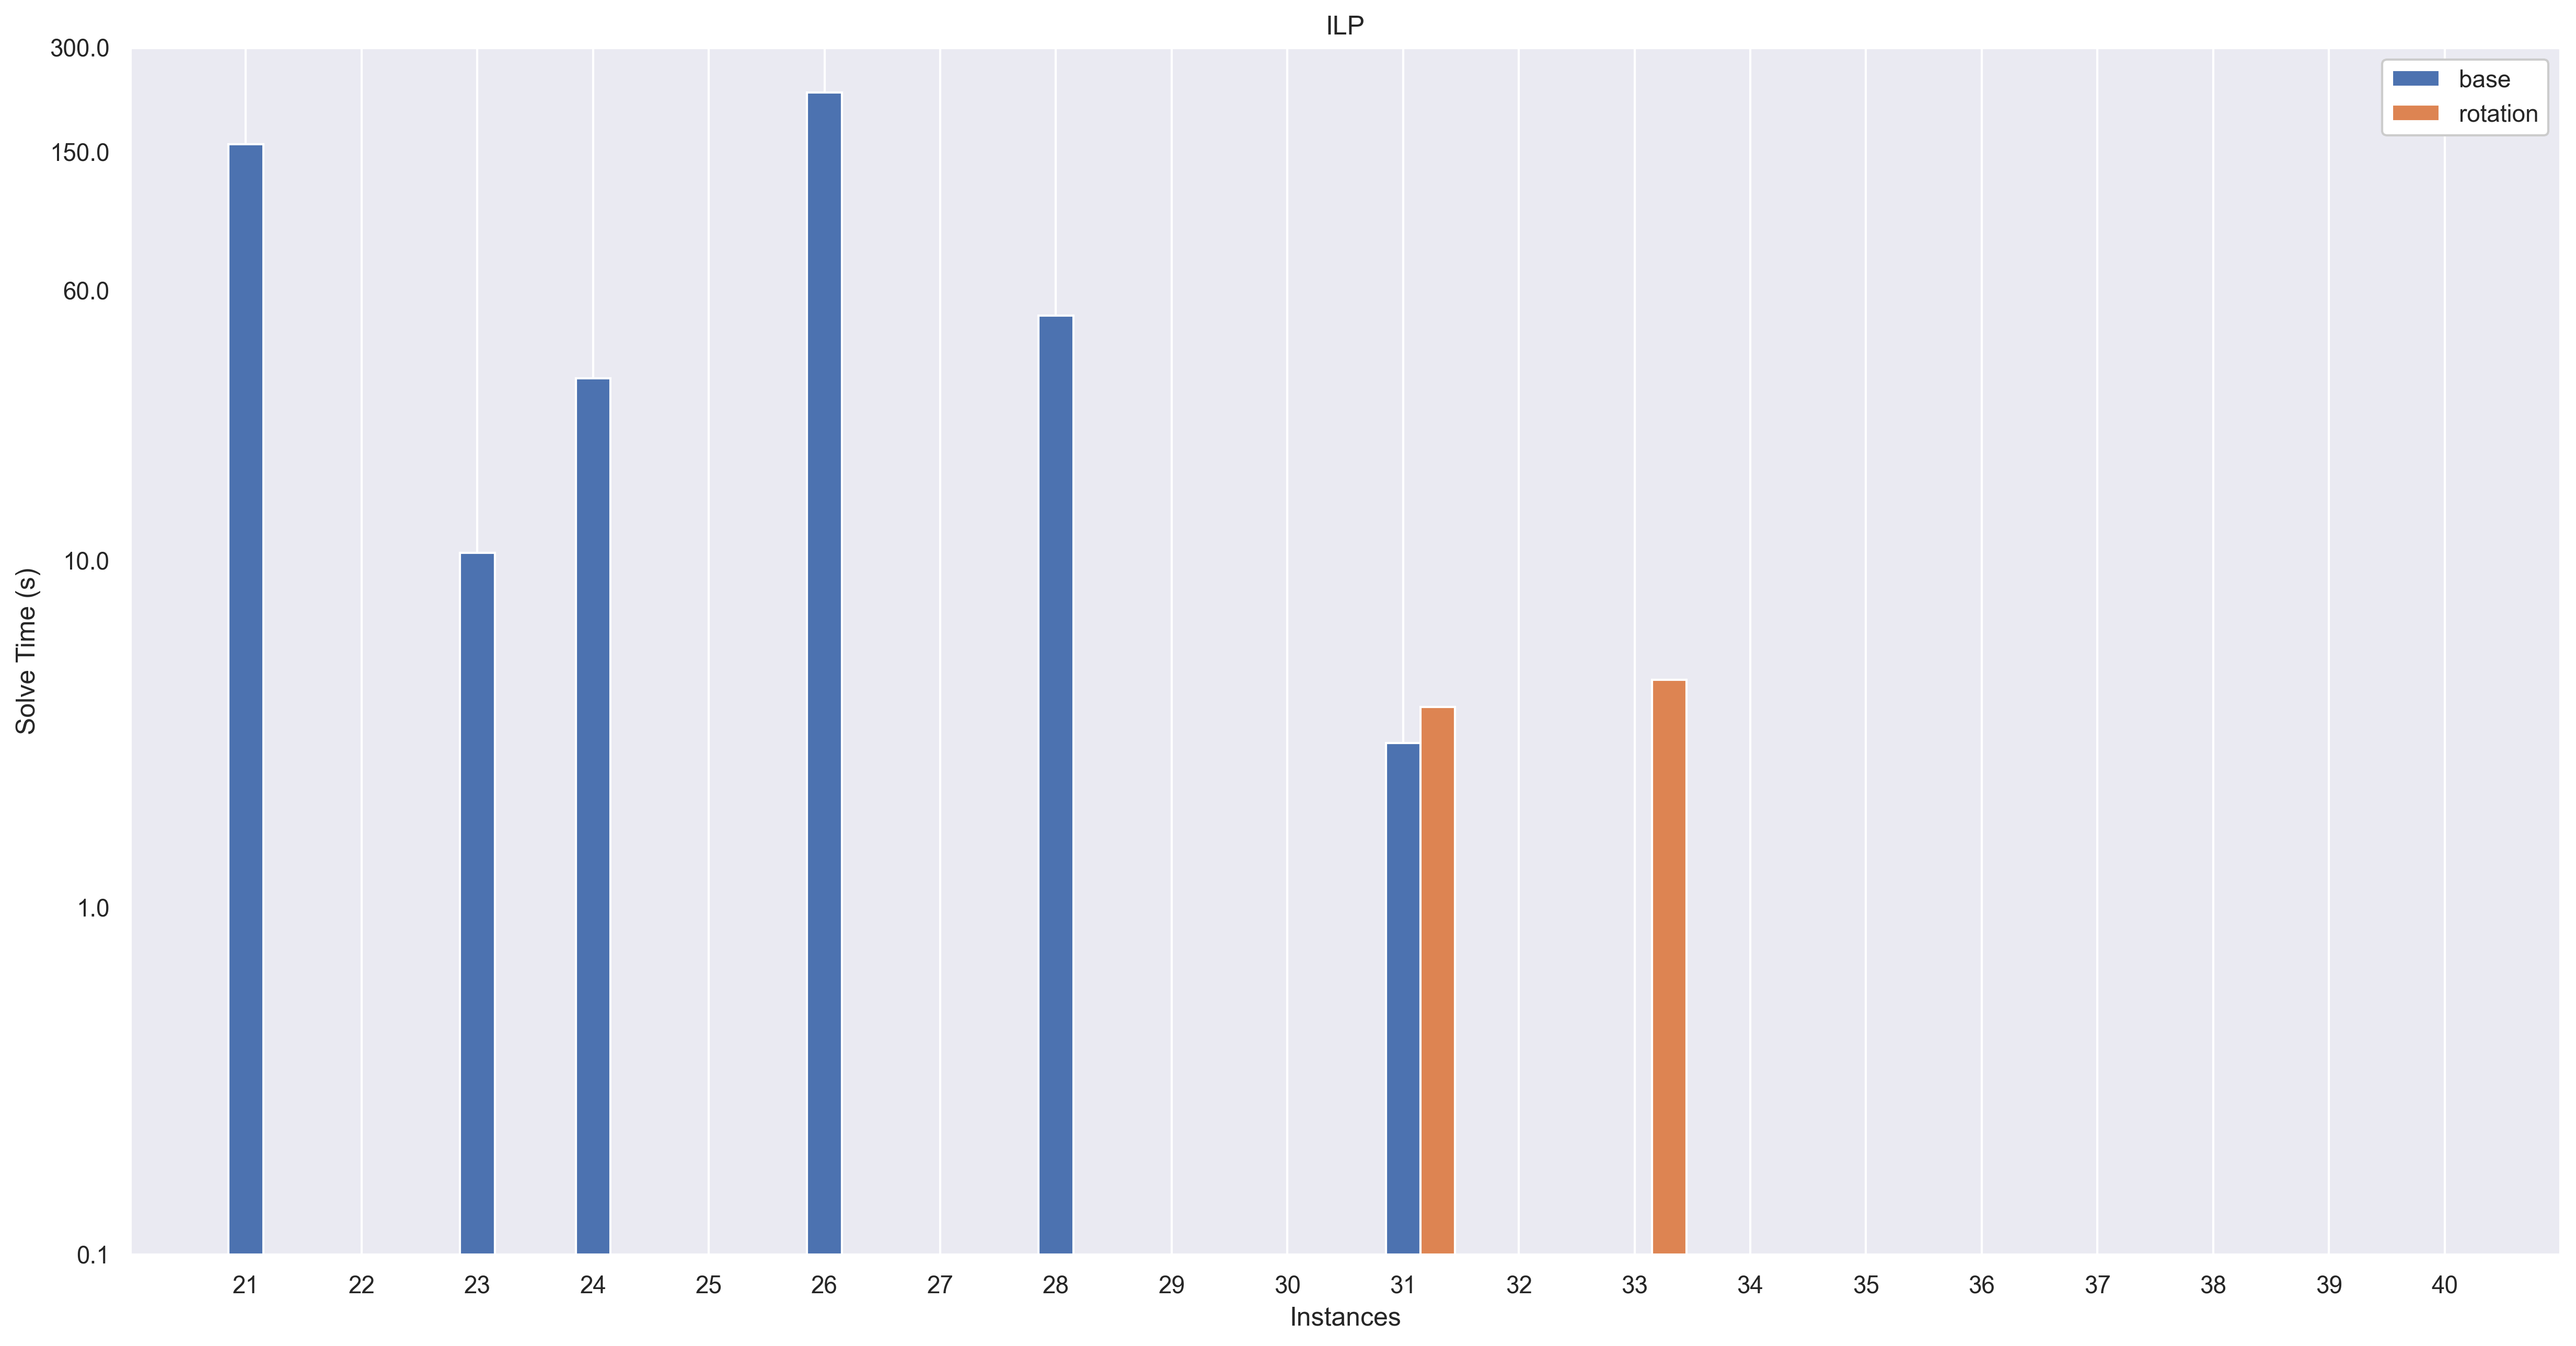

In [19]:
width = 0.3
_dfs = [
    ILP_df_filter(model="base"),
    ILP_df_filter(model="rotation"),
]
labels = [
    "base", 
    "rotation", 
]
plot("ILP", "ILP", width, prepare_plot_data(_dfs), labels)